# AV Against FE012

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn import model_selection, preprocessing, metrics
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import shap
import os
#print(os.listdir("../input"))
from sklearn import preprocessing
#import xgboost as xgb
import gc


import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from tqdm import tqdm
# Any results you write to the current directory are saved as output.

In [2]:
train = pd.read_parquet('../../data/train_FE013.parquet')
test = pd.read_parquet('../../data/test_FE013.parquet')

In [3]:
FEATURES = ['V85', 'bank_type_TransactionAmt_mean', 'D5_fq_enc', 'V12',
 'V81', 'V282', 'bank_type_D7_std', 'id_15', 'V13', 'C12_fq_enc', 'anomaly',
 'D7_DT_D_std_score', 'D3_DT_D_min_max', 'card4_count_full',
 'D14_DT_D_min_max', 'card1_count_full', 'V169', 'D3_DT_M_min_max', 'V279',
 'V91', 'bank_type_D10_std', 'D14', 'D6_DT_M_std_score', 'D4_DT_W_min_max',
 'V152', 'V56',
            #'D3_intercept_bin0',
            'D14_intercept_bin0', 'V220', 'V277',
 'D12_intercept', 'ProductCD_W_00cents', 'D13_intercept_bin0', 'V291', 'V189',
 'D15_DT_M_min_max', 'C5_fq_enc', 'D3_fq_enc', 'card5_fq_enc',
 'addr1_count_full', 'V266', 'D11_intercept_bin2', 'V23', 'D4_intercept_bin3',
 'bank_type_D10_mean', 'D2_intercept_bin3', 'V306', 'DeviceType', 'V285',
 'D5_DT_W_std_score', 'V131', 'V37', 'V296', 'bank_type_D1_mean', 'V75',
 'D3_DT_W_std_score', 'D10_DT_M_min_max', 'id_33_0', 'V67',
 'D4_intercept_bin4', 'V256', 'V143', 'uid5_D6_std', 'ProductCD_target_mean',
 'mxC3', 'V129', 'D13_DT_M_std_score', 'V24', 'D3_DT_M_std_score', 'mxC4',
 'D9', 'id_30_version_fq_enc', 'D5_DT_D_std_score', 'D11_DT_M_std_score',
 'uid5_D6_mean', 'D14_DT_M_std_score', 'card5_TransactionAmt_std', 'V20',
 'C8_fq_enc', 'V70', 'V127', 'D6_intercept', '# ',
 'sum_Cxx_binary_higher_than_q95', 'V156', 'uid4_D12_mean', 'C5',
 'uid4_D12_std', 'id_30_fq_enc', 'V61', 'id_33', 'D15_to_std_addr1',
 'bank_type_D9_mean',
            #'D5_intercept',
            'D10_DT_W_min_max', 'V130',
 'bank_type_D9_std', 'uid5_D7_std', 'bank_type_D14_mean', 'bank_type_D3_std',
 'bank_type_D5_mean', 'ProductCD', 'M8', 'V44', 'D6_fq_enc',
 'D15_DT_D_min_max', 'D11_intercept_bin0', 'V257', 'bank_type_D7_mean', 'V76',
 #'D15',
            'V38', 'V55', 'V261', 'V149',
            #'D4',
            'D8_intercept_bin0', 'M2',
 'bank_type_D6_std', 'id_30_version', 'D4_intercept_bin1',
 'D15_to_mean_card4', 'V82', 'D3_DT_D_std_score', 'D10_intercept_bin3',
 'bank_type_D2_std', 'V77', 'M7',
            #'D11',
            'D4_intercept_bin2', 'email_check',
 'V294', 'V317', 'V308', 'id_33_fq_enc', 'bank_type_D5_std', 'D8_intercept',
 'V62', 'V187', 'card5_TransactionAmt_mean', 'bank_type_D12_mean',
 #'id_33_count_dist',
            'D2_intercept_bin2', 'C10', 'V86', 'D8_DT_M_min_max',
 'D15_intercept_bin4', 'D6_DT_W_std_score', 'uid5_D7_mean', 'C9_fq_enc',
 'mxC10', 'D14_DT_W_std_score', 'card2_count_full', 'V258',
 'bank_type_D14_std', 'D10_intercept_bin4', 'V83', 'bank_type_D13_std',
 'D8_DT_W_min_max', 'TransactionAmt', 'V312', 'D14_intercept', 'id_33_1',
 'D15_intercept_bin2', 'D12_DT_W_std_score', 'V78', 'D8_D9_decimal_dist',
 'M9', 'V281', 'bank_type_D12_std', 'V54', 'C9', 'M4_target_mean',
 'sum_Cxx_binary_higher_than_q90', 'D10_DT_D_min_max', 'bank_type_D3_mean',
 'bank_type_D8_mean', 'R_emaildomain_prefix', 'bank_type_D6_mean', 'V314',
 'D11_DT_W_std_score',
            #'D10',
            'D4_DT_D_min_max', 'V283', 'D10_intercept_bin2',
 'D13_intercept', 'D8_DT_D_min_max', 'C2_fq_enc', 'V165', 'D1_intercept_bin4',
 'bank_type_D13_mean',
            #'D3_intercept',
            'TransactionAmt_2Dec',
 'card3_div_Mean_D9_DOY', 'C12', 'D4_DT_M_std_score', 'D2_intercept_bin1',
 'mxC8', 'D2_fq_enc', 'addr1_third_digit', 'D4_fq_enc',
            #'D1_fq_enc',
            'mxC12',
 'D8', 'D10_intercept_bin1', 'id_01', 'id_09', 'id_03', 'addr1_second_digit',
 'D15_to_mean_addr1', 'sum_Cxx_binary_higher_than_q80', 'V53',
 'TransactionAmt_decimal', 'card3_div_Mean_D6_DOY', 'D15_intercept_bin3',
 'V45', 'id_02_to_std_card4', 'addr2_div_Mean_D10_DOY_productCD',
 'DeviceInfo_version', 'DeviceInfo_device', 'D1_intercept_bin3',
 'D11_intercept', 'DeviceInfo_version_fq_enc', 'C6', 'uid5_D13_std',
 'TransactionAmt_DT_M_min_max', 'dist2', 'C8', 'D15_intercept_bin1', 'M3',
 'R_emaildomain_fq_enc', 'DeviceInfo_device_fq_enc', 'D6_DT_D_std_score',
 'sum_Cxx_binary_higher_than_q60',
            #'D11__DeviceInfo',
 'TranAmt_div_Mean_D12_DOY_productCD', 'D10_DT_M_std_score', 'uid5_D13_mean',
 'mxC5',
            #id_30',
            'addr2_div_Mean_D4_DOY', 'uid2_D12_std', 'C11_fq_enc',
 'id_06', 'uid2_D12_mean', 'sum_Cxx_binary_higher_than_q70', 'V310', 'V307',
 'C6_fq_enc', 'D8_fq_enc', 'dist2_fq_enc', 'D2_intercept_bin0',
 'addr1_div_Mean_D10_DOY_productCD', 'addr1_div_Mean_D10_DOY',
 'addr1_div_Mean_D11_DOY', 'uid2_D8_std', 'id_02__id_20', 'V313',
 'D4_intercept_bin0', 'D11_DT_D_std_score', 'Transaction_day_of_week',
 'card6_div_Mean_D3_DOY', 'uid2_D1_std', 'uid5_D11_mean', 'uid_fq_enc',
 'D14_DT_D_std_score', 'D12_DT_D_std_score', 'id_02_to_mean_card4',
 'uid4_D13_std', 'D1_intercept_bin1', 'id_02_to_std_card1', 'uid5_D11_std',
 'P_emaildomain_prefix', 'DT_day',
            #'D8_DT_M_std_score',
            'uid2_D1_mean',
 'TransactionAmt_to_mean_card4', 'card5_div_Mean_D11_DOY',
 'D15_DT_M_std_score', 'V87', 'uid_D12_std', 'id_31_device_fq_enc',
 'uid2_D11_mean', 'card3_DT_W_week_day_dist_best', 'uid5_D14_std',
 'uid2_D15_mean', 'sum_Cxx_binary_higher_than_q50', 'id_13',
 'card3_div_Mean_D11_DOY', 'C11', 'bank_type_DT_W_week_day_dist_best',
 'card4_div_Mean_D11_DOY', 'addr1_div_Mean_D1_DOY', 'uid2_D4_mean',
 'card2_div_Mean_D11_DOY', 'C13_fq_enc', 'uid4_D13_mean',
 'card5_DT_W_week_day_dist_best', 'id_02', 'uid5_D14_mean', 'uid2_D10_mean',
 # 'id_01_count_dist',
            'D13_DT_W_std_score', 'C2', 'C14',
 'addr2_div_Mean_D10_DOY', 'uid2_D11_std', 'addr1_div_Mean_D1_DOY_productCD',
 'id_02_to_mean_card1', 'dist1_fq_enc', 'card1_div_Mean_D11_DOY',
 'D15_to_std_card1', 'TransactionAmt_DT_M_std_score', 'uid2_D6_std',
 'TransactionAmt_to_std_card4', 'uid2_D15_std', 'uid3_D8_std',
 'card6_div_Mean_D11_DOY', 'TranAmt_div_Mean_D14_DOY',
 'card3_div_Mean_D14_DOY',
            #'D2',
            #'D1',
            'uid_D15_mean', 'uid4_D6_std',
 'uid_D15_std', 'D10_intercept_bin0', 'DeviceInfo_fq_enc', 'uid2_D13_std',
 'uid_D12_mean', 'uid4_D6_mean', 'uid_D1_std', 'D1_intercept_bin2',
 'uid_D10_mean', 'card2__id_20', 'uid4_D7_std', 'uid3_D13_std', 'C14_fq_enc',
 'uid_D8_std', 'uid3_D13_mean', 'uid2_D4_std', 'addr1_div_Mean_D4_DOY',
 'uid_D4_mean', 'D4_DT_W_std_score', 'addr2_div_Mean_D1_DOY_productCD',
 'uid_D11_mean', 'D15_intercept_bin0', 'uid2_D10_std', 'uid_D13_std',
 'uid2_fq_enc', 'uid2_D13_mean', 'uid2_D2_mean', 'D2_intercept',
 'uid_D11_std', 'card2', 'uid4_D14_std', 'C_sum_after_clip75',
 'R_emaildomain', 'dist1', 'id_05', 'uid_TransactionAmt_mean', 'uid_D1_mean',
 'uid3_D1_std', 'uid5_D8_std', 'uid3_D6_std', 'Transaction_hour_of_day',
 'uid4_D14_mean', 'uid5_D10_std', 'uid3_D10_std', 'uid5_D1_std',
 'uid5_D15_std', 'uid2_D7_mean', 'uid3_D11_std', 'uid4_D8_std',
 'D13_DT_D_std_score', 'uid3_D11_mean', 'uid2_D14_std', 'uid2_D7_std',
 'uid2_D14_mean', 'uid_D13_mean', 'uid_D10_std', 'uid2_D3_std', 'uid_D6_std',
 'uid3_D15_std', 'addr1_fq_enc',
            #id_31',
            'uid_TransactionAmt_std',
 'card1_div_Mean_D4_DOY_productCD', 'uid2_TransactionAmt_mean',
 'C_sum_after_clip90', 'uid2_TransactionAmt_std', 'uid4_D7_mean',
 'uid2_D6_mean', 'uid3_D15_mean', 'D15_to_mean_card1', 'uid5_D15_mean', 'M4',
 'uid3_D7_std', 'card2_div_Mean_D4_DOY', 'card5_div_Mean_D4_DOY_productCD',
 'card5_div_Mean_D4_DOY', 'D4_intercept', 'uid_D4_std',
 'card6_div_Mean_D4_DOY_productCD', 'card5__P_emaildomain', 'card1_fq_enc',
 'uid5_D10_mean', 'card1_div_Mean_D4_DOY', 'C1', 'M6', 'uid2_D2_std',
 'P_emaildomain_fq_enc', 'card1_TransactionAmt_mean', 'uid3_D10_mean',
 'TransactionAmt_DT_W_min_max', 'uid5_D4_std',
 'card1_div_Mean_D10_DOY_productCD', 'uid3_D1_mean', 'card1_div_Mean_D10_DOY',
 'uid_D14_mean', 'mxC9', 'TranAmt_div_Mean_D4_DOY_productCD',
 'D15_DT_W_std_score', 'DeviceInfo__P_emaildomain', 'uid3_D14_mean',
 #'bank_type_DT_M',
            'mxC11', 'uid5_D1_mean', 'uid_D2_mean',
 'D10_DT_W_std_score',
            #'card3_DT_M_month_day_dist_best',
            'uid3_D2_std',
 'TranAmt_div_Mean_D4_DOY', 'card1_TransactionAmt_std',
 'card3_div_Mean_D4_DOY_productCD', 'D1_intercept_bin0', 'uid3_D4_std',
 'card2_div_Mean_D10_DOY', 'uid_D2_std', 'uid3_D14_std', 'uid3_D4_mean',
 'uid_D7_mean', 'uid5_D2_std', 'card4_div_Mean_D4_DOY_productCD',
 'card6_div_Mean_D4_DOY', 'TranAmt_div_Mean_D10_DOY', 'uid2_D9_std',
 'TransactionAmt_DT_W_std_score', 'C1_fq_enc', 'card1_div_Mean_D1_DOY',
 'uid5_D4_mean', 'uid3_D6_mean', 'mxC14', 'uid5_D2_mean',
 'card4_div_Mean_D4_DOY', 'card3_div_Mean_D4_DOY', 'uid_D14_std', 'M5', 'C13',
 'mxC6', 'card5_div_Mean_D10_DOY_productCD',
            # 'card3_DT_M_month_day_dist',
 'card2_div_Mean_D10_DOY_productCD', 'uid_D7_std',
 'card2_div_Mean_D4_DOY_productCD', 'bank_type_DT_M_month_day_dist',
 'uid3_D7_mean', 'uid_D3_std', 'uid5_fq_enc', 'uid3_fq_enc', 'uid_D3_mean',
 'D4_DT_D_std_score', 'uid3_D2_mean', 'uid4_D1_std', 'uid2_D5_std',
 'uid4_D10_std', 'bank_type_DT_D_hour_dist_best', 'uid2_D8_mean',
 'card6_div_Mean_D10_DOY_productCD', 'card1_div_Mean_D1_DOY_productCD',
 'uid5_D9_std', 'card4_div_Mean_D10_DOY_productCD', 'uid2_D3_mean',
 'uid_D6_mean', 'card2_div_Mean_D1_DOY', 'card5_div_Mean_D10_DOY', 'mxC2',
 'card2_TransactionAmt_std', 'bank_type_DT_W_week_day_dist',
 'card2_TransactionAmt_mean', 'uid4_D10_mean',
            #id_31_count_dist',
 'TranAmt_div_Mean_D1_DOY', 'uid3_D3_std', 'uid4_D15_std',
 'card5_div_Mean_D1_DOY_productCD', 'card4_div_Mean_D10_DOY',
 'card5_DT_D_hour_dist_best', 'uid4_D4_std', 'card5_DT_M_month_day_dist',
 #'bank_type_DT_W',
            'addr1__card1', 'bank_type_DT_M_month_day_dist_best',
 'card2_div_Mean_D1_DOY_productCD', 'card6_div_Mean_D10_DOY', 'uid2_D5_mean',
 'uid_DT_M', 'card2__dist1', 'uid2_D9_mean', 'card5_DT_M_month_day_dist_best',
 'TranAmt_div_Mean_D10_DOY_productCD', 'uid4_D11_std', 'uid_D5_mean',
 'uid5_D3_std', 'TransactionAmt_DT_D_std_score',
            #'D8_DT_W_std_score',
 'card5_DT_W_week_day_dist', 'uid5_D5_std', 'card3_DT_W_week_day_dist',
 'uid4_D9_std', 'D10_intercept', 'uid3_D3_mean', 'uid4_D5_std', 'uid_D5_std',
 'card5_div_Mean_D1_DOY', 'uid5_D3_mean', 'bank_type_DT_D', 'uid4_D1_mean',
 'uid_D8_mean', 'uid3_D5_mean', 'D15_intercept', 'uid5_TransactionAmt_std',
 'uid3_D5_std', 'uid4_D4_mean', 'uid4_D15_mean', 'uid5_D8_mean',
 'uid5_D9_mean', 'uid_D9_std', 'uid_D9_mean', 'uid5_D5_mean', 'mtransamt',
 'bank_type_DT_D_hour_dist', 'uid4_D11_mean', 'D15_DT_D_std_score',
 'TransactionAmt_DT_D_min_max', 'uid4_D2_mean', 'ntrans',
 'addr2_div_Mean_D1_DOY', 'uid5_TransactionAmt_mean', 'uid3_D9_std',
 'TransactionAmt_Dec', 'uid3_TransactionAmt_std', 'card5_DT_D_hour_dist',
 'card1', 'card4_div_Mean_D1_DOY_productCD', 'P_emaildomain__C2',
 'card3_div_Mean_D10_DOY', 'uid4_D3_std', 'card3_DT_D_hour_dist_best',
 'uid4_D8_mean', 'uid4_D2_std', 'card6_div_Mean_D1_DOY_productCD', 'uid_DT_W',
 #'Sum_TransAmt_Day',
            'uid4_D5_mean', 'card4_div_Mean_D1_DOY',
 'card3_div_Mean_D10_DOY_productCD', 'uid3_D8_mean',
 'TransactionAmt_userid_median', 'uid4_fq_enc', 'uid3_TransactionAmt_mean',
 'uid3_D9_mean', 'card6_div_Mean_D1_DOY',
            #'Trans_Count_Day',
            'mxC1',
 'D10_DT_D_std_score', 'card3_div_Mean_D1_DOY',
 'TransactionAmt_to_mean_card1', 'card2_fq_enc', 'product_type',
 'card3_div_Mean_D1_DOY_productCD', 'TransactionAmt_to_std_card1', 'uid_DT_D',
 'uid4_D9_mean', 'D1_intercept', 'card3_DT_D_hour_dist',
 'TranAmt_div_Mean_D1_DOY_productCD', 'product_type_DT_M', 'uid4_D3_mean',
 'uid4_TransactionAmt_mean', 'uid4_TransactionAmt_std', 'D8_DT_D_std_score',
 #'Mean_TransAmt_Day',
            #'minDT',
            'product_type_DT_W', 'mintransamt',
 'maxtransamt', 'TransactionAmt_userid_std', 'P_emaildomain', 'card1__card5',
 'product_type_DT_D', 'mxC13',
            #'maxDT',
            'id_19', 'DeviceInfo', 'id_20',
 'addr1', 'userid_min_C1', 'userid_max_C1', 'userid_max_minus_min_C1',
 'userid_unique_C1', 'userid_mean_C1', 'userid_min_C2', 'userid_max_C2',
 'userid_max_minus_min_C2', 'userid_unique_C2', 'userid_mean_C2',
 'userid_min_C3', 'userid_max_C3', 'userid_max_minus_min_C3',
 'userid_unique_C3', 'userid_mean_C3', 'userid_min_C4', 'userid_max_C4',
 'userid_max_minus_min_C4', 'userid_unique_C4', 'userid_mean_C4',
 'userid_min_C5', 'userid_max_C5', 'userid_max_minus_min_C5',
 'userid_unique_C5', 'userid_mean_C5', 'userid_min_C6', 'userid_max_C6',
 'userid_max_minus_min_C6', 'userid_unique_C6', 'userid_mean_C6',
 'userid_min_C7', 'userid_max_C7', 'userid_max_minus_min_C7',
 'userid_unique_C7', 'userid_mean_C7', 'userid_min_C8', 'userid_max_C8',
 'userid_max_minus_min_C8', 'userid_unique_C8', 'userid_mean_C8',
 'userid_min_C9', 'userid_max_C9', 'userid_max_minus_min_C9',
 'userid_unique_C9', 'userid_mean_C9', 'userid_min_C10', 'userid_max_C10',
 'userid_max_minus_min_C10', 'userid_unique_C10', 'userid_mean_C10',
 'userid_min_C11', 'userid_max_C11', 'userid_max_minus_min_C11',
 'userid_unique_C11', 'userid_mean_C11', 'userid_min_C12', 'userid_max_C12',
 'userid_max_minus_min_C12', 'userid_unique_C12', 'userid_mean_C12',
 'userid_min_C13', 'userid_max_C13', 'userid_max_minus_min_C13',
 'userid_unique_C13', 'userid_mean_C13', 'userid_min_C14', 'userid_max_C14',
 'userid_max_minus_min_C14', 'userid_unique_C14', 'userid_mean_C14', 'hour',
 'hour_sin',
            #'week', 'week_sin', 'week_cos', 'month',
            #'life_of_customer',
 'addr1_broad_area', 'uid6_TransactionAmt_mean', 'uid6_TransactionAmt_std',
 'hour_TransactionAmt_mean', 'hour_TransactionAmt_std',
 # 'week_TransactionAmt_mean', 'week_TransactionAmt_std',
            'D1_diff', 'D10_diff',
 'D15_diff', 'new_identity_M5_mean', 'new_identity_M6_mean',
 'new_identity_V315_mean', 'new_identity_D1_diff_mean',
 'new_identity_D3_mean', 'new_identity_D10_diff_mean',
 'new_identity_D15_diff_mean', 'addr1_addr2_new_identity_M5_mean_mean',
 'addr1_addr2_new_identity_M5_mean_std',
 'addr1_addr2_new_identity_M6_mean_mean',
 'addr1_addr2_new_identity_M6_mean_std',
 'addr1_addr2_new_identity_V315_mean_mean',
 'addr1_addr2_new_identity_V315_mean_std',
 'addr1_addr2_new_identity_D1_diff_mean_mean',
 'addr1_addr2_new_identity_D1_diff_mean_std',
 'addr1_addr2_new_identity_D10_diff_mean_mean',
 'addr1_addr2_new_identity_D10_diff_mean_std',
 'addr1_addr2_new_identity_D15_diff_mean_mean',
 'addr1_addr2_new_identity_D15_diff_mean_std',
 'new_identity_ProductCD_TransactionAmt_mean', 'uid6_C1_mean', 'uid6_C1_std',
 'uid6_V54_mean', 'uid6_V54_std', 'uid6_V281_mean', 'uid6_V281_std',
 'uid6_C11_mean', 'uid6_C11_std', 'uid6_D4_mean', 'uid6_D4_std',
 'uid6_V67_mean', 'uid6_V67_std', 'uid6_V320_mean', 'uid6_V320_std',
 'uid6_M5_mean', 'uid6_M5_std', 'uid6_M6_mean', 'uid6_M6_std',
 'uid3_V67_mean', 'uid3_V67_std', 'uid3_V83_mean', 'uid3_V83_std',
 'uid6_fq_enc', 'card4_fq_enc', 'card6_fq_enc', 'ProductCD_fq_enc',
 'M4_fq_enc', 'addr_fq_enc', 'R_emaildomain_V118_mean',
 'R_emaildomain_V118_std', 'R_emaildomain_V119_mean',
 'R_emaildomain_V119_std', 'card1_V20_mean', 'card1_V20_std',
 'card1_V151_mean', 'card1_V151_std', 'card1_V67_mean', 'card1_V67_std',
 'hour_V116_mean', 'hour_V116_std']


In [4]:
train = train[FEATURES]
test = test[FEATURES]
train['target'] = 0
test['target'] = 1

In [5]:
train_test = pd.concat([train, test], axis =0)
target = train_test['target'].values

In [6]:
del train, test

In [7]:
gc.collect()

3876

In [8]:
train, test = model_selection.train_test_split(train_test, test_size=0.33, random_state=529, shuffle=True)

In [9]:
train_y = train['target'].values
test_y = test['target'].values
del train['target'], test['target']
gc.collect()

54

In [10]:
train = lgb.Dataset(train, label=train_y)
test = lgb.Dataset(test, label=test_y)

In [11]:
param = {'num_leaves': 50,
         'min_data_in_leaf': 30, 
         'objective':'binary',
         'max_depth': 5,
         'learning_rate': 0.2,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 44,
         "metric": 'auc',
         "verbosity": -1}

In [12]:
num_round = 500
clf = lgb.train(param,
                train,
                num_round,
                valid_sets = [train, test],
                verbose_eval=10,
                early_stopping_rounds = 50)

Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.998319	valid_1's auc: 0.99831
[20]	training's auc: 0.999576	valid_1's auc: 0.999572
[30]	training's auc: 0.999793	valid_1's auc: 0.999794
[40]	training's auc: 0.999931	valid_1's auc: 0.99993
[50]	training's auc: 0.999973	valid_1's auc: 0.99997
[60]	training's auc: 0.99999	valid_1's auc: 0.999989
[70]	training's auc: 0.999996	valid_1's auc: 0.999994
[80]	training's auc: 0.999998	valid_1's auc: 0.999997
[90]	training's auc: 0.999999	valid_1's auc: 0.999999
[100]	training's auc: 1	valid_1's auc: 0.999999
[110]	training's auc: 1	valid_1's auc: 1
[120]	training's auc: 1	valid_1's auc: 1
[130]	training's auc: 1	valid_1's auc: 1
[140]	training's auc: 1	valid_1's auc: 1
[150]	training's auc: 1	valid_1's auc: 1
[160]	training's auc: 1	valid_1's auc: 1
[170]	training's auc: 1	valid_1's auc: 1
[180]	training's auc: 1	valid_1's auc: 1
[190]	training's auc: 1	valid_1's auc: 1
[200]	training's auc: 1	valid_1's auc: 

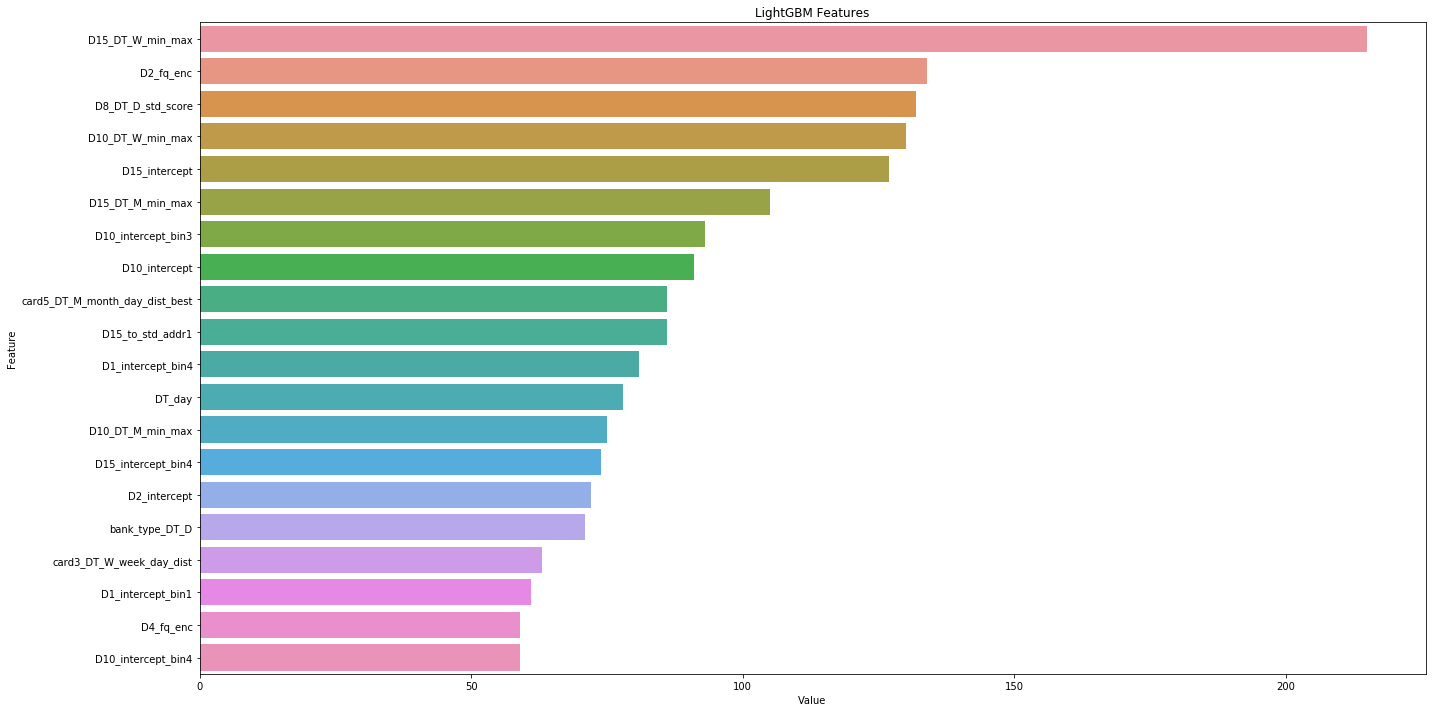

In [14]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),FEATURES)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
#plt.savefig('lgbm_importances-01.png')

# Make this into a loop

In [26]:
for i in tqdm(range(0, 300)):
    top3_feats = feature_imp.sort_values('Value', ascending=False)['Feature'][:3].tolist()
    print('Remove features:', top3_feats)
    FEATURES = [x for x in FEATURES if x not in top3_feats]
    train = pd.read_parquet('../../data/train_FE013.parquet')
    test = pd.read_parquet('../../data/test_FE013.parquet')
    
    train = train[FEATURES]
    test = test[FEATURES]
    train['target'] = 0
    test['target'] = 1
    
    train_test = pd.concat([train, test], axis =0)
    target = train_test['target'].values
    
    del train, test
    gc.collect()
    
    train, test = model_selection.train_test_split(train_test, test_size=0.33, random_state=529, shuffle=True)
    train_y = train['target'].values
    test_y = test['target'].values
    del train['target'], test['target']
    gc.collect()
    
    train = lgb.Dataset(train, label=train_y)
    test = lgb.Dataset(test, label=test_y)
    
    param = {'num_leaves': 50,
             'min_data_in_leaf': 30, 
             'objective':'binary',
             'max_depth': 5,
             'learning_rate': 0.2,
             "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 44,
             "metric": 'auc',
             "verbosity": -1}

    num_round = 500
    clf = lgb.train(param,
                    train,
                    num_round,
                    valid_sets = [train, test],
                    verbose_eval=10,
                    early_stopping_rounds = 50)
    
    feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),FEATURES)), columns=['Value','Feature'])

  0%|          | 0/300 [00:00<?, ?it/s]

Remove features: ['D15_DT_W_min_max', 'D2_fq_enc', 'D8_DT_D_std_score']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.997301	valid_1's auc: 0.997293
[20]	training's auc: 0.999255	valid_1's auc: 0.999249
[30]	training's auc: 0.999667	valid_1's auc: 0.999668
[40]	training's auc: 0.999838	valid_1's auc: 0.999835
[50]	training's auc: 0.999946	valid_1's auc: 0.999943
[60]	training's auc: 0.999983	valid_1's auc: 0.999981
[70]	training's auc: 0.999994	valid_1's auc: 0.999993
[80]	training's auc: 0.999997	valid_1's auc: 0.999997
[90]	training's auc: 0.999999	valid_1's auc: 0.999999
[100]	training's auc: 1	valid_1's auc: 0.999999
[110]	training's auc: 1	valid_1's auc: 1
[120]	training's auc: 1	valid_1's auc: 1
[130]	training's auc: 1	valid_1's auc: 1
[140]	training's auc: 1	valid_1's auc: 1
[150]	training's auc: 1	valid_1's auc: 1
[160]	training's auc: 1	valid_1's auc: 1
[170]	training's auc: 1	valid_1's auc: 1
[180]	training's auc: 1	valid_1's auc: 1
[190

  0%|          | 1/300 [02:35<12:54:30, 155.42s/it]

Early stopping, best iteration is:
[184]	training's auc: 1	valid_1's auc: 1
Remove features: ['D15_DT_M_min_max', 'D15_intercept', 'D10_DT_W_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.997413	valid_1's auc: 0.997419
[20]	training's auc: 0.999057	valid_1's auc: 0.99905
[30]	training's auc: 0.999613	valid_1's auc: 0.999613
[40]	training's auc: 0.999853	valid_1's auc: 0.999853
[50]	training's auc: 0.99994	valid_1's auc: 0.999939
[60]	training's auc: 0.999982	valid_1's auc: 0.999981
[70]	training's auc: 0.999991	valid_1's auc: 0.99999
[80]	training's auc: 0.999996	valid_1's auc: 0.999996
[90]	training's auc: 0.999998	valid_1's auc: 0.999998
[100]	training's auc: 0.999999	valid_1's auc: 0.999999
[110]	training's auc: 1	valid_1's auc: 0.999999
[120]	training's auc: 1	valid_1's auc: 1
[130]	training's auc: 1	valid_1's auc: 1
[140]	training's auc: 1	valid_1's auc: 1
[150]	training's auc: 1	valid_1's auc: 1
[160]	training's auc: 1	valid_1's auc

  1%|          | 2/300 [05:09<12:49:37, 154.96s/it]

Early stopping, best iteration is:
[179]	training's auc: 1	valid_1's auc: 1
Remove features: ['D10_DT_M_min_max', 'D10_intercept', 'D10_intercept_bin3']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.997165	valid_1's auc: 0.997159
[20]	training's auc: 0.998928	valid_1's auc: 0.998926
[30]	training's auc: 0.999498	valid_1's auc: 0.999489
[40]	training's auc: 0.99982	valid_1's auc: 0.999814
[50]	training's auc: 0.999924	valid_1's auc: 0.999919
[60]	training's auc: 0.999966	valid_1's auc: 0.999963
[70]	training's auc: 0.999983	valid_1's auc: 0.99998
[80]	training's auc: 0.999991	valid_1's auc: 0.999989
[90]	training's auc: 0.999995	valid_1's auc: 0.999994
[100]	training's auc: 0.999998	valid_1's auc: 0.999996
[110]	training's auc: 0.999999	valid_1's auc: 0.999998
[120]	training's auc: 0.999999	valid_1's auc: 0.999998
[130]	training's auc: 1	valid_1's auc: 0.999999
[140]	training's auc: 1	valid_1's auc: 0.999999
[150]	training's auc: 1	valid_1's auc: 0

  1%|          | 3/300 [08:05<13:17:57, 161.20s/it]

Early stopping, best iteration is:
[236]	training's auc: 1	valid_1's auc: 1
Remove features: ['D15_DT_D_min_max', 'D10_DT_D_min_max', 'card3_DT_W_week_day_dist']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.996899	valid_1's auc: 0.996887
[20]	training's auc: 0.998927	valid_1's auc: 0.998925
[30]	training's auc: 0.999567	valid_1's auc: 0.999572
[40]	training's auc: 0.999802	valid_1's auc: 0.999798
[50]	training's auc: 0.999914	valid_1's auc: 0.999908
[60]	training's auc: 0.99995	valid_1's auc: 0.999946
[70]	training's auc: 0.999973	valid_1's auc: 0.99997
[80]	training's auc: 0.999983	valid_1's auc: 0.999981
[90]	training's auc: 0.99999	valid_1's auc: 0.999987
[100]	training's auc: 0.999995	valid_1's auc: 0.999993
[110]	training's auc: 0.999997	valid_1's auc: 0.999995
[120]	training's auc: 0.999998	valid_1's auc: 0.999997
[130]	training's auc: 0.999999	valid_1's auc: 0.999998
[140]	training's auc: 0.999999	valid_1's auc: 0.999998
[150]	training's a

  1%|▏         | 4/300 [11:03<13:41:19, 166.49s/it]

Early stopping, best iteration is:
[256]	training's auc: 1	valid_1's auc: 1
Remove features: ['D4_DT_W_min_max', 'D10_DT_M_std_score', 'D10_intercept_bin4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.996802	valid_1's auc: 0.996788
[20]	training's auc: 0.998922	valid_1's auc: 0.998909
[30]	training's auc: 0.999465	valid_1's auc: 0.999461
[40]	training's auc: 0.999747	valid_1's auc: 0.999739
[50]	training's auc: 0.999891	valid_1's auc: 0.999882
[60]	training's auc: 0.999948	valid_1's auc: 0.999943
[70]	training's auc: 0.999972	valid_1's auc: 0.999968
[80]	training's auc: 0.999984	valid_1's auc: 0.999981
[90]	training's auc: 0.999992	valid_1's auc: 0.999989
[100]	training's auc: 0.999994	valid_1's auc: 0.999993
[110]	training's auc: 0.999996	valid_1's auc: 0.999995
[120]	training's auc: 0.999998	valid_1's auc: 0.999996
[130]	training's auc: 0.999999	valid_1's auc: 0.999997
[140]	training's auc: 0.999999	valid_1's auc: 0.999998
[150]	training's auc

  2%|▏         | 5/300 [14:09<14:07:14, 172.32s/it]

Early stopping, best iteration is:
[283]	training's auc: 1	valid_1's auc: 1
Remove features: ['D10_DT_W_std_score', 'D10_intercept_bin2', 'card5_DT_M_month_day_dist_best']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.995843	valid_1's auc: 0.995831
[20]	training's auc: 0.99864	valid_1's auc: 0.998641
[30]	training's auc: 0.999467	valid_1's auc: 0.999459
[40]	training's auc: 0.999755	valid_1's auc: 0.999745
[50]	training's auc: 0.999892	valid_1's auc: 0.999885
[60]	training's auc: 0.999943	valid_1's auc: 0.999937
[70]	training's auc: 0.999968	valid_1's auc: 0.999962
[80]	training's auc: 0.999983	valid_1's auc: 0.99998
[90]	training's auc: 0.99999	valid_1's auc: 0.999988
[100]	training's auc: 0.999994	valid_1's auc: 0.999992
[110]	training's auc: 0.999997	valid_1's auc: 0.999994
[120]	training's auc: 0.999998	valid_1's auc: 0.999996
[130]	training's auc: 0.999999	valid_1's auc: 0.999997
[140]	training's auc: 0.999999	valid_1's auc: 0.999998
[150]	tr

  2%|▏         | 6/300 [17:01<14:03:18, 172.10s/it]

Early stopping, best iteration is:
[246]	training's auc: 1	valid_1's auc: 1
Remove features: ['D10_DT_D_std_score', 'D10_intercept_bin1', 'bank_type_DT_D']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.994763	valid_1's auc: 0.994775
[20]	training's auc: 0.998161	valid_1's auc: 0.998156
[30]	training's auc: 0.999156	valid_1's auc: 0.999148
[40]	training's auc: 0.999556	valid_1's auc: 0.999548
[50]	training's auc: 0.999777	valid_1's auc: 0.99977
[60]	training's auc: 0.999868	valid_1's auc: 0.999861
[70]	training's auc: 0.999931	valid_1's auc: 0.999924
[80]	training's auc: 0.999958	valid_1's auc: 0.999951
[90]	training's auc: 0.999975	valid_1's auc: 0.999968
[100]	training's auc: 0.999985	valid_1's auc: 0.99998
[110]	training's auc: 0.999991	valid_1's auc: 0.999987
[120]	training's auc: 0.999994	valid_1's auc: 0.99999
[130]	training's auc: 0.999997	valid_1's auc: 0.999993
[140]	training's auc: 0.999998	valid_1's auc: 0.999995
[150]	training's auc: 0.

  2%|▏         | 7/300 [19:57<14:06:49, 173.41s/it]

Early stopping, best iteration is:
[297]	training's auc: 1	valid_1's auc: 1
Remove features: ['D15_DT_M_std_score', 'D15_to_std_addr1', 'card5_DT_M_month_day_dist']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.994781	valid_1's auc: 0.994793
[20]	training's auc: 0.998223	valid_1's auc: 0.998218
[30]	training's auc: 0.999081	valid_1's auc: 0.999073
[40]	training's auc: 0.999556	valid_1's auc: 0.999548
[50]	training's auc: 0.999783	valid_1's auc: 0.999772
[60]	training's auc: 0.999887	valid_1's auc: 0.999879
[70]	training's auc: 0.999937	valid_1's auc: 0.999929
[80]	training's auc: 0.999962	valid_1's auc: 0.999956
[90]	training's auc: 0.999976	valid_1's auc: 0.999971
[100]	training's auc: 0.999985	valid_1's auc: 0.999981
[110]	training's auc: 0.999991	valid_1's auc: 0.999986
[120]	training's auc: 0.999993	valid_1's auc: 0.99999
[130]	training's auc: 0.999997	valid_1's auc: 0.999993
[140]	training's auc: 0.999998	valid_1's auc: 0.999995
[150]	trainin

  3%|▎         | 8/300 [23:04<14:23:16, 177.39s/it]

Early stopping, best iteration is:
[297]	training's auc: 1	valid_1's auc: 1
Remove features: ['D15_DT_W_std_score', 'bank_type_DT_M_month_day_dist', 'D15_to_mean_card4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.99498	valid_1's auc: 0.994972
[20]	training's auc: 0.998313	valid_1's auc: 0.998296
[30]	training's auc: 0.999171	valid_1's auc: 0.999153
[40]	training's auc: 0.999568	valid_1's auc: 0.999551
[50]	training's auc: 0.999778	valid_1's auc: 0.999762
[60]	training's auc: 0.999869	valid_1's auc: 0.999857
[70]	training's auc: 0.999928	valid_1's auc: 0.999917
[80]	training's auc: 0.999954	valid_1's auc: 0.999943
[90]	training's auc: 0.999972	valid_1's auc: 0.999961
[100]	training's auc: 0.999981	valid_1's auc: 0.999972
[110]	training's auc: 0.999986	valid_1's auc: 0.999978
[120]	training's auc: 0.999991	valid_1's auc: 0.999984
[130]	training's auc: 0.999995	valid_1's auc: 0.999989
[140]	training's auc: 0.999996	valid_1's auc: 0.999991
[150]	tr

  3%|▎         | 9/300 [25:53<14:07:46, 174.80s/it]

Early stopping, best iteration is:
[349]	training's auc: 1	valid_1's auc: 1
Remove features: ['DT_day', 'D15_DT_D_std_score', 'D3_DT_D_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.99475	valid_1's auc: 0.994749
[20]	training's auc: 0.997928	valid_1's auc: 0.997939
[30]	training's auc: 0.998999	valid_1's auc: 0.999001
[40]	training's auc: 0.999531	valid_1's auc: 0.99952
[50]	training's auc: 0.999739	valid_1's auc: 0.999726
[60]	training's auc: 0.999836	valid_1's auc: 0.999821
[70]	training's auc: 0.999892	valid_1's auc: 0.999878
[80]	training's auc: 0.999931	valid_1's auc: 0.999919
[90]	training's auc: 0.999957	valid_1's auc: 0.999947
[100]	training's auc: 0.999972	valid_1's auc: 0.999963
[110]	training's auc: 0.999982	valid_1's auc: 0.999974
[120]	training's auc: 0.999987	valid_1's auc: 0.99998
[130]	training's auc: 0.999992	valid_1's auc: 0.999986
[140]	training's auc: 0.999995	valid_1's auc: 0.999989
[150]	training's auc: 0.999996	vali

  3%|▎         | 10/300 [28:32<13:42:24, 170.15s/it]

Early stopping, best iteration is:
[372]	training's auc: 1	valid_1's auc: 1
Remove features: ['bank_type_DT_M_month_day_dist_best', 'D3_DT_M_min_max', 'D4_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.994733	valid_1's auc: 0.994756
[20]	training's auc: 0.997776	valid_1's auc: 0.997755
[30]	training's auc: 0.998596	valid_1's auc: 0.99857
[40]	training's auc: 0.999219	valid_1's auc: 0.999189
[50]	training's auc: 0.9995	valid_1's auc: 0.999477
[60]	training's auc: 0.999703	valid_1's auc: 0.999684
[70]	training's auc: 0.999805	valid_1's auc: 0.999783
[80]	training's auc: 0.999877	valid_1's auc: 0.999857
[90]	training's auc: 0.99992	valid_1's auc: 0.999901
[100]	training's auc: 0.999945	valid_1's auc: 0.999928
[110]	training's auc: 0.999965	valid_1's auc: 0.99995
[120]	training's auc: 0.999976	valid_1's auc: 0.999963
[130]	training's auc: 0.999983	valid_1's auc: 0.999973
[140]	training's auc: 0.999988	valid_1's auc: 0.999979
[150]	training's a

  4%|▎         | 11/300 [31:25<13:43:51, 171.04s/it]

Early stopping, best iteration is:
[407]	training's auc: 1	valid_1's auc: 1
Remove features: ['D11_DT_W_std_score', 'D3_DT_M_std_score', 'D10_intercept_bin0']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.993337	valid_1's auc: 0.993293
[20]	training's auc: 0.996917	valid_1's auc: 0.996843
[30]	training's auc: 0.997864	valid_1's auc: 0.99782
[40]	training's auc: 0.998822	valid_1's auc: 0.998787
[50]	training's auc: 0.999231	valid_1's auc: 0.999187
[60]	training's auc: 0.999545	valid_1's auc: 0.999506
[70]	training's auc: 0.999706	valid_1's auc: 0.999671
[80]	training's auc: 0.999811	valid_1's auc: 0.999785
[90]	training's auc: 0.99987	valid_1's auc: 0.999846
[100]	training's auc: 0.999914	valid_1's auc: 0.999892
[110]	training's auc: 0.999935	valid_1's auc: 0.999915
[120]	training's auc: 0.999964	valid_1's auc: 0.999948
[130]	training's auc: 0.999974	valid_1's auc: 0.999959
[140]	training's auc: 0.999982	valid_1's auc: 0.999969
[150]	training's auc

  4%|▍         | 12/300 [34:28<13:58:06, 174.61s/it]

Early stopping, best iteration is:
[449]	training's auc: 1	valid_1's auc: 0.999999
Remove features: ['D11_DT_M_std_score', 'D4_DT_W_std_score', 'TransactionAmt_to_std_card4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.993146	valid_1's auc: 0.99312
[20]	training's auc: 0.996634	valid_1's auc: 0.996581
[30]	training's auc: 0.997636	valid_1's auc: 0.997575
[40]	training's auc: 0.998804	valid_1's auc: 0.998751
[50]	training's auc: 0.99929	valid_1's auc: 0.999247
[60]	training's auc: 0.999522	valid_1's auc: 0.999481
[70]	training's auc: 0.999676	valid_1's auc: 0.999633
[80]	training's auc: 0.999794	valid_1's auc: 0.999756
[90]	training's auc: 0.99986	valid_1's auc: 0.999828
[100]	training's auc: 0.999906	valid_1's auc: 0.99988
[110]	training's auc: 0.999932	valid_1's auc: 0.999909
[120]	training's auc: 0.99995	valid_1's auc: 0.999929
[130]	training's auc: 0.999964	valid_1's auc: 0.999947
[140]	training's auc: 0.999973	valid_1's auc: 0.999957
[150]	t

  4%|▍         | 13/300 [37:58<14:45:14, 185.07s/it]

[500]	training's auc: 1	valid_1's auc: 0.999999
Did not meet early stopping. Best iteration is:
[494]	training's auc: 1	valid_1's auc: 0.999999
Remove features: ['D4_DT_M_std_score', 'D11_DT_D_std_score', 'bank_type_DT_W_week_day_dist']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.993357	valid_1's auc: 0.993333
[20]	training's auc: 0.996963	valid_1's auc: 0.996906
[30]	training's auc: 0.997746	valid_1's auc: 0.997692
[40]	training's auc: 0.998633	valid_1's auc: 0.99861
[50]	training's auc: 0.999031	valid_1's auc: 0.999
[60]	training's auc: 0.999441	valid_1's auc: 0.999404
[70]	training's auc: 0.999625	valid_1's auc: 0.999592
[80]	training's auc: 0.999754	valid_1's auc: 0.999725
[90]	training's auc: 0.999813	valid_1's auc: 0.999785
[100]	training's auc: 0.999869	valid_1's auc: 0.999845
[110]	training's auc: 0.9999	valid_1's auc: 0.999876
[120]	training's auc: 0.999926	valid_1's auc: 0.999903
[130]	training's auc: 0.99994	valid_1's auc: 0.999919
[1

  5%|▍         | 14/300 [40:58<14:35:09, 183.60s/it]

[500]	training's auc: 1	valid_1's auc: 0.999999
Did not meet early stopping. Best iteration is:
[500]	training's auc: 1	valid_1's auc: 0.999999
Remove features: ['card5_DT_W_week_day_dist', 'D4_DT_D_std_score', 'D4_DT_D_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.992341	valid_1's auc: 0.99229
[20]	training's auc: 0.995897	valid_1's auc: 0.995861
[30]	training's auc: 0.997333	valid_1's auc: 0.997302
[40]	training's auc: 0.99831	valid_1's auc: 0.998271
[50]	training's auc: 0.998821	valid_1's auc: 0.998773
[60]	training's auc: 0.99919	valid_1's auc: 0.999125
[70]	training's auc: 0.999432	valid_1's auc: 0.999373
[80]	training's auc: 0.999549	valid_1's auc: 0.999481
[90]	training's auc: 0.999634	valid_1's auc: 0.999571
[100]	training's auc: 0.999749	valid_1's auc: 0.999694
[110]	training's auc: 0.999793	valid_1's auc: 0.999739
[120]	training's auc: 0.999835	valid_1's auc: 0.999785
[130]	training's auc: 0.999871	valid_1's auc: 0.999824
[140]

  5%|▌         | 15/300 [44:25<15:05:09, 190.56s/it]

[500]	training's auc: 1	valid_1's auc: 0.999994
Did not meet early stopping. Best iteration is:
[500]	training's auc: 1	valid_1's auc: 0.999994
Remove features: ['D15_to_mean_addr1', 'product_type_DT_M', 'D3_DT_W_std_score']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.991742	valid_1's auc: 0.991727
[20]	training's auc: 0.994958	valid_1's auc: 0.994923
[30]	training's auc: 0.99637	valid_1's auc: 0.996311
[40]	training's auc: 0.99756	valid_1's auc: 0.997471
[50]	training's auc: 0.998486	valid_1's auc: 0.998393
[60]	training's auc: 0.998954	valid_1's auc: 0.998869
[70]	training's auc: 0.999285	valid_1's auc: 0.999214
[80]	training's auc: 0.999468	valid_1's auc: 0.999408
[90]	training's auc: 0.999552	valid_1's auc: 0.999487
[100]	training's auc: 0.999649	valid_1's auc: 0.999593
[110]	training's auc: 0.999732	valid_1's auc: 0.999681
[120]	training's auc: 0.999783	valid_1's auc: 0.999734
[130]	training's auc: 0.99981	valid_1's auc: 0.99976
[140]	train

  5%|▌         | 16/300 [47:46<15:17:27, 193.83s/it]

[500]	training's auc: 1	valid_1's auc: 0.999992
Did not meet early stopping. Best iteration is:
[500]	training's auc: 1	valid_1's auc: 0.999992
Remove features: ['D15_to_std_card1', 'uid_DT_M', 'TransactionAmt_to_mean_card4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.990998	valid_1's auc: 0.990997
[20]	training's auc: 0.994345	valid_1's auc: 0.994371
[30]	training's auc: 0.995858	valid_1's auc: 0.995814
[40]	training's auc: 0.997171	valid_1's auc: 0.997099
[50]	training's auc: 0.998168	valid_1's auc: 0.998089
[60]	training's auc: 0.998635	valid_1's auc: 0.998551
[70]	training's auc: 0.999049	valid_1's auc: 0.998972
[80]	training's auc: 0.99927	valid_1's auc: 0.999199
[90]	training's auc: 0.999411	valid_1's auc: 0.999344
[100]	training's auc: 0.999571	valid_1's auc: 0.99951
[110]	training's auc: 0.999642	valid_1's auc: 0.999581
[120]	training's auc: 0.999728	valid_1's auc: 0.999673
[130]	training's auc: 0.99978	valid_1's auc: 0.999727
[140]	tra

  6%|▌         | 17/300 [50:54<15:06:04, 192.10s/it]

[500]	training's auc: 1	valid_1's auc: 0.999987
Did not meet early stopping. Best iteration is:
[500]	training's auc: 1	valid_1's auc: 0.999987
Remove features: ['D15_to_mean_card1', 'TransactionAmt_DT_M_min_max', 'TransactionAmt_DT_M_std_score']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.990295	valid_1's auc: 0.990216
[20]	training's auc: 0.99358	valid_1's auc: 0.993502
[30]	training's auc: 0.995377	valid_1's auc: 0.995283
[40]	training's auc: 0.996654	valid_1's auc: 0.996551
[50]	training's auc: 0.997575	valid_1's auc: 0.997478
[60]	training's auc: 0.998123	valid_1's auc: 0.998026
[70]	training's auc: 0.998561	valid_1's auc: 0.998456
[80]	training's auc: 0.998867	valid_1's auc: 0.998771
[90]	training's auc: 0.999071	valid_1's auc: 0.998978
[100]	training's auc: 0.999211	valid_1's auc: 0.999119
[110]	training's auc: 0.999332	valid_1's auc: 0.999237
[120]	training's auc: 0.999454	valid_1's auc: 0.999366
[130]	training's auc: 0.999543	valid_1's 

  6%|▌         | 18/300 [53:50<14:40:06, 187.26s/it]

[500]	training's auc: 0.999996	valid_1's auc: 0.999948
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999996	valid_1's auc: 0.999948
Remove features: ['product_type_DT_W', 'D3_DT_D_std_score', 'TransactionAmt_DT_W_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.990477	valid_1's auc: 0.990416
[20]	training's auc: 0.993734	valid_1's auc: 0.993642
[30]	training's auc: 0.99538	valid_1's auc: 0.995277
[40]	training's auc: 0.996455	valid_1's auc: 0.996334
[50]	training's auc: 0.99732	valid_1's auc: 0.997201
[60]	training's auc: 0.997891	valid_1's auc: 0.997788
[70]	training's auc: 0.99836	valid_1's auc: 0.998252
[80]	training's auc: 0.998601	valid_1's auc: 0.998487
[90]	training's auc: 0.998781	valid_1's auc: 0.998663
[100]	training's auc: 0.998957	valid_1's auc: 0.998834
[110]	training's auc: 0.999085	valid_1's auc: 0.998954
[120]	training's auc: 0.999199	valid_1's auc: 0.999068
[130]	training's auc: 0.999293	valid_1's 

  6%|▋         | 19/300 [56:53<14:31:13, 186.03s/it]

[500]	training's auc: 0.999984	valid_1's auc: 0.999889
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999984	valid_1's auc: 0.999889
Remove features: ['D5_DT_W_std_score', 'uid_DT_W', 'uid_DT_D']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.990498	valid_1's auc: 0.990494
[20]	training's auc: 0.993211	valid_1's auc: 0.993192
[30]	training's auc: 0.994719	valid_1's auc: 0.994685
[40]	training's auc: 0.995828	valid_1's auc: 0.995761
[50]	training's auc: 0.99676	valid_1's auc: 0.996683
[60]	training's auc: 0.997421	valid_1's auc: 0.997334
[70]	training's auc: 0.997887	valid_1's auc: 0.997792
[80]	training's auc: 0.998184	valid_1's auc: 0.99808
[90]	training's auc: 0.998454	valid_1's auc: 0.998327
[100]	training's auc: 0.998626	valid_1's auc: 0.998494
[110]	training's auc: 0.998841	valid_1's auc: 0.998703
[120]	training's auc: 0.998988	valid_1's auc: 0.998847
[130]	training's auc: 0.999062	valid_1's auc: 0.998913
[140]	trainin

  7%|▋         | 20/300 [59:41<14:03:10, 180.68s/it]

[500]	training's auc: 0.993905	valid_1's auc: 0.993488
Did not meet early stopping. Best iteration is:
[474]	training's auc: 0.999955	valid_1's auc: 0.9998
Remove features: ['ntrans', 'D1_diff', 'new_identity_D1_diff_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.990084	valid_1's auc: 0.990115
[20]	training's auc: 0.993181	valid_1's auc: 0.993198
[30]	training's auc: 0.994625	valid_1's auc: 0.994635
[40]	training's auc: 0.995712	valid_1's auc: 0.995688
[50]	training's auc: 0.996419	valid_1's auc: 0.996368
[60]	training's auc: 0.997293	valid_1's auc: 0.997214
[70]	training's auc: 0.997787	valid_1's auc: 0.997704
[80]	training's auc: 0.998086	valid_1's auc: 0.99798
[90]	training's auc: 0.998356	valid_1's auc: 0.998228
[100]	training's auc: 0.998547	valid_1's auc: 0.998411
[110]	training's auc: 0.998779	valid_1's auc: 0.998631
[120]	training's auc: 0.998916	valid_1's auc: 0.99876
[130]	training's auc: 0.999056	valid_1's auc: 0.998892
[140]	trai

  7%|▋         | 21/300 [1:02:29<13:42:26, 176.87s/it]

[500]	training's auc: 0.99996	valid_1's auc: 0.999788
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.99996	valid_1's auc: 0.999788
Remove features: ['TransactionAmt_DT_W_std_score', 'D15_diff', 'D5_DT_D_std_score']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.989641	valid_1's auc: 0.989675
[20]	training's auc: 0.992342	valid_1's auc: 0.992376
[30]	training's auc: 0.994319	valid_1's auc: 0.994311
[40]	training's auc: 0.995298	valid_1's auc: 0.995262
[50]	training's auc: 0.996394	valid_1's auc: 0.996334
[60]	training's auc: 0.997068	valid_1's auc: 0.997008
[70]	training's auc: 0.997401	valid_1's auc: 0.997319
[80]	training's auc: 0.997813	valid_1's auc: 0.997705
[90]	training's auc: 0.998097	valid_1's auc: 0.997979
[100]	training's auc: 0.998316	valid_1's auc: 0.998195
[110]	training's auc: 0.998566	valid_1's auc: 0.998438
[120]	training's auc: 0.998728	valid_1's auc: 0.998588
[130]	training's auc: 0.998841	valid_1's auc: 0

  7%|▋         | 22/300 [1:05:51<14:13:12, 184.15s/it]

[500]	training's auc: 0.999935	valid_1's auc: 0.999713
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999935	valid_1's auc: 0.999713
Remove features: ['mxC13', 'D10_diff', 'product_type_DT_D']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.988856	valid_1's auc: 0.988897
[20]	training's auc: 0.991954	valid_1's auc: 0.991941
[30]	training's auc: 0.993954	valid_1's auc: 0.993941
[40]	training's auc: 0.995315	valid_1's auc: 0.995286
[50]	training's auc: 0.996197	valid_1's auc: 0.996143
[60]	training's auc: 0.996875	valid_1's auc: 0.996792
[70]	training's auc: 0.997331	valid_1's auc: 0.997232
[80]	training's auc: 0.997681	valid_1's auc: 0.997562
[90]	training's auc: 0.997952	valid_1's auc: 0.99781
[100]	training's auc: 0.998212	valid_1's auc: 0.998063
[110]	training's auc: 0.998339	valid_1's auc: 0.998176
[120]	training's auc: 0.998502	valid_1's auc: 0.998323
[130]	training's auc: 0.998626	valid_1's auc: 0.998435
[140]	training'

  8%|▊         | 23/300 [1:08:20<13:22:14, 173.77s/it]

Early stopping, best iteration is:
[283]	training's auc: 0.999554	valid_1's auc: 0.999265
Remove features: ['new_identity_D15_diff_mean', 'D3_fq_enc', 'new_identity_D3_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.988771	valid_1's auc: 0.988805
[20]	training's auc: 0.992168	valid_1's auc: 0.992194
[30]	training's auc: 0.993785	valid_1's auc: 0.993752
[40]	training's auc: 0.995052	valid_1's auc: 0.99501
[50]	training's auc: 0.996022	valid_1's auc: 0.995984
[60]	training's auc: 0.996618	valid_1's auc: 0.996558
[70]	training's auc: 0.99719	valid_1's auc: 0.9971
[80]	training's auc: 0.99736	valid_1's auc: 0.997233
[90]	training's auc: 0.997596	valid_1's auc: 0.997428
[100]	training's auc: 0.997952	valid_1's auc: 0.997775
[110]	training's auc: 0.998187	valid_1's auc: 0.997992
[120]	training's auc: 0.998338	valid_1's auc: 0.998122
[130]	training's auc: 0.998474	valid_1's auc: 0.998245
[140]	training's auc: 0.998592	valid_1's auc: 0.998351
[150]	t

  8%|▊         | 24/300 [1:11:14<13:19:29, 173.80s/it]

[500]	training's auc: 0.999878	valid_1's auc: 0.999504
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999878	valid_1's auc: 0.999504
Remove features: ['new_identity_D10_diff_mean', 'Transaction_day_of_week', 'card3_DT_W_week_day_dist_best']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.988933	valid_1's auc: 0.98897
[20]	training's auc: 0.991956	valid_1's auc: 0.991974
[30]	training's auc: 0.993771	valid_1's auc: 0.993753
[40]	training's auc: 0.994878	valid_1's auc: 0.994865
[50]	training's auc: 0.995754	valid_1's auc: 0.995711
[60]	training's auc: 0.996361	valid_1's auc: 0.996284
[70]	training's auc: 0.996802	valid_1's auc: 0.996705
[80]	training's auc: 0.997185	valid_1's auc: 0.997077
[90]	training's auc: 0.997448	valid_1's auc: 0.997315
[100]	training's auc: 0.997678	valid_1's auc: 0.997521
[110]	training's auc: 0.997864	valid_1's auc: 0.997676
[120]	training's auc: 0.998076	valid_1's auc: 0.997879
[130]	training's auc: 

  8%|▊         | 25/300 [1:13:27<12:20:50, 161.64s/it]

Early stopping, best iteration is:
[253]	training's auc: 0.999246	valid_1's auc: 0.998907
Remove features: ['uid4_D2_mean', 'D1_intercept_bin1', 'D5_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.988532	valid_1's auc: 0.988608
[20]	training's auc: 0.991701	valid_1's auc: 0.991756
[30]	training's auc: 0.993708	valid_1's auc: 0.993708
[40]	training's auc: 0.994814	valid_1's auc: 0.994777
[50]	training's auc: 0.995703	valid_1's auc: 0.995649
[60]	training's auc: 0.996217	valid_1's auc: 0.996158
[70]	training's auc: 0.996697	valid_1's auc: 0.996612
[80]	training's auc: 0.997039	valid_1's auc: 0.996937
[90]	training's auc: 0.99735	valid_1's auc: 0.997222
[100]	training's auc: 0.997629	valid_1's auc: 0.997488
[110]	training's auc: 0.997858	valid_1's auc: 0.997698
[120]	training's auc: 0.998059	valid_1's auc: 0.997883
[130]	training's auc: 0.998196	valid_1's auc: 0.998002
[140]	training's auc: 0.998326	valid_1's auc: 0.99812
[150]	training's auc:

  9%|▊         | 26/300 [1:16:13<12:23:35, 162.83s/it]

[500]	training's auc: 0.999799	valid_1's auc: 0.999361
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999799	valid_1's auc: 0.999361
Remove features: ['card5_DT_W_week_day_dist_best', 'uid4_D1_mean', 'TransactionAmt_DT_D_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.988229	valid_1's auc: 0.988184
[20]	training's auc: 0.991557	valid_1's auc: 0.991561
[30]	training's auc: 0.993394	valid_1's auc: 0.993379
[40]	training's auc: 0.994615	valid_1's auc: 0.994572
[50]	training's auc: 0.995307	valid_1's auc: 0.995235
[60]	training's auc: 0.995889	valid_1's auc: 0.995807
[70]	training's auc: 0.996416	valid_1's auc: 0.996306
[80]	training's auc: 0.9968	valid_1's auc: 0.996678
[90]	training's auc: 0.997109	valid_1's auc: 0.996951
[100]	training's auc: 0.997352	valid_1's auc: 0.997166
[110]	training's auc: 0.997597	valid_1's auc: 0.997384
[120]	training's auc: 0.997747	valid_1's auc: 0.997526
[130]	training's auc: 0.997935	va

  9%|▉         | 27/300 [1:19:07<12:36:35, 166.28s/it]

[500]	training's auc: 0.999731	valid_1's auc: 0.999176
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999731	valid_1's auc: 0.999176
Remove features: ['D1_intercept_bin2', 'D2_intercept', 'C13']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.987968	valid_1's auc: 0.988007
[20]	training's auc: 0.991857	valid_1's auc: 0.991888
[30]	training's auc: 0.993362	valid_1's auc: 0.993366
[40]	training's auc: 0.9945	valid_1's auc: 0.994493
[50]	training's auc: 0.995309	valid_1's auc: 0.995276
[60]	training's auc: 0.995975	valid_1's auc: 0.995911
[70]	training's auc: 0.996413	valid_1's auc: 0.996316
[80]	training's auc: 0.996844	valid_1's auc: 0.996707
[90]	training's auc: 0.997109	valid_1's auc: 0.996955
[100]	training's auc: 0.997315	valid_1's auc: 0.997138
[110]	training's auc: 0.997592	valid_1's auc: 0.997399
[120]	training's auc: 0.997786	valid_1's auc: 0.997571
[130]	training's auc: 0.997963	valid_1's auc: 0.997727
[140]	training

  9%|▉         | 28/300 [1:21:10<11:34:54, 153.29s/it]

Early stopping, best iteration is:
[215]	training's auc: 0.99882	valid_1's auc: 0.998425
Remove features: ['D1_intercept', 'D1_intercept_bin4', 'C13_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.987519	valid_1's auc: 0.987504
[20]	training's auc: 0.99129	valid_1's auc: 0.99125
[30]	training's auc: 0.993247	valid_1's auc: 0.993203
[40]	training's auc: 0.99442	valid_1's auc: 0.99436
[50]	training's auc: 0.99499	valid_1's auc: 0.994921
[60]	training's auc: 0.995651	valid_1's auc: 0.995556
[70]	training's auc: 0.996136	valid_1's auc: 0.996014
[80]	training's auc: 0.996641	valid_1's auc: 0.996488
[90]	training's auc: 0.996971	valid_1's auc: 0.996803
[100]	training's auc: 0.997227	valid_1's auc: 0.997035
[110]	training's auc: 0.997437	valid_1's auc: 0.997213
[120]	training's auc: 0.99767	valid_1's auc: 0.997426
[130]	training's auc: 0.997854	valid_1's auc: 0.997593
[140]	training's auc: 0.997989	valid_1's auc: 0.997714
[150]	training's auc: 0.9

 10%|▉         | 29/300 [1:23:17<10:56:12, 145.29s/it]

Early stopping, best iteration is:
[244]	training's auc: 0.998898	valid_1's auc: 0.998451
Remove features: ['D1_intercept_bin3', 'D1_intercept_bin0', 'D2_intercept_bin3']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.972764	valid_1's auc: 0.972771
[20]	training's auc: 0.980536	valid_1's auc: 0.980419
[30]	training's auc: 0.985755	valid_1's auc: 0.985633
[40]	training's auc: 0.988931	valid_1's auc: 0.98876
[50]	training's auc: 0.991008	valid_1's auc: 0.990815
[60]	training's auc: 0.992099	valid_1's auc: 0.991884
[70]	training's auc: 0.992933	valid_1's auc: 0.992681
[80]	training's auc: 0.993609	valid_1's auc: 0.993354
[90]	training's auc: 0.99423	valid_1's auc: 0.993939
[100]	training's auc: 0.994778	valid_1's auc: 0.99447
[110]	training's auc: 0.995238	valid_1's auc: 0.9949
[120]	training's auc: 0.995698	valid_1's auc: 0.99534
[130]	training's auc: 0.995986	valid_1's auc: 0.995615
[140]	training's auc: 0.996339	valid_1's auc: 0.995967
[150]	traini

 10%|█         | 30/300 [1:26:23<11:49:00, 157.56s/it]

[500]	training's auc: 0.999433	valid_1's auc: 0.998809
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999433	valid_1's auc: 0.998809
Remove features: ['addr2_div_Mean_D1_DOY', 'D2_intercept_bin2', 'card3_div_Mean_D1_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.972688	valid_1's auc: 0.972669
[20]	training's auc: 0.979715	valid_1's auc: 0.979581
[30]	training's auc: 0.98411	valid_1's auc: 0.983934
[40]	training's auc: 0.987207	valid_1's auc: 0.986982
[50]	training's auc: 0.989193	valid_1's auc: 0.988981
[60]	training's auc: 0.990677	valid_1's auc: 0.990438
[70]	training's auc: 0.991538	valid_1's auc: 0.99127
[80]	training's auc: 0.992525	valid_1's auc: 0.992236
[90]	training's auc: 0.99323	valid_1's auc: 0.992901
[100]	training's auc: 0.993759	valid_1's auc: 0.993419
[110]	training's auc: 0.994343	valid_1's auc: 0.993994
[120]	training's auc: 0.994794	valid_1's auc: 0.994429
[130]	training's auc: 0.995266	valid_1's au

 10%|█         | 31/300 [1:29:20<12:12:32, 163.39s/it]

[500]	training's auc: 0.999275	valid_1's auc: 0.998542
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.999275	valid_1's auc: 0.998542
Remove features: ['D2_intercept_bin1', 'D2_intercept_bin0', 'card3_div_Mean_D1_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.960468	valid_1's auc: 0.960515
[20]	training's auc: 0.968268	valid_1's auc: 0.968307
[30]	training's auc: 0.974371	valid_1's auc: 0.974211
[40]	training's auc: 0.978315	valid_1's auc: 0.978122
[50]	training's auc: 0.98117	valid_1's auc: 0.980801
[60]	training's auc: 0.982974	valid_1's auc: 0.982609
[70]	training's auc: 0.984808	valid_1's auc: 0.984396
[80]	training's auc: 0.986048	valid_1's auc: 0.985598
[90]	training's auc: 0.98731	valid_1's auc: 0.986821
[100]	training's auc: 0.988178	valid_1's auc: 0.987649
[110]	training's auc: 0.988836	valid_1's auc: 0.988277
[120]	training's auc: 0.989637	valid_1's auc: 0.989037
[130]	training's auc: 0.990185	valid

 11%|█         | 32/300 [1:31:55<11:58:44, 160.91s/it]

[500]	training's auc: 0.997798	valid_1's auc: 0.996372
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.997798	valid_1's auc: 0.996372
Remove features: ['bank_type_DT_W_week_day_dist_best', 'card3_DT_D_hour_dist', 'uid6_D4_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.960036	valid_1's auc: 0.959989
[20]	training's auc: 0.967537	valid_1's auc: 0.967481
[30]	training's auc: 0.972792	valid_1's auc: 0.972688
[40]	training's auc: 0.977587	valid_1's auc: 0.977353
[50]	training's auc: 0.980466	valid_1's auc: 0.980187
[60]	training's auc: 0.98254	valid_1's auc: 0.982202
[70]	training's auc: 0.984	valid_1's auc: 0.983601
[80]	training's auc: 0.985286	valid_1's auc: 0.984855
[90]	training's auc: 0.98682	valid_1's auc: 0.986309
[100]	training's auc: 0.987611	valid_1's auc: 0.987075
[110]	training's auc: 0.988382	valid_1's auc: 0.987802
[120]	training's auc: 0.988966	valid_1's auc: 0.988323
[130]	training's auc: 0.989655	valid_1'

 11%|█         | 33/300 [1:34:39<12:00:06, 161.82s/it]

[500]	training's auc: 0.997436	valid_1's auc: 0.995904
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.997436	valid_1's auc: 0.995904
Remove features: ['card6_div_Mean_D1_DOY', 'addr2_div_Mean_D1_DOY_productCD', 'D11_intercept_bin2']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.959845	valid_1's auc: 0.959745
[20]	training's auc: 0.967404	valid_1's auc: 0.967181
[30]	training's auc: 0.972873	valid_1's auc: 0.972593
[40]	training's auc: 0.977641	valid_1's auc: 0.977341
[50]	training's auc: 0.980498	valid_1's auc: 0.980078
[60]	training's auc: 0.982732	valid_1's auc: 0.982291
[70]	training's auc: 0.984143	valid_1's auc: 0.983671
[80]	training's auc: 0.985469	valid_1's auc: 0.984936
[90]	training's auc: 0.98657	valid_1's auc: 0.986034
[100]	training's auc: 0.987273	valid_1's auc: 0.986701
[110]	training's auc: 0.988087	valid_1's auc: 0.987501
[120]	training's auc: 0.988755	valid_1's auc: 0.988093
[130]	training's auc: 0.989452

 11%|█▏        | 34/300 [1:37:42<12:25:17, 168.11s/it]

[500]	training's auc: 0.997207	valid_1's auc: 0.995493
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.997207	valid_1's auc: 0.995493
Remove features: ['D11_intercept_bin0', 'D11_intercept', 'D15_intercept_bin4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.954375	valid_1's auc: 0.954383
[20]	training's auc: 0.961525	valid_1's auc: 0.961415
[30]	training's auc: 0.968301	valid_1's auc: 0.968184
[40]	training's auc: 0.973605	valid_1's auc: 0.973363
[50]	training's auc: 0.976938	valid_1's auc: 0.976583
[60]	training's auc: 0.979391	valid_1's auc: 0.978969
[70]	training's auc: 0.981157	valid_1's auc: 0.980711
[80]	training's auc: 0.982499	valid_1's auc: 0.982002
[90]	training's auc: 0.983927	valid_1's auc: 0.983433
[100]	training's auc: 0.984993	valid_1's auc: 0.984465
[110]	training's auc: 0.986065	valid_1's auc: 0.985491
[120]	training's auc: 0.986694	valid_1's auc: 0.986076
[130]	training's auc: 0.987314	valid_1's auc: 0.98

 12%|█▏        | 35/300 [1:40:37<12:31:10, 170.08s/it]

[500]	training's auc: 0.996628	valid_1's auc: 0.994765
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.996628	valid_1's auc: 0.994765
Remove features: ['uid4_D15_mean', 'TransactionAmt_to_std_card1', 'card3_div_Mean_D10_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.953025	valid_1's auc: 0.952935
[20]	training's auc: 0.960935	valid_1's auc: 0.960892
[30]	training's auc: 0.967396	valid_1's auc: 0.967243
[40]	training's auc: 0.972456	valid_1's auc: 0.972166
[50]	training's auc: 0.975686	valid_1's auc: 0.975335
[60]	training's auc: 0.977987	valid_1's auc: 0.977586
[70]	training's auc: 0.979751	valid_1's auc: 0.979287
[80]	training's auc: 0.981305	valid_1's auc: 0.98079
[90]	training's auc: 0.9828	valid_1's auc: 0.982259
[100]	training's auc: 0.983919	valid_1's auc: 0.98328
[110]	training's auc: 0.9849	valid_1's auc: 0.984182
[120]	training's auc: 0.985806	valid_1's auc: 0.985037
[130]	training's auc: 0.986539	valid_1's au

 12%|█▏        | 36/300 [1:43:24<12:24:18, 169.16s/it]

[500]	training's auc: 0.99632	valid_1's auc: 0.994401
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.99632	valid_1's auc: 0.994401
Remove features: ['addr2_div_Mean_D10_DOY', 'D15_intercept_bin2', 'card6_div_Mean_D3_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.952953	valid_1's auc: 0.952798
[20]	training's auc: 0.961895	valid_1's auc: 0.961964
[30]	training's auc: 0.967761	valid_1's auc: 0.967661
[40]	training's auc: 0.972846	valid_1's auc: 0.972549
[50]	training's auc: 0.976323	valid_1's auc: 0.975912
[60]	training's auc: 0.978256	valid_1's auc: 0.977835
[70]	training's auc: 0.980099	valid_1's auc: 0.979624
[80]	training's auc: 0.981915	valid_1's auc: 0.981349
[90]	training's auc: 0.983163	valid_1's auc: 0.982546
[100]	training's auc: 0.984242	valid_1's auc: 0.983574
[110]	training's auc: 0.985047	valid_1's auc: 0.98433
[120]	training's auc: 0.985831	valid_1's auc: 0.985071
[130]	training's auc: 0.986552	valid_1's 

 12%|█▏        | 37/300 [1:46:10<12:18:22, 168.45s/it]

[500]	training's auc: 0.99604	valid_1's auc: 0.994004
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.99604	valid_1's auc: 0.994004
Remove features: ['D15_intercept_bin3', 'D4_intercept', 'uid4_D4_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.954106	valid_1's auc: 0.954003
[20]	training's auc: 0.962563	valid_1's auc: 0.962592
[30]	training's auc: 0.968091	valid_1's auc: 0.967924
[40]	training's auc: 0.97292	valid_1's auc: 0.972651
[50]	training's auc: 0.976231	valid_1's auc: 0.975861
[60]	training's auc: 0.978376	valid_1's auc: 0.977931
[70]	training's auc: 0.980213	valid_1's auc: 0.979746
[80]	training's auc: 0.981572	valid_1's auc: 0.981042
[90]	training's auc: 0.982875	valid_1's auc: 0.982334
[100]	training's auc: 0.984168	valid_1's auc: 0.983543
[110]	training's auc: 0.985043	valid_1's auc: 0.984339
[120]	training's auc: 0.985561	valid_1's auc: 0.984826
[130]	training's auc: 0.986292	valid_1's auc: 0.985518
[140]

 13%|█▎        | 38/300 [1:48:54<12:09:58, 167.17s/it]

[500]	training's auc: 0.99593	valid_1's auc: 0.993871
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.99593	valid_1's auc: 0.993871
Remove features: ['D15_intercept_bin1', 'D15_intercept_bin0', 'card3_div_Mean_D11_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.93919	valid_1's auc: 0.938943
[20]	training's auc: 0.950299	valid_1's auc: 0.95
[30]	training's auc: 0.957533	valid_1's auc: 0.957206
[40]	training's auc: 0.963541	valid_1's auc: 0.963153
[50]	training's auc: 0.966935	valid_1's auc: 0.966523
[60]	training's auc: 0.970412	valid_1's auc: 0.970001
[70]	training's auc: 0.97217	valid_1's auc: 0.971698
[80]	training's auc: 0.97443	valid_1's auc: 0.973869
[90]	training's auc: 0.976038	valid_1's auc: 0.975418
[100]	training's auc: 0.977356	valid_1's auc: 0.976682
[110]	training's auc: 0.978671	valid_1's auc: 0.977914
[120]	training's auc: 0.979774	valid_1's auc: 0.978955
[130]	training's auc: 0.980968	valid_1's auc: 0.98

 13%|█▎        | 39/300 [1:51:37<12:00:53, 165.72s/it]

[500]	training's auc: 0.99389	valid_1's auc: 0.991384
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.99389	valid_1's auc: 0.991384
Remove features: ['card3_div_Mean_D10_DOY_productCD', 'D4_intercept_bin3', 'card4_div_Mean_D1_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.939708	valid_1's auc: 0.939606
[20]	training's auc: 0.950203	valid_1's auc: 0.950044
[30]	training's auc: 0.957605	valid_1's auc: 0.957393
[40]	training's auc: 0.962828	valid_1's auc: 0.962499
[50]	training's auc: 0.967104	valid_1's auc: 0.966706
[60]	training's auc: 0.970479	valid_1's auc: 0.970019
[70]	training's auc: 0.9726	valid_1's auc: 0.972083
[80]	training's auc: 0.974431	valid_1's auc: 0.973805
[90]	training's auc: 0.976005	valid_1's auc: 0.975285
[100]	training's auc: 0.977295	valid_1's auc: 0.976484
[110]	training's auc: 0.978406	valid_1's auc: 0.977547
[120]	training's auc: 0.97979	valid_1's auc: 0.978868
[130]	training's auc: 0.98086	vali

 13%|█▎        | 40/300 [1:54:21<11:56:17, 165.30s/it]

[500]	training's auc: 0.993658	valid_1's auc: 0.991042
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.993658	valid_1's auc: 0.991042
Remove features: ['D4_intercept_bin4', 'card4_div_Mean_D1_DOY_productCD', 'addr2_div_Mean_D10_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.939192	valid_1's auc: 0.939099
[20]	training's auc: 0.949157	valid_1's auc: 0.949033
[30]	training's auc: 0.956183	valid_1's auc: 0.955907
[40]	training's auc: 0.961856	valid_1's auc: 0.961554
[50]	training's auc: 0.965521	valid_1's auc: 0.965142
[60]	training's auc: 0.967869	valid_1's auc: 0.967441
[70]	training's auc: 0.970467	valid_1's auc: 0.969994
[80]	training's auc: 0.972546	valid_1's auc: 0.972035
[90]	training's auc: 0.974536	valid_1's auc: 0.973952
[100]	training's auc: 0.975672	valid_1's auc: 0.975
[110]	training's auc: 0.977085	valid_1's auc: 0.976322
[120]	training's auc: 0.977838	valid_1's auc: 0.977041
[130]	training's auc: 

 14%|█▎        | 41/300 [1:57:03<11:49:42, 164.41s/it]

[500]	training's auc: 0.993158	valid_1's auc: 0.990414
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.993158	valid_1's auc: 0.990414
Remove features: ['D4_intercept_bin1', 'D4_intercept_bin0', 'card6_div_Mean_D1_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.94038	valid_1's auc: 0.940415
[20]	training's auc: 0.950504	valid_1's auc: 0.950211
[30]	training's auc: 0.956893	valid_1's auc: 0.956481
[40]	training's auc: 0.961932	valid_1's auc: 0.961507
[50]	training's auc: 0.966834	valid_1's auc: 0.966418
[60]	training's auc: 0.969076	valid_1's auc: 0.96862
[70]	training's auc: 0.971174	valid_1's auc: 0.970626
[80]	training's auc: 0.973238	valid_1's auc: 0.97262
[90]	training's auc: 0.974917	valid_1's auc: 0.974252
[100]	training's auc: 0.97616	valid_1's auc: 0.975454
[110]	training's auc: 0.977503	valid_1's auc: 0.976714
[120]	training's auc: 0.978519	valid_1's auc: 0.977654
[130]	training's auc: 0.979624	valid_1

 14%|█▍        | 42/300 [1:59:44<11:42:16, 163.32s/it]

[500]	training's auc: 0.993028	valid_1's auc: 0.990286
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.993028	valid_1's auc: 0.990286
Remove features: ['D4_intercept_bin2', 'card4_div_Mean_D10_DOY_productCD', 'card4_div_Mean_D11_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.876302	valid_1's auc: 0.876293
[20]	training's auc: 0.895772	valid_1's auc: 0.895516
[30]	training's auc: 0.9103	valid_1's auc: 0.909793
[40]	training's auc: 0.920534	valid_1's auc: 0.919757
[50]	training's auc: 0.92821	valid_1's auc: 0.927185
[60]	training's auc: 0.933814	valid_1's auc: 0.932645
[70]	training's auc: 0.93886	valid_1's auc: 0.937691
[80]	training's auc: 0.943176	valid_1's auc: 0.941859
[90]	training's auc: 0.94606	valid_1's auc: 0.944727
[100]	training's auc: 0.948775	valid_1's auc: 0.947402
[110]	training's auc: 0.95103	valid_1's auc: 0.949564
[120]	training's auc: 0.954168	valid_1's auc: 0.95274
[130]	training's auc: 0.956375	vali

 14%|█▍        | 43/300 [2:02:23<11:33:33, 161.92s/it]

[500]	training's auc: 0.98309	valid_1's auc: 0.978924
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.98309	valid_1's auc: 0.978924
Remove features: ['addr2_div_Mean_D4_DOY', 'card3_div_Mean_D4_DOY', 'card3_div_Mean_D4_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.867796	valid_1's auc: 0.868028
[20]	training's auc: 0.884774	valid_1's auc: 0.884784
[30]	training's auc: 0.900167	valid_1's auc: 0.899895
[40]	training's auc: 0.912855	valid_1's auc: 0.912548
[50]	training's auc: 0.920062	valid_1's auc: 0.919617
[60]	training's auc: 0.924821	valid_1's auc: 0.924338
[70]	training's auc: 0.930337	valid_1's auc: 0.929683
[80]	training's auc: 0.934813	valid_1's auc: 0.934004
[90]	training's auc: 0.939772	valid_1's auc: 0.938811
[100]	training's auc: 0.945056	valid_1's auc: 0.943987
[110]	training's auc: 0.947281	valid_1's auc: 0.946121
[120]	training's auc: 0.949724	valid_1's auc: 0.948522
[130]	training's auc: 0.9518

 15%|█▍        | 44/300 [2:05:01<11:25:18, 160.62s/it]

[500]	training's auc: 0.981798	valid_1's auc: 0.97756
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.981798	valid_1's auc: 0.97756
Remove features: ['card6_div_Mean_D10_DOY', 'card6_div_Mean_D10_DOY_productCD', 'card4_div_Mean_D10_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.863405	valid_1's auc: 0.863527
[20]	training's auc: 0.879263	valid_1's auc: 0.879122
[30]	training's auc: 0.898604	valid_1's auc: 0.898454
[40]	training's auc: 0.907947	valid_1's auc: 0.907581
[50]	training's auc: 0.915996	valid_1's auc: 0.915361
[60]	training's auc: 0.922586	valid_1's auc: 0.921777
[70]	training's auc: 0.929066	valid_1's auc: 0.928093
[80]	training's auc: 0.933053	valid_1's auc: 0.931924
[90]	training's auc: 0.936309	valid_1's auc: 0.935053
[100]	training's auc: 0.939485	valid_1's auc: 0.938104
[110]	training's auc: 0.942701	valid_1's auc: 0.941161
[120]	training's auc: 0.945045	valid_1's auc: 0.943336
[130]	training's auc: 0.9

 15%|█▌        | 45/300 [2:07:56<11:42:11, 165.22s/it]

[500]	training's auc: 0.979246	valid_1's auc: 0.974412
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.979246	valid_1's auc: 0.974412
Remove features: ['card6_div_Mean_D11_DOY', 'card4_div_Mean_D4_DOY_productCD', 'card6_div_Mean_D4_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.856426	valid_1's auc: 0.856854
[20]	training's auc: 0.870104	valid_1's auc: 0.870455
[30]	training's auc: 0.886009	valid_1's auc: 0.885868
[40]	training's auc: 0.89796	valid_1's auc: 0.897776
[50]	training's auc: 0.905896	valid_1's auc: 0.905459
[60]	training's auc: 0.913065	valid_1's auc: 0.912279
[70]	training's auc: 0.919756	valid_1's auc: 0.918794
[80]	training's auc: 0.923532	valid_1's auc: 0.922411
[90]	training's auc: 0.927634	valid_1's auc: 0.926385
[100]	training's auc: 0.931546	valid_1's auc: 0.93019
[110]	training's auc: 0.93458	valid_1's auc: 0.933067
[120]	training's auc: 0.937461	valid_1's auc: 0.935773
[130]	training's auc: 0.9401

 15%|█▌        | 46/300 [2:10:36<11:32:05, 163.48s/it]

[500]	training's auc: 0.977698	valid_1's auc: 0.972684
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.977698	valid_1's auc: 0.972684
Remove features: ['card6_div_Mean_D4_DOY_productCD', 'card4_div_Mean_D4_DOY', 'card5_div_Mean_D1_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.854032	valid_1's auc: 0.854146
[20]	training's auc: 0.868497	valid_1's auc: 0.868535
[30]	training's auc: 0.884489	valid_1's auc: 0.884315
[40]	training's auc: 0.895056	valid_1's auc: 0.894625
[50]	training's auc: 0.903684	valid_1's auc: 0.903074
[60]	training's auc: 0.911516	valid_1's auc: 0.910707
[70]	training's auc: 0.91695	valid_1's auc: 0.915986
[80]	training's auc: 0.921395	valid_1's auc: 0.920237
[90]	training's auc: 0.925726	valid_1's auc: 0.924443
[100]	training's auc: 0.928003	valid_1's auc: 0.926534
[110]	training's auc: 0.931065	valid_1's auc: 0.929467
[120]	training's auc: 0.933965	valid_1's auc: 0.932185
[130]	training's 

 16%|█▌        | 47/300 [2:13:10<11:16:55, 160.54s/it]

[500]	training's auc: 0.97456	valid_1's auc: 0.969022
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.97456	valid_1's auc: 0.969022
Remove features: ['card5_div_Mean_D10_DOY_productCD', 'card5_div_Mean_D10_DOY', 'card5_div_Mean_D4_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.851235	valid_1's auc: 0.851537
[20]	training's auc: 0.864609	valid_1's auc: 0.864768
[30]	training's auc: 0.877063	valid_1's auc: 0.877023
[40]	training's auc: 0.88886	valid_1's auc: 0.888443
[50]	training's auc: 0.897165	valid_1's auc: 0.896458
[60]	training's auc: 0.902888	valid_1's auc: 0.902058
[70]	training's auc: 0.907626	valid_1's auc: 0.906642
[80]	training's auc: 0.912114	valid_1's auc: 0.910841
[90]	training's auc: 0.916721	valid_1's auc: 0.915347
[100]	training's auc: 0.920686	valid_1's auc: 0.919034
[110]	training's auc: 0.924194	valid_1's auc: 0.922383
[120]	training's auc: 0.926716	valid_1's auc: 0.924702
[130]	training's auc: 0.928

 16%|█▌        | 48/300 [2:15:43<11:05:42, 158.50s/it]

[500]	training's auc: 0.968893	valid_1's auc: 0.962297
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.968893	valid_1's auc: 0.962297
Remove features: ['card5_div_Mean_D1_DOY', 'card5_div_Mean_D11_DOY', 'card5_div_Mean_D4_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.844112	valid_1's auc: 0.84431
[20]	training's auc: 0.857459	valid_1's auc: 0.857402
[30]	training's auc: 0.871291	valid_1's auc: 0.870782
[40]	training's auc: 0.88162	valid_1's auc: 0.880893
[50]	training's auc: 0.890626	valid_1's auc: 0.889922
[60]	training's auc: 0.896471	valid_1's auc: 0.895623
[70]	training's auc: 0.90266	valid_1's auc: 0.90152
[80]	training's auc: 0.905817	valid_1's auc: 0.904536
[90]	training's auc: 0.910332	valid_1's auc: 0.908784
[100]	training's auc: 0.913488	valid_1's auc: 0.911745
[110]	training's auc: 0.915716	valid_1's auc: 0.913878
[120]	training's auc: 0.918327	valid_1's auc: 0.916293
[130]	training's auc: 0.92094

 16%|█▋        | 49/300 [2:18:16<10:55:11, 156.62s/it]

[500]	training's auc: 0.961997	valid_1's auc: 0.95501
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.961997	valid_1's auc: 0.95501
Remove features: ['bank_type_DT_D_hour_dist', 'TransactionAmt_DT_D_std_score', 'card3_DT_D_hour_dist_best']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.845081	valid_1's auc: 0.845223
[20]	training's auc: 0.855897	valid_1's auc: 0.855918
[30]	training's auc: 0.872983	valid_1's auc: 0.872662
[40]	training's auc: 0.881749	valid_1's auc: 0.88129
[50]	training's auc: 0.888593	valid_1's auc: 0.887893
[60]	training's auc: 0.893653	valid_1's auc: 0.892867
[70]	training's auc: 0.898172	valid_1's auc: 0.897095
[80]	training's auc: 0.902161	valid_1's auc: 0.900949
[90]	training's auc: 0.906574	valid_1's auc: 0.905136
[100]	training's auc: 0.909831	valid_1's auc: 0.908207
[110]	training's auc: 0.912674	valid_1's auc: 0.910733
[120]	training's auc: 0.915114	valid_1's auc: 0.912976
[130]	training's auc: 0.

 17%|█▋        | 50/300 [2:20:40<10:37:38, 153.04s/it]

[500]	training's auc: 0.95886	valid_1's auc: 0.950794
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.95886	valid_1's auc: 0.950794
Remove features: ['card5_DT_D_hour_dist', 'TranAmt_div_Mean_D10_DOY', 'D8']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.846284	valid_1's auc: 0.846709
[20]	training's auc: 0.85948	valid_1's auc: 0.859754
[30]	training's auc: 0.870934	valid_1's auc: 0.870872
[40]	training's auc: 0.879975	valid_1's auc: 0.879661
[50]	training's auc: 0.886864	valid_1's auc: 0.886086
[60]	training's auc: 0.89305	valid_1's auc: 0.892093
[70]	training's auc: 0.897904	valid_1's auc: 0.896788
[80]	training's auc: 0.902206	valid_1's auc: 0.900892
[90]	training's auc: 0.905384	valid_1's auc: 0.903725
[100]	training's auc: 0.908784	valid_1's auc: 0.906942
[110]	training's auc: 0.911181	valid_1's auc: 0.909157
[120]	training's auc: 0.913504	valid_1's auc: 0.911239
[130]	training's auc: 0.915764	valid_1's auc: 0.913256
[1

 17%|█▋        | 51/300 [2:23:12<10:33:57, 152.76s/it]

[500]	training's auc: 0.95679	valid_1's auc: 0.948198
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.95679	valid_1's auc: 0.948198
Remove features: ['TransactionAmt_to_mean_card1', 'dist1', 'card2_div_Mean_D10_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.841916	valid_1's auc: 0.842203
[20]	training's auc: 0.855718	valid_1's auc: 0.85564
[30]	training's auc: 0.869396	valid_1's auc: 0.869061
[40]	training's auc: 0.877398	valid_1's auc: 0.876816
[50]	training's auc: 0.884042	valid_1's auc: 0.883179
[60]	training's auc: 0.890661	valid_1's auc: 0.889528
[70]	training's auc: 0.895826	valid_1's auc: 0.894577
[80]	training's auc: 0.900132	valid_1's auc: 0.898546
[90]	training's auc: 0.902997	valid_1's auc: 0.901236
[100]	training's auc: 0.906229	valid_1's auc: 0.904241
[110]	training's auc: 0.90903	valid_1's auc: 0.90685
[120]	training's auc: 0.911834	valid_1's auc: 0.90945
[130]	training's auc: 0.914268	valid_1's auc: 0.91

 17%|█▋        | 52/300 [2:25:35<10:18:22, 149.61s/it]

[500]	training's auc: 0.952685	valid_1's auc: 0.943748
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.952685	valid_1's auc: 0.943748
Remove features: ['dist1_fq_enc', 'userid_min_C13', 'addr1_div_Mean_D10_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.833966	valid_1's auc: 0.833811
[20]	training's auc: 0.846538	valid_1's auc: 0.845848
[30]	training's auc: 0.857514	valid_1's auc: 0.856508
[40]	training's auc: 0.866643	valid_1's auc: 0.865207
[50]	training's auc: 0.876323	valid_1's auc: 0.874637
[60]	training's auc: 0.882016	valid_1's auc: 0.879954
[70]	training's auc: 0.886887	valid_1's auc: 0.884645
[80]	training's auc: 0.890192	valid_1's auc: 0.887764
[90]	training's auc: 0.894752	valid_1's auc: 0.892078
[100]	training's auc: 0.898079	valid_1's auc: 0.895237
[110]	training's auc: 0.901287	valid_1's auc: 0.898215
[120]	training's auc: 0.90413	valid_1's auc: 0.900814
[130]	training's auc: 0.906404	valid_1's a

 18%|█▊        | 53/300 [2:28:03<10:14:17, 149.22s/it]

[500]	training's auc: 0.948122	valid_1's auc: 0.937657
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.948122	valid_1's auc: 0.937657
Remove features: ['userid_mean_C13', 'card2_div_Mean_D4_DOY', 'new_identity_V315_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.828271	valid_1's auc: 0.827581
[20]	training's auc: 0.841385	valid_1's auc: 0.840548
[30]	training's auc: 0.853782	valid_1's auc: 0.852845
[40]	training's auc: 0.862105	valid_1's auc: 0.86077
[50]	training's auc: 0.870902	valid_1's auc: 0.869217
[60]	training's auc: 0.875817	valid_1's auc: 0.873753
[70]	training's auc: 0.882918	valid_1's auc: 0.880528
[80]	training's auc: 0.88686	valid_1's auc: 0.884235
[90]	training's auc: 0.891218	valid_1's auc: 0.888333
[100]	training's auc: 0.893968	valid_1's auc: 0.890862
[110]	training's auc: 0.897155	valid_1's auc: 0.893774
[120]	training's auc: 0.900269	valid_1's auc: 0.896582
[130]	training's auc: 0.902038	valid_1's au

 18%|█▊        | 54/300 [2:30:30<10:09:38, 148.69s/it]

[500]	training's auc: 0.945844	valid_1's auc: 0.935174
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.945844	valid_1's auc: 0.935174
Remove features: ['userid_max_C13', 'TranAmt_div_Mean_D4_DOY_productCD', 'userid_unique_C13']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.826161	valid_1's auc: 0.825508
[20]	training's auc: 0.84225	valid_1's auc: 0.841421
[30]	training's auc: 0.854108	valid_1's auc: 0.852854
[40]	training's auc: 0.863558	valid_1's auc: 0.86207
[50]	training's auc: 0.870243	valid_1's auc: 0.868517
[60]	training's auc: 0.877151	valid_1's auc: 0.875135
[70]	training's auc: 0.881326	valid_1's auc: 0.878958
[80]	training's auc: 0.885641	valid_1's auc: 0.883035
[90]	training's auc: 0.888411	valid_1's auc: 0.885632
[100]	training's auc: 0.893117	valid_1's auc: 0.890074
[110]	training's auc: 0.89597	valid_1's auc: 0.892541
[120]	training's auc: 0.898193	valid_1's auc: 0.894547
[130]	training's auc: 0.900322	valid_1

 18%|█▊        | 55/300 [2:32:50<9:56:16, 146.03s/it] 

[500]	training's auc: 0.943289	valid_1's auc: 0.932031
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.943289	valid_1's auc: 0.932031
Remove features: ['id_13', 'userid_max_minus_min_C13', 'card2_div_Mean_D11_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.825357	valid_1's auc: 0.824766
[20]	training's auc: 0.83822	valid_1's auc: 0.83752
[30]	training's auc: 0.850887	valid_1's auc: 0.849794
[40]	training's auc: 0.861592	valid_1's auc: 0.860124
[50]	training's auc: 0.869864	valid_1's auc: 0.867969
[60]	training's auc: 0.875313	valid_1's auc: 0.873245
[70]	training's auc: 0.880259	valid_1's auc: 0.877827
[80]	training's auc: 0.884731	valid_1's auc: 0.882078
[90]	training's auc: 0.887888	valid_1's auc: 0.885034
[100]	training's auc: 0.891014	valid_1's auc: 0.887994
[110]	training's auc: 0.892961	valid_1's auc: 0.88979
[120]	training's auc: 0.896117	valid_1's auc: 0.892658
[130]	training's auc: 0.898122	valid_1's auc: 0.894

 19%|█▊        | 56/300 [2:35:29<10:09:39, 149.92s/it]

[500]	training's auc: 0.941151	valid_1's auc: 0.929699
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.941151	valid_1's auc: 0.929699
Remove features: ['D6_intercept', 'addr1_div_Mean_D11_DOY', 'mxC9']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.824083	valid_1's auc: 0.823823
[20]	training's auc: 0.838861	valid_1's auc: 0.838404
[30]	training's auc: 0.852306	valid_1's auc: 0.851374
[40]	training's auc: 0.860695	valid_1's auc: 0.859487
[50]	training's auc: 0.867703	valid_1's auc: 0.86606
[60]	training's auc: 0.873464	valid_1's auc: 0.871467
[70]	training's auc: 0.877678	valid_1's auc: 0.875344
[80]	training's auc: 0.882292	valid_1's auc: 0.879629
[90]	training's auc: 0.885467	valid_1's auc: 0.882613
[100]	training's auc: 0.888843	valid_1's auc: 0.88574
[110]	training's auc: 0.891403	valid_1's auc: 0.888135
[120]	training's auc: 0.894529	valid_1's auc: 0.891061
[130]	training's auc: 0.897378	valid_1's auc: 0.893646
[140]	tr

 19%|█▉        | 57/300 [2:37:49<9:54:27, 146.78s/it] 

[500]	training's auc: 0.940015	valid_1's auc: 0.928676
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.940015	valid_1's auc: 0.928676
Remove features: ['card2_div_Mean_D1_DOY', 'card2__dist1', 'addr1_div_Mean_D10_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.824567	valid_1's auc: 0.824266
[20]	training's auc: 0.840418	valid_1's auc: 0.839927
[30]	training's auc: 0.85178	valid_1's auc: 0.850769
[40]	training's auc: 0.861939	valid_1's auc: 0.860706
[50]	training's auc: 0.868701	valid_1's auc: 0.867088
[60]	training's auc: 0.873231	valid_1's auc: 0.871314
[70]	training's auc: 0.877655	valid_1's auc: 0.875324
[80]	training's auc: 0.881869	valid_1's auc: 0.879248
[90]	training's auc: 0.884634	valid_1's auc: 0.881702
[100]	training's auc: 0.887156	valid_1's auc: 0.884008
[110]	training's auc: 0.889556	valid_1's auc: 0.886109
[120]	training's auc: 0.892513	valid_1's auc: 0.888879
[130]	training's auc: 0.894538	valid_1's auc:

 19%|█▉        | 58/300 [2:40:14<9:50:28, 146.40s/it]

[500]	training's auc: 0.936983	valid_1's auc: 0.924907
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.936983	valid_1's auc: 0.924907
Remove features: ['TranAmt_div_Mean_D10_DOY_productCD', 'TransactionAmt_userid_std', 'TranAmt_div_Mean_D4_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.822844	valid_1's auc: 0.822271
[20]	training's auc: 0.837714	valid_1's auc: 0.837041
[30]	training's auc: 0.852886	valid_1's auc: 0.852111
[40]	training's auc: 0.861454	valid_1's auc: 0.860316
[50]	training's auc: 0.86841	valid_1's auc: 0.866909
[60]	training's auc: 0.873409	valid_1's auc: 0.871558
[70]	training's auc: 0.876894	valid_1's auc: 0.87472
[80]	training's auc: 0.880141	valid_1's auc: 0.877641
[90]	training's auc: 0.883074	valid_1's auc: 0.88038
[100]	training's auc: 0.885749	valid_1's auc: 0.882791
[110]	training's auc: 0.889222	valid_1's auc: 0.88599
[120]	training's auc: 0.891242	valid_1's auc: 0.887858
[130]	training's auc:

 20%|█▉        | 59/300 [2:42:32<9:37:20, 143.74s/it]

[500]	training's auc: 0.934858	valid_1's auc: 0.922913
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.934858	valid_1's auc: 0.922913
Remove features: ['addr1_div_Mean_D4_DOY', 'TranAmt_div_Mean_D1_DOY', 'D8_intercept_bin0']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.822077	valid_1's auc: 0.821707
[20]	training's auc: 0.839222	valid_1's auc: 0.838519
[30]	training's auc: 0.851157	valid_1's auc: 0.850304
[40]	training's auc: 0.859751	valid_1's auc: 0.858605
[50]	training's auc: 0.865675	valid_1's auc: 0.864113
[60]	training's auc: 0.870569	valid_1's auc: 0.868658
[70]	training's auc: 0.875501	valid_1's auc: 0.873256
[80]	training's auc: 0.87794	valid_1's auc: 0.875508
[90]	training's auc: 0.881234	valid_1's auc: 0.878601
[100]	training's auc: 0.884515	valid_1's auc: 0.881567
[110]	training's auc: 0.88658	valid_1's auc: 0.883454
[120]	training's auc: 0.888787	valid_1's auc: 0.885366
[130]	training's auc: 0.891208	valid_1's

 20%|██        | 60/300 [2:45:07<9:49:01, 147.26s/it]

[500]	training's auc: 0.932027	valid_1's auc: 0.919632
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.932027	valid_1's auc: 0.919632
Remove features: ['D8_intercept', 'D12_intercept', 'card1_div_Mean_D11_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.818059	valid_1's auc: 0.817578
[20]	training's auc: 0.833794	valid_1's auc: 0.833286
[30]	training's auc: 0.845531	valid_1's auc: 0.844766
[40]	training's auc: 0.853645	valid_1's auc: 0.852371
[50]	training's auc: 0.859803	valid_1's auc: 0.858203
[60]	training's auc: 0.864874	valid_1's auc: 0.862895
[70]	training's auc: 0.869415	valid_1's auc: 0.867243
[80]	training's auc: 0.873118	valid_1's auc: 0.87053
[90]	training's auc: 0.876601	valid_1's auc: 0.87374
[100]	training's auc: 0.878736	valid_1's auc: 0.875625
[110]	training's auc: 0.882064	valid_1's auc: 0.878697
[120]	training's auc: 0.884433	valid_1's auc: 0.88079
[130]	training's auc: 0.887202	valid_1's auc: 0.883217


 20%|██        | 61/300 [2:47:31<9:42:57, 146.35s/it]

[500]	training's auc: 0.930093	valid_1's auc: 0.917346
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.930093	valid_1's auc: 0.917346
Remove features: ['D6_DT_M_std_score', 'D13_intercept_bin0', 'C_sum_after_clip90']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.819147	valid_1's auc: 0.818437
[20]	training's auc: 0.83329	valid_1's auc: 0.832386
[30]	training's auc: 0.846666	valid_1's auc: 0.845723
[40]	training's auc: 0.853977	valid_1's auc: 0.852759
[50]	training's auc: 0.859865	valid_1's auc: 0.858284
[60]	training's auc: 0.865425	valid_1's auc: 0.863463
[70]	training's auc: 0.869952	valid_1's auc: 0.867796
[80]	training's auc: 0.873148	valid_1's auc: 0.870717
[90]	training's auc: 0.876485	valid_1's auc: 0.873852
[100]	training's auc: 0.879168	valid_1's auc: 0.876297
[110]	training's auc: 0.882143	valid_1's auc: 0.878915
[120]	training's auc: 0.884566	valid_1's auc: 0.881078
[130]	training's auc: 0.886208	valid_1's auc: 0

 21%|██        | 62/300 [2:49:52<9:33:20, 144.54s/it]

[500]	training's auc: 0.929174	valid_1's auc: 0.916572
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.929174	valid_1's auc: 0.916572
Remove features: ['D13_intercept', 'D6_DT_W_std_score', 'addr1_div_Mean_D1_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.806743	valid_1's auc: 0.806497
[20]	training's auc: 0.826356	valid_1's auc: 0.825483
[30]	training's auc: 0.840977	valid_1's auc: 0.840032
[40]	training's auc: 0.850282	valid_1's auc: 0.849035
[50]	training's auc: 0.857204	valid_1's auc: 0.855611
[60]	training's auc: 0.862812	valid_1's auc: 0.860725
[70]	training's auc: 0.866687	valid_1's auc: 0.864279
[80]	training's auc: 0.870344	valid_1's auc: 0.867641
[90]	training's auc: 0.873414	valid_1's auc: 0.870398
[100]	training's auc: 0.876242	valid_1's auc: 0.872935
[110]	training's auc: 0.878807	valid_1's auc: 0.875446
[120]	training's auc: 0.880885	valid_1's auc: 0.877083
[130]	training's auc: 0.882342	valid_1's auc: 0.

 21%|██        | 63/300 [2:52:13<9:27:05, 143.57s/it]

[500]	training's auc: 0.926309	valid_1's auc: 0.913674
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.926309	valid_1's auc: 0.913674
Remove features: ['D13_DT_M_std_score', 'card3_div_Mean_D6_DOY', 'D14']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.803418	valid_1's auc: 0.80269
[20]	training's auc: 0.825417	valid_1's auc: 0.824291
[30]	training's auc: 0.83849	valid_1's auc: 0.837262
[40]	training's auc: 0.847214	valid_1's auc: 0.845928
[50]	training's auc: 0.856047	valid_1's auc: 0.854489
[60]	training's auc: 0.860922	valid_1's auc: 0.859006
[70]	training's auc: 0.865121	valid_1's auc: 0.862937
[80]	training's auc: 0.868963	valid_1's auc: 0.866566
[90]	training's auc: 0.872514	valid_1's auc: 0.869724
[100]	training's auc: 0.874914	valid_1's auc: 0.871918
[110]	training's auc: 0.877568	valid_1's auc: 0.874295
[120]	training's auc: 0.880087	valid_1's auc: 0.876518
[130]	training's auc: 0.88206	valid_1's auc: 0.87823
[140]	

 21%|██▏       | 64/300 [2:54:35<9:22:22, 142.98s/it]

[500]	training's auc: 0.924695	valid_1's auc: 0.912327
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.924695	valid_1's auc: 0.912327
Remove features: ['D12_DT_W_std_score', 'D13_DT_W_std_score', 'D14_intercept_bin0']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.803098	valid_1's auc: 0.802301
[20]	training's auc: 0.821324	valid_1's auc: 0.820356
[30]	training's auc: 0.837749	valid_1's auc: 0.836712
[40]	training's auc: 0.845345	valid_1's auc: 0.843953
[50]	training's auc: 0.853201	valid_1's auc: 0.851603
[60]	training's auc: 0.858713	valid_1's auc: 0.856837
[70]	training's auc: 0.863629	valid_1's auc: 0.861466
[80]	training's auc: 0.868144	valid_1's auc: 0.865828
[90]	training's auc: 0.871372	valid_1's auc: 0.868783
[100]	training's auc: 0.874636	valid_1's auc: 0.871712
[110]	training's auc: 0.877665	valid_1's auc: 0.874383
[120]	training's auc: 0.879974	valid_1's auc: 0.876505
[130]	training's auc: 0.882457	valid_1's auc:

 22%|██▏       | 65/300 [2:56:47<9:08:03, 139.93s/it]

[500]	training's auc: 0.925631	valid_1's auc: 0.913031
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.925631	valid_1's auc: 0.913031
Remove features: ['D14_intercept', 'D6_DT_D_std_score', 'D14_DT_M_std_score']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.787941	valid_1's auc: 0.786729
[20]	training's auc: 0.813619	valid_1's auc: 0.812265
[30]	training's auc: 0.827269	valid_1's auc: 0.825822
[40]	training's auc: 0.837161	valid_1's auc: 0.835644
[50]	training's auc: 0.845475	valid_1's auc: 0.843432
[60]	training's auc: 0.85187	valid_1's auc: 0.849443
[70]	training's auc: 0.857015	valid_1's auc: 0.854473
[80]	training's auc: 0.861387	valid_1's auc: 0.858747
[90]	training's auc: 0.864327	valid_1's auc: 0.861509
[100]	training's auc: 0.867056	valid_1's auc: 0.864009
[110]	training's auc: 0.869837	valid_1's auc: 0.866465
[120]	training's auc: 0.872959	valid_1's auc: 0.869162
[130]	training's auc: 0.875105	valid_1's auc: 0.8710

 22%|██▏       | 66/300 [2:59:09<9:07:21, 140.35s/it]

[500]	training's auc: 0.922647	valid_1's auc: 0.91087
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.922647	valid_1's auc: 0.91087
Remove features: ['id_02_to_std_card4', 'D14_DT_W_std_score', 'id_02']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.785453	valid_1's auc: 0.784522
[20]	training's auc: 0.810158	valid_1's auc: 0.80923
[30]	training's auc: 0.825049	valid_1's auc: 0.823639
[40]	training's auc: 0.834571	valid_1's auc: 0.832925
[50]	training's auc: 0.841203	valid_1's auc: 0.839055
[60]	training's auc: 0.847807	valid_1's auc: 0.84551
[70]	training's auc: 0.85241	valid_1's auc: 0.84977
[80]	training's auc: 0.856528	valid_1's auc: 0.853597
[90]	training's auc: 0.860803	valid_1's auc: 0.857487
[100]	training's auc: 0.86348	valid_1's auc: 0.859963
[110]	training's auc: 0.866818	valid_1's auc: 0.863026
[120]	training's auc: 0.869737	valid_1's auc: 0.865624
[130]	training's auc: 0.872253	valid_1's auc: 0.867885
[140]	trai

 22%|██▏       | 67/300 [3:01:30<9:05:31, 140.48s/it]

[500]	training's auc: 0.917582	valid_1's auc: 0.904679
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.917582	valid_1's auc: 0.904679
Remove features: ['D13_DT_D_std_score', 'card3_div_Mean_D14_DOY', 'D12_DT_D_std_score']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.77536	valid_1's auc: 0.774415
[20]	training's auc: 0.802445	valid_1's auc: 0.80114
[30]	training's auc: 0.815544	valid_1's auc: 0.813936
[40]	training's auc: 0.824915	valid_1's auc: 0.822883
[50]	training's auc: 0.833733	valid_1's auc: 0.831552
[60]	training's auc: 0.838392	valid_1's auc: 0.836047
[70]	training's auc: 0.84441	valid_1's auc: 0.841838
[80]	training's auc: 0.84818	valid_1's auc: 0.845334
[90]	training's auc: 0.851844	valid_1's auc: 0.848661
[100]	training's auc: 0.854898	valid_1's auc: 0.851496
[110]	training's auc: 0.857788	valid_1's auc: 0.854038
[120]	training's auc: 0.860665	valid_1's auc: 0.856588
[130]	training's auc: 0.863111	valid_1's auc:

 23%|██▎       | 68/300 [3:03:47<8:59:44, 139.59s/it]

[500]	training's auc: 0.912889	valid_1's auc: 0.89981
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.912889	valid_1's auc: 0.89981
Remove features: ['D14_DT_D_std_score', 'card2_div_Mean_D10_DOY_productCD', 'id_31_device_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.768048	valid_1's auc: 0.767103
[20]	training's auc: 0.797417	valid_1's auc: 0.795841
[30]	training's auc: 0.813673	valid_1's auc: 0.811934
[40]	training's auc: 0.823639	valid_1's auc: 0.821478
[50]	training's auc: 0.83076	valid_1's auc: 0.828327
[60]	training's auc: 0.835977	valid_1's auc: 0.833258
[70]	training's auc: 0.840756	valid_1's auc: 0.837721
[80]	training's auc: 0.844837	valid_1's auc: 0.841581
[90]	training's auc: 0.848313	valid_1's auc: 0.844849
[100]	training's auc: 0.851101	valid_1's auc: 0.847361
[110]	training's auc: 0.854052	valid_1's auc: 0.849951
[120]	training's auc: 0.856688	valid_1's auc: 0.852272
[130]	training's auc: 0.858832	va

 23%|██▎       | 69/300 [3:06:07<8:57:59, 139.74s/it]

[500]	training's auc: 0.912352	valid_1's auc: 0.898829
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.912352	valid_1's auc: 0.898829
Remove features: ['id_02_to_mean_card4', 'TranAmt_div_Mean_D14_DOY', 'D8_DT_M_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.769722	valid_1's auc: 0.768865
[20]	training's auc: 0.79612	valid_1's auc: 0.794669
[30]	training's auc: 0.809438	valid_1's auc: 0.807703
[40]	training's auc: 0.819252	valid_1's auc: 0.817196
[50]	training's auc: 0.824896	valid_1's auc: 0.822487
[60]	training's auc: 0.83038	valid_1's auc: 0.827591
[70]	training's auc: 0.835075	valid_1's auc: 0.832058
[80]	training's auc: 0.840052	valid_1's auc: 0.836634
[90]	training's auc: 0.843487	valid_1's auc: 0.839659
[100]	training's auc: 0.847449	valid_1's auc: 0.843267
[110]	training's auc: 0.851066	valid_1's auc: 0.846508
[120]	training's auc: 0.85339	valid_1's auc: 0.848466
[130]	training's auc: 0.856192	valid_1's auc

 23%|██▎       | 70/300 [3:08:13<8:39:41, 135.57s/it]

[500]	training's auc: 0.90648	valid_1's auc: 0.892173
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.90648	valid_1's auc: 0.892173
Remove features: ['D8_DT_W_min_max', 'D7_DT_D_std_score', 'card1_div_Mean_D10_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.767	valid_1's auc: 0.766601
[20]	training's auc: 0.795751	valid_1's auc: 0.794744
[30]	training's auc: 0.807861	valid_1's auc: 0.80634
[40]	training's auc: 0.816582	valid_1's auc: 0.81447
[50]	training's auc: 0.824949	valid_1's auc: 0.822211
[60]	training's auc: 0.831478	valid_1's auc: 0.828653
[70]	training's auc: 0.835451	valid_1's auc: 0.832159
[80]	training's auc: 0.838864	valid_1's auc: 0.83517
[90]	training's auc: 0.843001	valid_1's auc: 0.839037
[100]	training's auc: 0.846941	valid_1's auc: 0.842613
[110]	training's auc: 0.849422	valid_1's auc: 0.844819
[120]	training's auc: 0.85252	valid_1's auc: 0.847595
[130]	training's auc: 0.855005	valid_1's auc

 24%|██▎       | 71/300 [3:10:21<8:28:37, 133.26s/it]

[500]	training's auc: 0.905152	valid_1's auc: 0.890277
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.905152	valid_1's auc: 0.890277
Remove features: ['D8_DT_D_min_max', 'product_type', 'mintransamt']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.763404	valid_1's auc: 0.762312
[20]	training's auc: 0.794322	valid_1's auc: 0.793092
[30]	training's auc: 0.807539	valid_1's auc: 0.805777
[40]	training's auc: 0.815929	valid_1's auc: 0.81382
[50]	training's auc: 0.822638	valid_1's auc: 0.820179
[60]	training's auc: 0.827727	valid_1's auc: 0.82497
[70]	training's auc: 0.832086	valid_1's auc: 0.829003
[80]	training's auc: 0.837601	valid_1's auc: 0.834123
[90]	training's auc: 0.840833	valid_1's auc: 0.836929
[100]	training's auc: 0.844883	valid_1's auc: 0.840708
[110]	training's auc: 0.847647	valid_1's auc: 0.843234
[120]	training's auc: 0.850053	valid_1's auc: 0.845231
[130]	training's auc: 0.852657	valid_1's auc: 0.847452
[140]	tr

 24%|██▍       | 72/300 [3:12:37<8:29:50, 134.17s/it]

[500]	training's auc: 0.903293	valid_1's auc: 0.888052
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.903293	valid_1's auc: 0.888052
Remove features: ['card1_div_Mean_D10_DOY', 'id_02_to_mean_card1', 'C_sum_after_clip75']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.764381	valid_1's auc: 0.763261
[20]	training's auc: 0.793017	valid_1's auc: 0.791596
[30]	training's auc: 0.804594	valid_1's auc: 0.802896
[40]	training's auc: 0.813121	valid_1's auc: 0.811079
[50]	training's auc: 0.819291	valid_1's auc: 0.816934
[60]	training's auc: 0.826445	valid_1's auc: 0.823931
[70]	training's auc: 0.830522	valid_1's auc: 0.827543
[80]	training's auc: 0.834589	valid_1's auc: 0.831195
[90]	training's auc: 0.837625	valid_1's auc: 0.833893
[100]	training's auc: 0.840932	valid_1's auc: 0.836828
[110]	training's auc: 0.845059	valid_1's auc: 0.840728
[120]	training's auc: 0.847645	valid_1's auc: 0.842992
[130]	training's auc: 0.849934	valid_1's

 24%|██▍       | 73/300 [3:15:00<8:37:24, 136.76s/it]

[500]	training's auc: 0.899872	valid_1's auc: 0.884483
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.899872	valid_1's auc: 0.884483
Remove features: ['id_20', 'card2_div_Mean_D4_DOY_productCD', 'card5_DT_D_hour_dist_best']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.764236	valid_1's auc: 0.763594
[20]	training's auc: 0.792222	valid_1's auc: 0.791421
[30]	training's auc: 0.804848	valid_1's auc: 0.803417
[40]	training's auc: 0.81277	valid_1's auc: 0.810977
[50]	training's auc: 0.818739	valid_1's auc: 0.816429
[60]	training's auc: 0.82304	valid_1's auc: 0.820353
[70]	training's auc: 0.828268	valid_1's auc: 0.825293
[80]	training's auc: 0.832059	valid_1's auc: 0.828663
[90]	training's auc: 0.835505	valid_1's auc: 0.83172
[100]	training's auc: 0.837871	valid_1's auc: 0.833748
[110]	training's auc: 0.840855	valid_1's auc: 0.836374
[120]	training's auc: 0.843506	valid_1's auc: 0.838726
[130]	training's auc: 0.847475	valid_1's 

 25%|██▍       | 74/300 [3:17:19<8:37:21, 137.35s/it]

[500]	training's auc: 0.899421	valid_1's auc: 0.883984
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.899421	valid_1's auc: 0.883984
Remove features: ['maxtransamt', 'card2_div_Mean_D1_DOY_productCD', 'bank_type_DT_D_hour_dist_best']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.763418	valid_1's auc: 0.762666
[20]	training's auc: 0.78948	valid_1's auc: 0.78857
[30]	training's auc: 0.803579	valid_1's auc: 0.802154
[40]	training's auc: 0.811259	valid_1's auc: 0.809568
[50]	training's auc: 0.817036	valid_1's auc: 0.814982
[60]	training's auc: 0.8232	valid_1's auc: 0.820712
[70]	training's auc: 0.827951	valid_1's auc: 0.825043
[80]	training's auc: 0.831687	valid_1's auc: 0.828353
[90]	training's auc: 0.835578	valid_1's auc: 0.831727
[100]	training's auc: 0.838811	valid_1's auc: 0.834561
[110]	training's auc: 0.841208	valid_1's auc: 0.836631
[120]	training's auc: 0.843526	valid_1's auc: 0.838605
[130]	training's auc: 0.845556	v

 25%|██▌       | 75/300 [3:19:22<8:19:42, 133.26s/it]

[500]	training's auc: 0.89794	valid_1's auc: 0.882035
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.89794	valid_1's auc: 0.882035
Remove features: ['id_02_to_std_card1', 'TranAmt_div_Mean_D1_DOY_productCD', 'mxC11']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.766391	valid_1's auc: 0.76586
[20]	training's auc: 0.791438	valid_1's auc: 0.790499
[30]	training's auc: 0.802618	valid_1's auc: 0.801209
[40]	training's auc: 0.810773	valid_1's auc: 0.808813
[50]	training's auc: 0.817127	valid_1's auc: 0.814843
[60]	training's auc: 0.823082	valid_1's auc: 0.820408
[70]	training's auc: 0.827994	valid_1's auc: 0.825088
[80]	training's auc: 0.831332	valid_1's auc: 0.828034
[90]	training's auc: 0.835102	valid_1's auc: 0.831466
[100]	training's auc: 0.837868	valid_1's auc: 0.833887
[110]	training's auc: 0.841021	valid_1's auc: 0.836691
[120]	training's auc: 0.843253	valid_1's auc: 0.838524
[130]	training's auc: 0.845521	valid_1's auc: 

 25%|██▌       | 76/300 [3:21:41<8:24:00, 135.00s/it]

[500]	training's auc: 0.892974	valid_1's auc: 0.877383
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.892974	valid_1's auc: 0.877383
Remove features: ['C11', 'mxC1', 'D14_DT_D_min_max']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.766152	valid_1's auc: 0.765707
[20]	training's auc: 0.791756	valid_1's auc: 0.791081
[30]	training's auc: 0.801616	valid_1's auc: 0.800515
[40]	training's auc: 0.809552	valid_1's auc: 0.807897
[50]	training's auc: 0.816633	valid_1's auc: 0.814633
[60]	training's auc: 0.822917	valid_1's auc: 0.820682
[70]	training's auc: 0.827465	valid_1's auc: 0.824841
[80]	training's auc: 0.831343	valid_1's auc: 0.828287
[90]	training's auc: 0.834505	valid_1's auc: 0.831018
[100]	training's auc: 0.837452	valid_1's auc: 0.833556
[110]	training's auc: 0.840273	valid_1's auc: 0.8361
[120]	training's auc: 0.843006	valid_1's auc: 0.838529
[130]	training's auc: 0.845778	valid_1's auc: 0.840871
[140]	training's auc: 0

 26%|██▌       | 77/300 [3:24:00<8:25:56, 136.13s/it]

[500]	training's auc: 0.89207	valid_1's auc: 0.876399
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.89207	valid_1's auc: 0.876399
Remove features: ['uid4_D11_mean', 'card1_div_Mean_D1_DOY_productCD', 'new_identity_ProductCD_TransactionAmt_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.761373	valid_1's auc: 0.760865
[20]	training's auc: 0.788884	valid_1's auc: 0.787879
[30]	training's auc: 0.799386	valid_1's auc: 0.79794
[40]	training's auc: 0.807103	valid_1's auc: 0.805366
[50]	training's auc: 0.814391	valid_1's auc: 0.812283
[60]	training's auc: 0.82005	valid_1's auc: 0.817577
[70]	training's auc: 0.825033	valid_1's auc: 0.822024
[80]	training's auc: 0.828443	valid_1's auc: 0.825053
[90]	training's auc: 0.831914	valid_1's auc: 0.828278
[100]	training's auc: 0.835346	valid_1's auc: 0.831401
[110]	training's auc: 0.837898	valid_1's auc: 0.833682
[120]	training's auc: 0.841064	valid_1's auc: 0.836466
[130]	training's 

 26%|██▌       | 78/300 [3:26:11<8:17:42, 134.52s/it]

[500]	training's auc: 0.89048	valid_1's auc: 0.87516
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.89048	valid_1's auc: 0.87516
Remove features: ['dist2', 'card1_div_Mean_D4_DOY_productCD', 'uid4_D10_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.765251	valid_1's auc: 0.765055
[20]	training's auc: 0.789396	valid_1's auc: 0.788791
[30]	training's auc: 0.801103	valid_1's auc: 0.799772
[40]	training's auc: 0.810062	valid_1's auc: 0.808079
[50]	training's auc: 0.815463	valid_1's auc: 0.813084
[60]	training's auc: 0.820718	valid_1's auc: 0.817926
[70]	training's auc: 0.825284	valid_1's auc: 0.822062
[80]	training's auc: 0.828638	valid_1's auc: 0.825258
[90]	training's auc: 0.831545	valid_1's auc: 0.827716
[100]	training's auc: 0.83477	valid_1's auc: 0.830528
[110]	training's auc: 0.837583	valid_1's auc: 0.833191
[120]	training's auc: 0.839877	valid_1's auc: 0.835192
[130]	training's auc: 0.842299	valid_1's auc: 0.837295


 26%|██▋       | 79/300 [3:28:21<8:10:50, 133.26s/it]

[500]	training's auc: 0.890047	valid_1's auc: 0.87441
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.890047	valid_1's auc: 0.87441
Remove features: ['card1_div_Mean_D4_DOY', 'mxC14', 'V285']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.758752	valid_1's auc: 0.758371
[20]	training's auc: 0.786663	valid_1's auc: 0.785814
[30]	training's auc: 0.798022	valid_1's auc: 0.796702
[40]	training's auc: 0.806012	valid_1's auc: 0.804171
[50]	training's auc: 0.812521	valid_1's auc: 0.810315
[60]	training's auc: 0.817498	valid_1's auc: 0.814872
[70]	training's auc: 0.821986	valid_1's auc: 0.819067
[80]	training's auc: 0.826471	valid_1's auc: 0.823116
[90]	training's auc: 0.830068	valid_1's auc: 0.826305
[100]	training's auc: 0.832787	valid_1's auc: 0.828661
[110]	training's auc: 0.836067	valid_1's auc: 0.831651
[120]	training's auc: 0.838755	valid_1's auc: 0.834083
[130]	training's auc: 0.841065	valid_1's auc: 0.835972
[140]	training's

 27%|██▋       | 80/300 [3:30:33<8:06:54, 132.79s/it]

[500]	training's auc: 0.888147	valid_1's auc: 0.872074
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.888147	valid_1's auc: 0.872074
Remove features: ['mxC2', 'card1_div_Mean_D1_DOY', 'V310']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.761872	valid_1's auc: 0.761245
[20]	training's auc: 0.787456	valid_1's auc: 0.786294
[30]	training's auc: 0.799138	valid_1's auc: 0.797641
[40]	training's auc: 0.808141	valid_1's auc: 0.806335
[50]	training's auc: 0.812898	valid_1's auc: 0.810686
[60]	training's auc: 0.817726	valid_1's auc: 0.815257
[70]	training's auc: 0.821879	valid_1's auc: 0.819099
[80]	training's auc: 0.825301	valid_1's auc: 0.822217
[90]	training's auc: 0.829208	valid_1's auc: 0.825815
[100]	training's auc: 0.831791	valid_1's auc: 0.828117
[110]	training's auc: 0.835229	valid_1's auc: 0.83119
[120]	training's auc: 0.837728	valid_1's auc: 0.833238
[130]	training's auc: 0.839761	valid_1's auc: 0.83506
[140]	training's 

 27%|██▋       | 81/300 [3:32:44<8:02:22, 132.16s/it]

[500]	training's auc: 0.887075	valid_1's auc: 0.871128
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.887075	valid_1's auc: 0.871128
Remove features: ['addr1_div_Mean_D1_DOY_productCD', 'mxC6', 'D6_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.761126	valid_1's auc: 0.76095
[20]	training's auc: 0.788293	valid_1's auc: 0.787467
[30]	training's auc: 0.798662	valid_1's auc: 0.797144
[40]	training's auc: 0.806409	valid_1's auc: 0.804493
[50]	training's auc: 0.812849	valid_1's auc: 0.81058
[60]	training's auc: 0.818094	valid_1's auc: 0.815373
[70]	training's auc: 0.822111	valid_1's auc: 0.819151
[80]	training's auc: 0.825272	valid_1's auc: 0.821864
[90]	training's auc: 0.828377	valid_1's auc: 0.824694
[100]	training's auc: 0.831285	valid_1's auc: 0.827216
[110]	training's auc: 0.834139	valid_1's auc: 0.829625
[120]	training's auc: 0.836405	valid_1's auc: 0.831619
[130]	training's auc: 0.838466	valid_1's auc: 0.833379
[1

 27%|██▋       | 82/300 [3:34:53<7:57:00, 131.29s/it]

[500]	training's auc: 0.885229	valid_1's auc: 0.86929
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.885229	valid_1's auc: 0.86929
Remove features: ['mtransamt', 'id_19', 'mxC5']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.763897	valid_1's auc: 0.763648
[20]	training's auc: 0.788948	valid_1's auc: 0.78844
[30]	training's auc: 0.79955	valid_1's auc: 0.798344
[40]	training's auc: 0.806172	valid_1's auc: 0.804279
[50]	training's auc: 0.813543	valid_1's auc: 0.811153
[60]	training's auc: 0.818829	valid_1's auc: 0.816181
[70]	training's auc: 0.822912	valid_1's auc: 0.81977
[80]	training's auc: 0.82614	valid_1's auc: 0.822594
[90]	training's auc: 0.829687	valid_1's auc: 0.825624
[100]	training's auc: 0.831671	valid_1's auc: 0.827408
[110]	training's auc: 0.834273	valid_1's auc: 0.829724
[120]	training's auc: 0.836331	valid_1's auc: 0.831414
[130]	training's auc: 0.838588	valid_1's auc: 0.833438
[140]	training's auc: 0.840921	v

 28%|██▊       | 83/300 [3:37:02<7:52:26, 130.63s/it]

[500]	training's auc: 0.883647	valid_1's auc: 0.866909
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.883647	valid_1's auc: 0.866909
Remove features: ['TransactionAmt_userid_median', 'C9_fq_enc', 'DeviceInfo__P_emaildomain']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.762301	valid_1's auc: 0.761933
[20]	training's auc: 0.786606	valid_1's auc: 0.785832
[30]	training's auc: 0.799376	valid_1's auc: 0.798034
[40]	training's auc: 0.805508	valid_1's auc: 0.803923
[50]	training's auc: 0.811725	valid_1's auc: 0.809652
[60]	training's auc: 0.817085	valid_1's auc: 0.814637
[70]	training's auc: 0.82202	valid_1's auc: 0.819281
[80]	training's auc: 0.825226	valid_1's auc: 0.82206
[90]	training's auc: 0.828648	valid_1's auc: 0.825024
[100]	training's auc: 0.830805	valid_1's auc: 0.826793
[110]	training's auc: 0.833517	valid_1's auc: 0.829161
[120]	training's auc: 0.835822	valid_1's auc: 0.831148
[130]	training's auc: 0.838412	valid_1'

 28%|██▊       | 84/300 [3:39:15<7:53:11, 131.44s/it]

[500]	training's auc: 0.883336	valid_1's auc: 0.867068
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.883336	valid_1's auc: 0.867068
Remove features: ['C9', 'TransactionAmt', 'mxC12']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.760532	valid_1's auc: 0.760101
[20]	training's auc: 0.78534	valid_1's auc: 0.784274
[30]	training's auc: 0.796568	valid_1's auc: 0.795205
[40]	training's auc: 0.803687	valid_1's auc: 0.801907
[50]	training's auc: 0.809451	valid_1's auc: 0.807263
[60]	training's auc: 0.81425	valid_1's auc: 0.811646
[70]	training's auc: 0.818106	valid_1's auc: 0.81514
[80]	training's auc: 0.821165	valid_1's auc: 0.817716
[90]	training's auc: 0.823623	valid_1's auc: 0.819863
[100]	training's auc: 0.826915	valid_1's auc: 0.822841
[110]	training's auc: 0.829971	valid_1's auc: 0.825491
[120]	training's auc: 0.832489	valid_1's auc: 0.827542
[130]	training's auc: 0.834621	valid_1's auc: 0.829293
[140]	training's auc: 0.83

 28%|██▊       | 85/300 [3:41:18<7:41:45, 128.86s/it]

[500]	training's auc: 0.880093	valid_1's auc: 0.863206
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.880093	valid_1's auc: 0.863206
Remove features: ['userid_mean_C9', 'userid_max_C9', 'userid_mean_C11']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.761777	valid_1's auc: 0.761409
[20]	training's auc: 0.786248	valid_1's auc: 0.785418
[30]	training's auc: 0.796367	valid_1's auc: 0.795261
[40]	training's auc: 0.803028	valid_1's auc: 0.801415
[50]	training's auc: 0.808206	valid_1's auc: 0.806191
[60]	training's auc: 0.81325	valid_1's auc: 0.810861
[70]	training's auc: 0.816631	valid_1's auc: 0.813911
[80]	training's auc: 0.820511	valid_1's auc: 0.8173
[90]	training's auc: 0.823569	valid_1's auc: 0.819921
[100]	training's auc: 0.82604	valid_1's auc: 0.822048
[110]	training's auc: 0.828362	valid_1's auc: 0.824016
[120]	training's auc: 0.831297	valid_1's auc: 0.826664
[130]	training's auc: 0.833811	valid_1's auc: 0.82885
[140]	t

 29%|██▊       | 86/300 [3:43:28<7:40:39, 129.16s/it]

[500]	training's auc: 0.879127	valid_1's auc: 0.862193
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.879127	valid_1's auc: 0.862193
Remove features: ['userid_min_C9', 'userid_min_C11', 'userid_max_minus_min_C9']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.762578	valid_1's auc: 0.762127
[20]	training's auc: 0.785691	valid_1's auc: 0.784598
[30]	training's auc: 0.795743	valid_1's auc: 0.794312
[40]	training's auc: 0.801675	valid_1's auc: 0.800012
[50]	training's auc: 0.808096	valid_1's auc: 0.805897
[60]	training's auc: 0.811662	valid_1's auc: 0.809112
[70]	training's auc: 0.814832	valid_1's auc: 0.811976
[80]	training's auc: 0.818751	valid_1's auc: 0.815403
[90]	training's auc: 0.820932	valid_1's auc: 0.817337
[100]	training's auc: 0.823317	valid_1's auc: 0.819511
[110]	training's auc: 0.826632	valid_1's auc: 0.822319
[120]	training's auc: 0.828899	valid_1's auc: 0.824129
[130]	training's auc: 0.83141	valid_1's auc: 0.82

 29%|██▉       | 87/300 [3:45:38<7:39:12, 129.35s/it]

[500]	training's auc: 0.87832	valid_1's auc: 0.860795
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.87832	valid_1's auc: 0.860795
Remove features: ['uid4_D2_std', 'V307', 'uid4_D11_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.762525	valid_1's auc: 0.762142
[20]	training's auc: 0.787923	valid_1's auc: 0.78727
[30]	training's auc: 0.797486	valid_1's auc: 0.796372
[40]	training's auc: 0.803418	valid_1's auc: 0.801813
[50]	training's auc: 0.806756	valid_1's auc: 0.804691
[60]	training's auc: 0.811338	valid_1's auc: 0.808953
[70]	training's auc: 0.815322	valid_1's auc: 0.812483
[80]	training's auc: 0.819186	valid_1's auc: 0.815689
[90]	training's auc: 0.821936	valid_1's auc: 0.818247
[100]	training's auc: 0.824246	valid_1's auc: 0.820221
[110]	training's auc: 0.826622	valid_1's auc: 0.822236
[120]	training's auc: 0.828913	valid_1's auc: 0.824186
[130]	training's auc: 0.831792	valid_1's auc: 0.826592
[140]	training's auc

 29%|██▉       | 88/300 [3:47:48<7:37:38, 129.52s/it]

[500]	training's auc: 0.87762	valid_1's auc: 0.860425
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.87762	valid_1's auc: 0.860425
Remove features: ['V130', 'DeviceInfo_version', 'userid_max_C11']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.762391	valid_1's auc: 0.761807
[20]	training's auc: 0.784564	valid_1's auc: 0.783482
[30]	training's auc: 0.794282	valid_1's auc: 0.792856
[40]	training's auc: 0.801401	valid_1's auc: 0.799615
[50]	training's auc: 0.806382	valid_1's auc: 0.8041
[60]	training's auc: 0.810849	valid_1's auc: 0.808318
[70]	training's auc: 0.814157	valid_1's auc: 0.811254
[80]	training's auc: 0.817543	valid_1's auc: 0.81403
[90]	training's auc: 0.82034	valid_1's auc: 0.816416
[100]	training's auc: 0.823061	valid_1's auc: 0.818881
[110]	training's auc: 0.825785	valid_1's auc: 0.821256
[120]	training's auc: 0.828908	valid_1's auc: 0.823854
[130]	training's auc: 0.83053	valid_1's auc: 0.82516
[140]	training's

 30%|██▉       | 89/300 [3:49:49<7:26:53, 127.08s/it]

[500]	training's auc: 0.877003	valid_1's auc: 0.8596
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.877003	valid_1's auc: 0.8596
Remove features: ['V127', 'C11_fq_enc', 'id_30_version']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.760325	valid_1's auc: 0.759767
[20]	training's auc: 0.781849	valid_1's auc: 0.780859
[30]	training's auc: 0.791721	valid_1's auc: 0.790344
[40]	training's auc: 0.799402	valid_1's auc: 0.797707
[50]	training's auc: 0.804993	valid_1's auc: 0.802894
[60]	training's auc: 0.808956	valid_1's auc: 0.806509
[70]	training's auc: 0.813114	valid_1's auc: 0.810218
[80]	training's auc: 0.816022	valid_1's auc: 0.812684
[90]	training's auc: 0.819001	valid_1's auc: 0.815324
[100]	training's auc: 0.8216	valid_1's auc: 0.817606
[110]	training's auc: 0.824085	valid_1's auc: 0.819736
[120]	training's auc: 0.826504	valid_1's auc: 0.821811
[130]	training's auc: 0.828386	valid_1's auc: 0.823285
[140]	training's auc: 0

 30%|███       | 90/300 [3:51:54<7:22:56, 126.55s/it]

[500]	training's auc: 0.875494	valid_1's auc: 0.858527
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.875494	valid_1's auc: 0.858527
Remove features: ['V314', 'P_emaildomain__C2', 'id_30_version_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.762245	valid_1's auc: 0.761489
[20]	training's auc: 0.78265	valid_1's auc: 0.781614
[30]	training's auc: 0.793446	valid_1's auc: 0.792071
[40]	training's auc: 0.798747	valid_1's auc: 0.796936
[50]	training's auc: 0.803835	valid_1's auc: 0.801752
[60]	training's auc: 0.80916	valid_1's auc: 0.806814
[70]	training's auc: 0.813372	valid_1's auc: 0.810547
[80]	training's auc: 0.816097	valid_1's auc: 0.812953
[90]	training's auc: 0.819111	valid_1's auc: 0.815586
[100]	training's auc: 0.821455	valid_1's auc: 0.817505
[110]	training's auc: 0.824248	valid_1's auc: 0.81989
[120]	training's auc: 0.827319	valid_1's auc: 0.822503
[130]	training's auc: 0.829813	valid_1's auc: 0.824733
[140]	

 30%|███       | 91/300 [3:53:59<7:19:06, 126.06s/it]

[500]	training's auc: 0.874542	valid_1's auc: 0.857815
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.874542	valid_1's auc: 0.857815
Remove features: ['id_30_fq_enc', 'dist2_fq_enc', 'V313']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.75797	valid_1's auc: 0.757119
[20]	training's auc: 0.77986	valid_1's auc: 0.778436
[30]	training's auc: 0.789044	valid_1's auc: 0.787196
[40]	training's auc: 0.794769	valid_1's auc: 0.792399
[50]	training's auc: 0.799076	valid_1's auc: 0.796188
[60]	training's auc: 0.8037	valid_1's auc: 0.800429
[70]	training's auc: 0.807167	valid_1's auc: 0.803393
[80]	training's auc: 0.811074	valid_1's auc: 0.80687
[90]	training's auc: 0.813334	valid_1's auc: 0.808832
[100]	training's auc: 0.815906	valid_1's auc: 0.810996
[110]	training's auc: 0.818794	valid_1's auc: 0.813402
[120]	training's auc: 0.82144	valid_1's auc: 0.815656
[130]	training's auc: 0.823924	valid_1's auc: 0.817689
[140]	training's auc: 

 31%|███       | 92/300 [3:56:02<7:13:28, 125.04s/it]

[500]	training's auc: 0.868829	valid_1's auc: 0.850621
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.868829	valid_1's auc: 0.850621
Remove features: ['V283', 'uid6_D4_std', 'card3_div_Mean_D9_DOY']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.756646	valid_1's auc: 0.755605
[20]	training's auc: 0.780399	valid_1's auc: 0.779179
[30]	training's auc: 0.78965	valid_1's auc: 0.787897
[40]	training's auc: 0.795722	valid_1's auc: 0.793429
[50]	training's auc: 0.799525	valid_1's auc: 0.796816
[60]	training's auc: 0.803028	valid_1's auc: 0.799805
[70]	training's auc: 0.806671	valid_1's auc: 0.803062
[80]	training's auc: 0.810272	valid_1's auc: 0.806208
[90]	training's auc: 0.81308	valid_1's auc: 0.808761
[100]	training's auc: 0.815498	valid_1's auc: 0.81081
[110]	training's auc: 0.818689	valid_1's auc: 0.813596
[120]	training's auc: 0.820732	valid_1's auc: 0.815252
[130]	training's auc: 0.822503	valid_1's auc: 0.816713
[140]	train

 31%|███       | 93/300 [3:58:03<7:07:32, 123.93s/it]

[500]	training's auc: 0.868012	valid_1's auc: 0.849893
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.868012	valid_1's auc: 0.849893
Remove features: ['V282', 'DeviceInfo_version_fq_enc', 'uid4_D1_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.756092	valid_1's auc: 0.755211
[20]	training's auc: 0.778039	valid_1's auc: 0.776921
[30]	training's auc: 0.787364	valid_1's auc: 0.785551
[40]	training's auc: 0.793768	valid_1's auc: 0.791464
[50]	training's auc: 0.79797	valid_1's auc: 0.795222
[60]	training's auc: 0.80156	valid_1's auc: 0.798318
[70]	training's auc: 0.805307	valid_1's auc: 0.801665
[80]	training's auc: 0.808698	valid_1's auc: 0.804658
[90]	training's auc: 0.810999	valid_1's auc: 0.806615
[100]	training's auc: 0.813373	valid_1's auc: 0.808661
[110]	training's auc: 0.81622	valid_1's auc: 0.811164
[120]	training's auc: 0.818502	valid_1's auc: 0.813013
[130]	training's auc: 0.820502	valid_1's auc: 0.814646
[140]	t

 31%|███▏      | 94/300 [4:00:09<7:07:32, 124.52s/it]

[500]	training's auc: 0.867398	valid_1's auc: 0.848741
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.867398	valid_1's auc: 0.848741
Remove features: ['C1', 'DeviceInfo_device', 'userid_mean_C12']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.756409	valid_1's auc: 0.755577
[20]	training's auc: 0.778841	valid_1's auc: 0.777308
[30]	training's auc: 0.787611	valid_1's auc: 0.785569
[40]	training's auc: 0.794117	valid_1's auc: 0.791544
[50]	training's auc: 0.79824	valid_1's auc: 0.795415
[60]	training's auc: 0.802658	valid_1's auc: 0.799177
[70]	training's auc: 0.806613	valid_1's auc: 0.802809
[80]	training's auc: 0.809282	valid_1's auc: 0.804999
[90]	training's auc: 0.812219	valid_1's auc: 0.807537
[100]	training's auc: 0.814531	valid_1's auc: 0.809556
[110]	training's auc: 0.816952	valid_1's auc: 0.811689
[120]	training's auc: 0.819051	valid_1's auc: 0.81339
[130]	training's auc: 0.821096	valid_1's auc: 0.81513
[140]	trainin

 32%|███▏      | 95/300 [4:02:15<7:06:37, 124.86s/it]

[500]	training's auc: 0.866365	valid_1's auc: 0.847431
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.866365	valid_1's auc: 0.847431
Remove features: ['DeviceInfo_device_fq_enc', 'DeviceInfo', 'id_01']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.754901	valid_1's auc: 0.753961
[20]	training's auc: 0.776399	valid_1's auc: 0.775005
[30]	training's auc: 0.785618	valid_1's auc: 0.783816
[40]	training's auc: 0.790889	valid_1's auc: 0.788756
[50]	training's auc: 0.795211	valid_1's auc: 0.792634
[60]	training's auc: 0.798679	valid_1's auc: 0.795693
[70]	training's auc: 0.802617	valid_1's auc: 0.799256
[80]	training's auc: 0.805673	valid_1's auc: 0.801812
[90]	training's auc: 0.808827	valid_1's auc: 0.80455
[100]	training's auc: 0.811438	valid_1's auc: 0.806921
[110]	training's auc: 0.813807	valid_1's auc: 0.808929
[120]	training's auc: 0.816147	valid_1's auc: 0.810846
[130]	training's auc: 0.817981	valid_1's auc: 0.812353
[140]	

 32%|███▏      | 96/300 [4:04:20<7:04:40, 124.91s/it]

[500]	training's auc: 0.864871	valid_1's auc: 0.846173
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.864871	valid_1's auc: 0.846173
Remove features: ['card2__id_20', 'DeviceInfo_fq_enc', 'C12_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.755605	valid_1's auc: 0.754754
[20]	training's auc: 0.776169	valid_1's auc: 0.774919
[30]	training's auc: 0.785414	valid_1's auc: 0.783703
[40]	training's auc: 0.791965	valid_1's auc: 0.789789
[50]	training's auc: 0.796152	valid_1's auc: 0.793475
[60]	training's auc: 0.799952	valid_1's auc: 0.796824
[70]	training's auc: 0.803329	valid_1's auc: 0.799716
[80]	training's auc: 0.806324	valid_1's auc: 0.802199
[90]	training's auc: 0.809447	valid_1's auc: 0.804812
[100]	training's auc: 0.812099	valid_1's auc: 0.807063
[110]	training's auc: 0.814489	valid_1's auc: 0.808996
[120]	training's auc: 0.817473	valid_1's auc: 0.811544
[130]	training's auc: 0.819098	valid_1's auc: 0.812797
[140]

 32%|███▏      | 97/300 [4:06:27<7:04:42, 125.53s/it]

[500]	training's auc: 0.863932	valid_1's auc: 0.844738
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.863932	valid_1's auc: 0.844738
Remove features: ['uid4_D3_mean', 'C12', 'uid4_D5_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.755434	valid_1's auc: 0.754431
[20]	training's auc: 0.774888	valid_1's auc: 0.773593
[30]	training's auc: 0.785273	valid_1's auc: 0.783229
[40]	training's auc: 0.790446	valid_1's auc: 0.787883
[50]	training's auc: 0.795013	valid_1's auc: 0.792018
[60]	training's auc: 0.799601	valid_1's auc: 0.795978
[70]	training's auc: 0.802925	valid_1's auc: 0.798984
[80]	training's auc: 0.80627	valid_1's auc: 0.801849
[90]	training's auc: 0.808881	valid_1's auc: 0.803984
[100]	training's auc: 0.811617	valid_1's auc: 0.80629
[110]	training's auc: 0.813551	valid_1's auc: 0.807807
[120]	training's auc: 0.815991	valid_1's auc: 0.809636
[130]	training's auc: 0.817975	valid_1's auc: 0.811272
[140]	training's auc

 33%|███▎      | 98/300 [4:08:32<7:02:37, 125.53s/it]

[500]	training's auc: 0.863633	valid_1's auc: 0.844153
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.863633	valid_1's auc: 0.844153
Remove features: ['uid5_D2_mean', 'new_identity_M5_mean', 'uid4_D3_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.752084	valid_1's auc: 0.751411
[20]	training's auc: 0.774708	valid_1's auc: 0.77326
[30]	training's auc: 0.784404	valid_1's auc: 0.782329
[40]	training's auc: 0.790005	valid_1's auc: 0.787598
[50]	training's auc: 0.794642	valid_1's auc: 0.79175
[60]	training's auc: 0.798319	valid_1's auc: 0.795005
[70]	training's auc: 0.802362	valid_1's auc: 0.798639
[80]	training's auc: 0.804909	valid_1's auc: 0.800699
[90]	training's auc: 0.80787	valid_1's auc: 0.803132
[100]	training's auc: 0.810826	valid_1's auc: 0.805773
[110]	training's auc: 0.813412	valid_1's auc: 0.807827
[120]	training's auc: 0.815122	valid_1's auc: 0.809172
[130]	training's auc: 0.817387	valid_1's auc: 0.810817
[140

 33%|███▎      | 99/300 [4:10:33<6:55:39, 124.08s/it]

[500]	training's auc: 0.862395	valid_1's auc: 0.84318
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.862395	valid_1's auc: 0.84318
Remove features: ['uid4_D5_mean', 'userid_min_C12', 'userid_mean_C14']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.75187	valid_1's auc: 0.750802
[20]	training's auc: 0.772911	valid_1's auc: 0.771564
[30]	training's auc: 0.783476	valid_1's auc: 0.781462
[40]	training's auc: 0.789753	valid_1's auc: 0.787281
[50]	training's auc: 0.794846	valid_1's auc: 0.791961
[60]	training's auc: 0.798747	valid_1's auc: 0.795398
[70]	training's auc: 0.8024	valid_1's auc: 0.798595
[80]	training's auc: 0.805744	valid_1's auc: 0.801486
[90]	training's auc: 0.808245	valid_1's auc: 0.803571
[100]	training's auc: 0.810471	valid_1's auc: 0.805438
[110]	training's auc: 0.812612	valid_1's auc: 0.807283
[120]	training's auc: 0.814659	valid_1's auc: 0.808911
[130]	training's auc: 0.817496	valid_1's auc: 0.811202
[140]	tr

 33%|███▎      | 100/300 [4:12:39<6:55:17, 124.59s/it]

[500]	training's auc: 0.861998	valid_1's auc: 0.842895
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.861998	valid_1's auc: 0.842895
Remove features: ['userid_max_C12', 'C1_fq_enc', 'uid3_D2_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.743032	valid_1's auc: 0.74207
[20]	training's auc: 0.770119	valid_1's auc: 0.768741
[30]	training's auc: 0.779864	valid_1's auc: 0.777965
[40]	training's auc: 0.785528	valid_1's auc: 0.783062
[50]	training's auc: 0.791504	valid_1's auc: 0.788423
[60]	training's auc: 0.795957	valid_1's auc: 0.792629
[70]	training's auc: 0.800031	valid_1's auc: 0.796317
[80]	training's auc: 0.803541	valid_1's auc: 0.799286
[90]	training's auc: 0.806568	valid_1's auc: 0.801935
[100]	training's auc: 0.808899	valid_1's auc: 0.803869
[110]	training's auc: 0.811234	valid_1's auc: 0.805712
[120]	training's auc: 0.813198	valid_1's auc: 0.807161
[130]	training's auc: 0.81521	valid_1's auc: 0.808765
[140]	train

 34%|███▎      | 101/300 [4:14:39<6:49:08, 123.36s/it]

[500]	training's auc: 0.860486	valid_1's auc: 0.841168
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.860486	valid_1's auc: 0.841168
Remove features: ['sum_Cxx_binary_higher_than_q70', 'sum_Cxx_binary_higher_than_q50', 'C14']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.742863	valid_1's auc: 0.741793
[20]	training's auc: 0.766153	valid_1's auc: 0.764803
[30]	training's auc: 0.778174	valid_1's auc: 0.776101
[40]	training's auc: 0.78392	valid_1's auc: 0.781196
[50]	training's auc: 0.789459	valid_1's auc: 0.786217
[60]	training's auc: 0.794415	valid_1's auc: 0.7908
[70]	training's auc: 0.79814	valid_1's auc: 0.794035
[80]	training's auc: 0.80129	valid_1's auc: 0.796839
[90]	training's auc: 0.803812	valid_1's auc: 0.799082
[100]	training's auc: 0.806844	valid_1's auc: 0.801632
[110]	training's auc: 0.808688	valid_1's auc: 0.80316
[120]	training's auc: 0.811108	valid_1's auc: 0.805212
[130]	training's auc: 0.813967	valid_1's a

 34%|███▍      | 102/300 [4:16:41<6:45:24, 122.85s/it]

[500]	training's auc: 0.85973	valid_1's auc: 0.84006
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.85973	valid_1's auc: 0.84006
Remove features: ['sum_Cxx_binary_higher_than_q60', 'sum_Cxx_binary_higher_than_q80', 'C14_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.741521	valid_1's auc: 0.740826
[20]	training's auc: 0.762708	valid_1's auc: 0.761556
[30]	training's auc: 0.773961	valid_1's auc: 0.771865
[40]	training's auc: 0.781322	valid_1's auc: 0.778834
[50]	training's auc: 0.786398	valid_1's auc: 0.783074
[60]	training's auc: 0.790057	valid_1's auc: 0.786315
[70]	training's auc: 0.793293	valid_1's auc: 0.789228
[80]	training's auc: 0.796024	valid_1's auc: 0.791631
[90]	training's auc: 0.799238	valid_1's auc: 0.794337
[100]	training's auc: 0.802273	valid_1's auc: 0.7969
[110]	training's auc: 0.804714	valid_1's auc: 0.798949
[120]	training's auc: 0.806647	valid_1's auc: 0.800556
[130]	training's auc: 0.808994	vali

 34%|███▍      | 103/300 [4:18:42<6:41:13, 122.20s/it]

[500]	training's auc: 0.854574	valid_1's auc: 0.8341
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.854574	valid_1's auc: 0.8341
Remove features: ['userid_max_C14', 'sum_Cxx_binary_higher_than_q90', 'V296']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.737962	valid_1's auc: 0.737394
[20]	training's auc: 0.758523	valid_1's auc: 0.757229
[30]	training's auc: 0.770222	valid_1's auc: 0.768157
[40]	training's auc: 0.776655	valid_1's auc: 0.77399
[50]	training's auc: 0.783625	valid_1's auc: 0.780332
[60]	training's auc: 0.787596	valid_1's auc: 0.783896
[70]	training's auc: 0.791319	valid_1's auc: 0.787352
[80]	training's auc: 0.794506	valid_1's auc: 0.790154
[90]	training's auc: 0.797281	valid_1's auc: 0.792424
[100]	training's auc: 0.799784	valid_1's auc: 0.794367
[110]	training's auc: 0.802127	valid_1's auc: 0.796308
[120]	training's auc: 0.804529	valid_1's auc: 0.798266
[130]	training's auc: 0.806092	valid_1's auc: 0.799449
[

 35%|███▍      | 104/300 [4:20:33<6:28:45, 119.01s/it]

[500]	training's auc: 0.851962	valid_1's auc: 0.831725
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.851962	valid_1's auc: 0.831725
Remove features: ['userid_min_C14', 'userid_mean_C1', 'userid_min_C1']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.738512	valid_1's auc: 0.7376
[20]	training's auc: 0.759742	valid_1's auc: 0.758406
[30]	training's auc: 0.770178	valid_1's auc: 0.768228
[40]	training's auc: 0.775435	valid_1's auc: 0.773053
[50]	training's auc: 0.781017	valid_1's auc: 0.778325
[60]	training's auc: 0.785318	valid_1's auc: 0.782265
[70]	training's auc: 0.789042	valid_1's auc: 0.785616
[80]	training's auc: 0.792115	valid_1's auc: 0.788299
[90]	training's auc: 0.795409	valid_1's auc: 0.791044
[100]	training's auc: 0.797832	valid_1's auc: 0.792899
[110]	training's auc: 0.800663	valid_1's auc: 0.795098
[120]	training's auc: 0.803115	valid_1's auc: 0.797084
[130]	training's auc: 0.805091	valid_1's auc: 0.798547
[140]

 35%|███▌      | 105/300 [4:22:25<6:19:21, 116.72s/it]

[500]	training's auc: 0.85146	valid_1's auc: 0.830986
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.85146	valid_1's auc: 0.830986
Remove features: ['userid_max_C1', 'uid4_D4_std', 'userid_mean_C2']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.737447	valid_1's auc: 0.73665
[20]	training's auc: 0.759406	valid_1's auc: 0.758149
[30]	training's auc: 0.768577	valid_1's auc: 0.766812
[40]	training's auc: 0.774415	valid_1's auc: 0.77224
[50]	training's auc: 0.77967	valid_1's auc: 0.77687
[60]	training's auc: 0.784126	valid_1's auc: 0.780901
[70]	training's auc: 0.788804	valid_1's auc: 0.784911
[80]	training's auc: 0.791602	valid_1's auc: 0.787387
[90]	training's auc: 0.794436	valid_1's auc: 0.789868
[100]	training's auc: 0.797	valid_1's auc: 0.792046
[110]	training's auc: 0.79935	valid_1's auc: 0.793989
[120]	training's auc: 0.801466	valid_1's auc: 0.795825
[130]	training's auc: 0.803585	valid_1's auc: 0.797415
[140]	training's

 35%|███▌      | 106/300 [4:24:14<6:10:05, 114.46s/it]

[500]	training's auc: 0.849871	valid_1's auc: 0.828738
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.849871	valid_1's auc: 0.828738
Remove features: ['userid_max_C2', 'userid_min_C2', 'M2']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.737166	valid_1's auc: 0.736239
[20]	training's auc: 0.757813	valid_1's auc: 0.756244
[30]	training's auc: 0.769656	valid_1's auc: 0.767366
[40]	training's auc: 0.776047	valid_1's auc: 0.77329
[50]	training's auc: 0.780523	valid_1's auc: 0.777442
[60]	training's auc: 0.785495	valid_1's auc: 0.781851
[70]	training's auc: 0.789802	valid_1's auc: 0.785567
[80]	training's auc: 0.792901	valid_1's auc: 0.788177
[90]	training's auc: 0.796288	valid_1's auc: 0.791021
[100]	training's auc: 0.798536	valid_1's auc: 0.792856
[110]	training's auc: 0.80073	valid_1's auc: 0.794553
[120]	training's auc: 0.80278	valid_1's auc: 0.796193
[130]	training's auc: 0.805042	valid_1's auc: 0.798022
[140]	training's au

 36%|███▌      | 107/300 [4:26:11<6:10:17, 115.11s/it]

[500]	training's auc: 0.849207	valid_1's auc: 0.828581
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.849207	valid_1's auc: 0.828581
Remove features: ['C2', 'C2_fq_enc', 'M3']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.734416	valid_1's auc: 0.733557
[20]	training's auc: 0.756333	valid_1's auc: 0.754721
[30]	training's auc: 0.765798	valid_1's auc: 0.763673
[40]	training's auc: 0.771888	valid_1's auc: 0.769132
[50]	training's auc: 0.77671	valid_1's auc: 0.773532
[60]	training's auc: 0.780327	valid_1's auc: 0.776565
[70]	training's auc: 0.783389	valid_1's auc: 0.77908
[80]	training's auc: 0.786357	valid_1's auc: 0.781637
[90]	training's auc: 0.789744	valid_1's auc: 0.784428
[100]	training's auc: 0.792463	valid_1's auc: 0.786708
[110]	training's auc: 0.795128	valid_1's auc: 0.788837
[120]	training's auc: 0.797691	valid_1's auc: 0.79096
[130]	training's auc: 0.799597	valid_1's auc: 0.792477
[140]	training's auc: 0.801894	val

 36%|███▌      | 108/300 [4:28:14<6:16:19, 117.60s/it]

[500]	training's auc: 0.844555	valid_1's auc: 0.823691
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.844555	valid_1's auc: 0.823691
Remove features: ['C6', 'uid6_V54_mean', 'uid4_D15_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.734633	valid_1's auc: 0.733364
[20]	training's auc: 0.754204	valid_1's auc: 0.752396
[30]	training's auc: 0.762686	valid_1's auc: 0.760677
[40]	training's auc: 0.769695	valid_1's auc: 0.767037
[50]	training's auc: 0.775093	valid_1's auc: 0.772076
[60]	training's auc: 0.779553	valid_1's auc: 0.776006
[70]	training's auc: 0.783698	valid_1's auc: 0.779495
[80]	training's auc: 0.78666	valid_1's auc: 0.781999
[90]	training's auc: 0.789277	valid_1's auc: 0.784189
[100]	training's auc: 0.792026	valid_1's auc: 0.786505
[110]	training's auc: 0.794539	valid_1's auc: 0.788457
[120]	training's auc: 0.796656	valid_1's auc: 0.790223
[130]	training's auc: 0.798944	valid_1's auc: 0.791949
[140]	training's a

 36%|███▋      | 109/300 [4:30:04<6:06:57, 115.27s/it]

[500]	training's auc: 0.844875	valid_1's auc: 0.823998
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.844875	valid_1's auc: 0.823998
Remove features: ['C6_fq_enc', 'uid6_fq_enc', 'uid4_D10_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.735379	valid_1's auc: 0.734009
[20]	training's auc: 0.755549	valid_1's auc: 0.753856
[30]	training's auc: 0.764247	valid_1's auc: 0.761826
[40]	training's auc: 0.770426	valid_1's auc: 0.767608
[50]	training's auc: 0.774252	valid_1's auc: 0.770841
[60]	training's auc: 0.778856	valid_1's auc: 0.775105
[70]	training's auc: 0.782522	valid_1's auc: 0.778376
[80]	training's auc: 0.784985	valid_1's auc: 0.780501
[90]	training's auc: 0.78774	valid_1's auc: 0.782753
[100]	training's auc: 0.790329	valid_1's auc: 0.784847
[110]	training's auc: 0.793197	valid_1's auc: 0.787227
[120]	training's auc: 0.795854	valid_1's auc: 0.789138
[130]	training's auc: 0.79787	valid_1's auc: 0.790778
[140]	training

 37%|███▋      | 110/300 [4:31:56<6:02:06, 114.35s/it]

[500]	training's auc: 0.843171	valid_1's auc: 0.821719
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.843171	valid_1's auc: 0.821719
Remove features: ['userid_mean_C6', 'uid6_TransactionAmt_std', 'userid_min_C6']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733987	valid_1's auc: 0.732823
[20]	training's auc: 0.751406	valid_1's auc: 0.749727
[30]	training's auc: 0.761776	valid_1's auc: 0.759485
[40]	training's auc: 0.766866	valid_1's auc: 0.763992
[50]	training's auc: 0.772177	valid_1's auc: 0.768749
[60]	training's auc: 0.777093	valid_1's auc: 0.773331
[70]	training's auc: 0.781276	valid_1's auc: 0.776958
[80]	training's auc: 0.784112	valid_1's auc: 0.779503
[90]	training's auc: 0.786459	valid_1's auc: 0.781564
[100]	training's auc: 0.78923	valid_1's auc: 0.783789
[110]	training's auc: 0.792011	valid_1's auc: 0.786092
[120]	training's auc: 0.794364	valid_1's auc: 0.787922
[130]	training's auc: 0.796352	valid_1's auc: 0.78

 37%|███▋      | 111/300 [4:33:48<5:57:43, 113.56s/it]

[500]	training's auc: 0.841164	valid_1's auc: 0.820443
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.841164	valid_1's auc: 0.820443
Remove features: ['userid_max_C6', 'sum_Cxx_binary_higher_than_q95', 'V294']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.73343	valid_1's auc: 0.732209
[20]	training's auc: 0.750752	valid_1's auc: 0.749448
[30]	training's auc: 0.760688	valid_1's auc: 0.758856
[40]	training's auc: 0.767085	valid_1's auc: 0.764751
[50]	training's auc: 0.771762	valid_1's auc: 0.769007
[60]	training's auc: 0.776321	valid_1's auc: 0.773111
[70]	training's auc: 0.779801	valid_1's auc: 0.776044
[80]	training's auc: 0.782401	valid_1's auc: 0.778493
[90]	training's auc: 0.78586	valid_1's auc: 0.781356
[100]	training's auc: 0.788635	valid_1's auc: 0.783667
[110]	training's auc: 0.790935	valid_1's auc: 0.785387
[120]	training's auc: 0.792444	valid_1's auc: 0.786647
[130]	training's auc: 0.794718	valid_1's auc: 0.788461

 37%|███▋      | 112/300 [4:35:37<5:52:12, 112.41s/it]

[500]	training's auc: 0.839497	valid_1's auc: 0.818955
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.839497	valid_1's auc: 0.818955
Remove features: ['V317', 'V291', 'uid6_V320_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.734684	valid_1's auc: 0.733503
[20]	training's auc: 0.750909	valid_1's auc: 0.749511
[30]	training's auc: 0.759289	valid_1's auc: 0.757345
[40]	training's auc: 0.765903	valid_1's auc: 0.763497
[50]	training's auc: 0.770663	valid_1's auc: 0.767766
[60]	training's auc: 0.774947	valid_1's auc: 0.771549
[70]	training's auc: 0.778777	valid_1's auc: 0.774957
[80]	training's auc: 0.781895	valid_1's auc: 0.777733
[90]	training's auc: 0.78442	valid_1's auc: 0.779723
[100]	training's auc: 0.787251	valid_1's auc: 0.782025
[110]	training's auc: 0.789723	valid_1's auc: 0.784149
[120]	training's auc: 0.792191	valid_1's auc: 0.786148
[130]	training's auc: 0.794343	valid_1's auc: 0.788008
[140]	training's auc: 0

 38%|███▊      | 113/300 [4:37:30<5:50:43, 112.53s/it]

[500]	training's auc: 0.838551	valid_1's auc: 0.817401
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.838551	valid_1's auc: 0.817401
Remove features: ['uid6_V320_std', 'V308', 'V312']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.735612	valid_1's auc: 0.734453
[20]	training's auc: 0.750422	valid_1's auc: 0.749049
[30]	training's auc: 0.760845	valid_1's auc: 0.75871
[40]	training's auc: 0.766415	valid_1's auc: 0.763739
[50]	training's auc: 0.771349	valid_1's auc: 0.768311
[60]	training's auc: 0.774758	valid_1's auc: 0.771301
[70]	training's auc: 0.777535	valid_1's auc: 0.773788
[80]	training's auc: 0.781209	valid_1's auc: 0.776856
[90]	training's auc: 0.783511	valid_1's auc: 0.778702
[100]	training's auc: 0.786081	valid_1's auc: 0.780796
[110]	training's auc: 0.788239	valid_1's auc: 0.782531
[120]	training's auc: 0.790761	valid_1's auc: 0.784573
[130]	training's auc: 0.793475	valid_1's auc: 0.786764
[140]	training's auc: 0.

 38%|███▊      | 114/300 [4:39:18<5:44:32, 111.14s/it]

[500]	training's auc: 0.838506	valid_1's auc: 0.81722
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.838506	valid_1's auc: 0.81722
Remove features: ['V131', 'new_identity_M6_mean', 'uid4_TransactionAmt_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.734178	valid_1's auc: 0.733098
[20]	training's auc: 0.749437	valid_1's auc: 0.748074
[30]	training's auc: 0.758342	valid_1's auc: 0.756336
[40]	training's auc: 0.76442	valid_1's auc: 0.761899
[50]	training's auc: 0.769601	valid_1's auc: 0.766438
[60]	training's auc: 0.774154	valid_1's auc: 0.770467
[70]	training's auc: 0.778319	valid_1's auc: 0.774303
[80]	training's auc: 0.780575	valid_1's auc: 0.776179
[90]	training's auc: 0.78335	valid_1's auc: 0.778458
[100]	training's auc: 0.785852	valid_1's auc: 0.780427
[110]	training's auc: 0.788132	valid_1's auc: 0.782224
[120]	training's auc: 0.790916	valid_1's auc: 0.784585
[130]	training's auc: 0.792763	valid_1's auc: 0.786061
[

 38%|███▊      | 115/300 [4:41:07<5:40:14, 110.35s/it]

[500]	training's auc: 0.837023	valid_1's auc: 0.816593
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.837023	valid_1's auc: 0.816593
Remove features: ['uid6_TransactionAmt_mean', 'uid6_C1_std', 'uid6_C1_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.735106	valid_1's auc: 0.734003
[20]	training's auc: 0.749703	valid_1's auc: 0.74801
[30]	training's auc: 0.759118	valid_1's auc: 0.756799
[40]	training's auc: 0.765441	valid_1's auc: 0.762511
[50]	training's auc: 0.76989	valid_1's auc: 0.766689
[60]	training's auc: 0.774186	valid_1's auc: 0.770466
[70]	training's auc: 0.7775	valid_1's auc: 0.773351
[80]	training's auc: 0.780831	valid_1's auc: 0.776175
[90]	training's auc: 0.783653	valid_1's auc: 0.778419
[100]	training's auc: 0.785705	valid_1's auc: 0.780154
[110]	training's auc: 0.788	valid_1's auc: 0.781994
[120]	training's auc: 0.790365	valid_1's auc: 0.783978
[130]	training's auc: 0.791908	valid_1's auc: 0.785118
[140

 39%|███▊      | 116/300 [4:42:57<5:38:43, 110.46s/it]

[500]	training's auc: 0.836693	valid_1's auc: 0.816108
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.836693	valid_1's auc: 0.816108
Remove features: ['uid6_C11_mean', 'uid6_C11_std', 'uid4_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732718	valid_1's auc: 0.731386
[20]	training's auc: 0.749334	valid_1's auc: 0.747743
[30]	training's auc: 0.757673	valid_1's auc: 0.755455
[40]	training's auc: 0.765032	valid_1's auc: 0.762256
[50]	training's auc: 0.768486	valid_1's auc: 0.765134
[60]	training's auc: 0.772224	valid_1's auc: 0.768319
[70]	training's auc: 0.775668	valid_1's auc: 0.771479
[80]	training's auc: 0.778753	valid_1's auc: 0.774222
[90]	training's auc: 0.781836	valid_1's auc: 0.776785
[100]	training's auc: 0.783618	valid_1's auc: 0.778268
[110]	training's auc: 0.785705	valid_1's auc: 0.779862
[120]	training's auc: 0.787996	valid_1's auc: 0.781692
[130]	training's auc: 0.789447	valid_1's auc: 0.782962
[140]	tr

 39%|███▉      | 117/300 [4:44:33<5:23:20, 106.01s/it]

[500]	training's auc: 0.835061	valid_1's auc: 0.814818
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.835061	valid_1's auc: 0.814818
Remove features: ['card2', 'Transaction_hour_of_day', 'uid6_M6_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732121	valid_1's auc: 0.7306
[20]	training's auc: 0.749446	valid_1's auc: 0.747784
[30]	training's auc: 0.757641	valid_1's auc: 0.75559
[40]	training's auc: 0.763304	valid_1's auc: 0.76083
[50]	training's auc: 0.768894	valid_1's auc: 0.765832
[60]	training's auc: 0.773665	valid_1's auc: 0.769981
[70]	training's auc: 0.7775	valid_1's auc: 0.773409
[80]	training's auc: 0.780674	valid_1's auc: 0.776066
[90]	training's auc: 0.783699	valid_1's auc: 0.778527
[100]	training's auc: 0.786022	valid_1's auc: 0.78031
[110]	training's auc: 0.788282	valid_1's auc: 0.782026
[120]	training's auc: 0.790392	valid_1's auc: 0.783704
[130]	training's auc: 0.791885	valid_1's auc: 0.784821
[140]	traini

 39%|███▉      | 118/300 [4:46:13<5:16:11, 104.24s/it]

[500]	training's auc: 0.836265	valid_1's auc: 0.8155
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.836265	valid_1's auc: 0.8155
Remove features: ['uid6_V54_std', 'userid_min_C5', 'uid6_V281_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732838	valid_1's auc: 0.731723
[20]	training's auc: 0.749579	valid_1's auc: 0.748188
[30]	training's auc: 0.757174	valid_1's auc: 0.755012
[40]	training's auc: 0.764493	valid_1's auc: 0.761685
[50]	training's auc: 0.769805	valid_1's auc: 0.766541
[60]	training's auc: 0.772943	valid_1's auc: 0.769211
[70]	training's auc: 0.776312	valid_1's auc: 0.772117
[80]	training's auc: 0.779879	valid_1's auc: 0.775184
[90]	training's auc: 0.781968	valid_1's auc: 0.776864
[100]	training's auc: 0.784673	valid_1's auc: 0.779142
[110]	training's auc: 0.786922	valid_1's auc: 0.780903
[120]	training's auc: 0.789294	valid_1's auc: 0.782719
[130]	training's auc: 0.791179	valid_1's auc: 0.784126
[140]	trai

 40%|███▉      | 119/300 [4:48:01<5:17:41, 105.31s/it]

[500]	training's auc: 0.835993	valid_1's auc: 0.815373
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.835993	valid_1's auc: 0.815373
Remove features: ['uid6_V281_mean', 'C5_fq_enc', 'hour']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733961	valid_1's auc: 0.733109
[20]	training's auc: 0.749214	valid_1's auc: 0.7479
[30]	training's auc: 0.757507	valid_1's auc: 0.755493
[40]	training's auc: 0.76288	valid_1's auc: 0.76062
[50]	training's auc: 0.768485	valid_1's auc: 0.765668
[60]	training's auc: 0.772736	valid_1's auc: 0.769464
[70]	training's auc: 0.775847	valid_1's auc: 0.772039
[80]	training's auc: 0.778494	valid_1's auc: 0.774386
[90]	training's auc: 0.781955	valid_1's auc: 0.777321
[100]	training's auc: 0.784477	valid_1's auc: 0.779345
[110]	training's auc: 0.78687	valid_1's auc: 0.781274
[120]	training's auc: 0.78906	valid_1's auc: 0.782957
[130]	training's auc: 0.790868	valid_1's auc: 0.784297
[140]	training's auc: 0

 40%|████      | 120/300 [4:49:44<5:14:10, 104.72s/it]

[500]	training's auc: 0.835251	valid_1's auc: 0.815039
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.835251	valid_1's auc: 0.815039
Remove features: ['C5', 'uid4_TransactionAmt_mean', 'userid_max_minus_min_C2']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732967	valid_1's auc: 0.731707
[20]	training's auc: 0.749308	valid_1's auc: 0.747953
[30]	training's auc: 0.757406	valid_1's auc: 0.755093
[40]	training's auc: 0.763497	valid_1's auc: 0.760673
[50]	training's auc: 0.767617	valid_1's auc: 0.764322
[60]	training's auc: 0.770856	valid_1's auc: 0.767172
[70]	training's auc: 0.774655	valid_1's auc: 0.770647
[80]	training's auc: 0.778513	valid_1's auc: 0.774045
[90]	training's auc: 0.781536	valid_1's auc: 0.776593
[100]	training's auc: 0.78422	valid_1's auc: 0.778743
[110]	training's auc: 0.786332	valid_1's auc: 0.78027
[120]	training's auc: 0.788427	valid_1's auc: 0.781964
[130]	training's auc: 0.790487	valid_1's auc: 0.7836

 40%|████      | 121/300 [4:51:22<5:06:08, 102.61s/it]

[500]	training's auc: 0.833734	valid_1's auc: 0.813259
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.833734	valid_1's auc: 0.813259
Remove features: ['userid_mean_C5', 'hour_TransactionAmt_mean', 'card2_TransactionAmt_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.73233	valid_1's auc: 0.731289
[20]	training's auc: 0.747963	valid_1's auc: 0.746586
[30]	training's auc: 0.757459	valid_1's auc: 0.755168
[40]	training's auc: 0.76331	valid_1's auc: 0.760482
[50]	training's auc: 0.767637	valid_1's auc: 0.764282
[60]	training's auc: 0.772383	valid_1's auc: 0.768658
[70]	training's auc: 0.776276	valid_1's auc: 0.772132
[80]	training's auc: 0.778799	valid_1's auc: 0.774283
[90]	training's auc: 0.78209	valid_1's auc: 0.777201
[100]	training's auc: 0.784554	valid_1's auc: 0.779107
[110]	training's auc: 0.786746	valid_1's auc: 0.780875
[120]	training's auc: 0.788451	valid_1's auc: 0.782138
[130]	training's auc: 0.789984	valid_1'

 41%|████      | 122/300 [4:53:08<5:07:20, 103.60s/it]

[500]	training's auc: 0.833323	valid_1's auc: 0.812977
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.833323	valid_1's auc: 0.812977
Remove features: ['userid_max_C5', 'hour_TransactionAmt_std', 'card2_TransactionAmt_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732992	valid_1's auc: 0.731921
[20]	training's auc: 0.747188	valid_1's auc: 0.745925
[30]	training's auc: 0.755933	valid_1's auc: 0.75396
[40]	training's auc: 0.761855	valid_1's auc: 0.759123
[50]	training's auc: 0.766332	valid_1's auc: 0.763197
[60]	training's auc: 0.770438	valid_1's auc: 0.766638
[70]	training's auc: 0.77478	valid_1's auc: 0.77047
[80]	training's auc: 0.777585	valid_1's auc: 0.77293
[90]	training's auc: 0.780481	valid_1's auc: 0.775285
[100]	training's auc: 0.783041	valid_1's auc: 0.777427
[110]	training's auc: 0.784668	valid_1's auc: 0.778709
[120]	training's auc: 0.786841	valid_1's auc: 0.780403
[130]	training's auc: 0.788445	valid_1's au

 41%|████      | 123/300 [4:54:53<5:07:02, 104.08s/it]

[500]	training's auc: 0.831466	valid_1's auc: 0.81114
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.831466	valid_1's auc: 0.81114
Remove features: ['hour_V116_mean', 'hour_V116_std', 'TranAmt_div_Mean_D12_DOY_productCD']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732469	valid_1's auc: 0.731605
[20]	training's auc: 0.747902	valid_1's auc: 0.746288
[30]	training's auc: 0.756845	valid_1's auc: 0.754484
[40]	training's auc: 0.764636	valid_1's auc: 0.76181
[50]	training's auc: 0.768122	valid_1's auc: 0.764848
[60]	training's auc: 0.772511	valid_1's auc: 0.768681
[70]	training's auc: 0.774677	valid_1's auc: 0.770517
[80]	training's auc: 0.777932	valid_1's auc: 0.773114
[90]	training's auc: 0.7805	valid_1's auc: 0.775279
[100]	training's auc: 0.78302	valid_1's auc: 0.777305
[110]	training's auc: 0.784729	valid_1's auc: 0.778647
[120]	training's auc: 0.786974	valid_1's auc: 0.78035
[130]	training's auc: 0.788645	valid_1's auc:

 41%|████▏     | 124/300 [4:56:34<5:02:44, 103.21s/it]

[500]	training's auc: 0.830611	valid_1's auc: 0.810153
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.830611	valid_1's auc: 0.810153
Remove features: ['mxC10', 'uid6_V67_mean', 'userid_unique_C2']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732374	valid_1's auc: 0.73114
[20]	training's auc: 0.747723	valid_1's auc: 0.746185
[30]	training's auc: 0.755955	valid_1's auc: 0.753769
[40]	training's auc: 0.761888	valid_1's auc: 0.759293
[50]	training's auc: 0.766518	valid_1's auc: 0.763396
[60]	training's auc: 0.770414	valid_1's auc: 0.766769
[70]	training's auc: 0.773763	valid_1's auc: 0.769638
[80]	training's auc: 0.776922	valid_1's auc: 0.772376
[90]	training's auc: 0.779942	valid_1's auc: 0.774906
[100]	training's auc: 0.782066	valid_1's auc: 0.776687
[110]	training's auc: 0.784295	valid_1's auc: 0.778476
[120]	training's auc: 0.785965	valid_1's auc: 0.779746
[130]	training's auc: 0.787936	valid_1's auc: 0.781425
[140]	train

 42%|████▏     | 125/300 [4:58:13<4:57:09, 101.88s/it]

[500]	training's auc: 0.830794	valid_1's auc: 0.810127
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.830794	valid_1's auc: 0.810127
Remove features: ['card1_V20_std', 'card1', 'uid6_M5_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733236	valid_1's auc: 0.732395
[20]	training's auc: 0.746783	valid_1's auc: 0.745388
[30]	training's auc: 0.754331	valid_1's auc: 0.752558
[40]	training's auc: 0.76158	valid_1's auc: 0.759384
[50]	training's auc: 0.765849	valid_1's auc: 0.763055
[60]	training's auc: 0.769856	valid_1's auc: 0.766445
[70]	training's auc: 0.773288	valid_1's auc: 0.769298
[80]	training's auc: 0.776457	valid_1's auc: 0.77204
[90]	training's auc: 0.77924	valid_1's auc: 0.774497
[100]	training's auc: 0.781589	valid_1's auc: 0.776435
[110]	training's auc: 0.783517	valid_1's auc: 0.778107
[120]	training's auc: 0.78629	valid_1's auc: 0.780307
[130]	training's auc: 0.78787	valid_1's auc: 0.78152
[140]	training's auc:

 42%|████▏     | 126/300 [4:59:58<4:58:10, 102.82s/it]

[500]	training's auc: 0.829429	valid_1's auc: 0.809352
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.829429	valid_1's auc: 0.809352
Remove features: ['uid4_D8_mean', 'uid6_M6_mean', 'card1_V20_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733305	valid_1's auc: 0.732166
[20]	training's auc: 0.748076	valid_1's auc: 0.746583
[30]	training's auc: 0.756448	valid_1's auc: 0.754346
[40]	training's auc: 0.763244	valid_1's auc: 0.760563
[50]	training's auc: 0.76708	valid_1's auc: 0.764011
[60]	training's auc: 0.770626	valid_1's auc: 0.766968
[70]	training's auc: 0.773589	valid_1's auc: 0.769576
[80]	training's auc: 0.776543	valid_1's auc: 0.772139
[90]	training's auc: 0.778979	valid_1's auc: 0.774059
[100]	training's auc: 0.781493	valid_1's auc: 0.776148
[110]	training's auc: 0.783531	valid_1's auc: 0.777762
[120]	training's auc: 0.785926	valid_1's auc: 0.779713
[130]	training's auc: 0.788214	valid_1's auc: 0.78148
[140]	tr

 42%|████▏     | 127/300 [5:01:37<4:53:34, 101.82s/it]

[500]	training's auc: 0.829949	valid_1's auc: 0.809856
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.829949	valid_1's auc: 0.809856
Remove features: ['uid5_D8_mean', 'uid5_D11_mean', 'uid5_TransactionAmt_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.734076	valid_1's auc: 0.73328
[20]	training's auc: 0.747832	valid_1's auc: 0.74668
[30]	training's auc: 0.755111	valid_1's auc: 0.753145
[40]	training's auc: 0.762788	valid_1's auc: 0.760145
[50]	training's auc: 0.767282	valid_1's auc: 0.764089
[60]	training's auc: 0.770464	valid_1's auc: 0.766805
[70]	training's auc: 0.773831	valid_1's auc: 0.769631
[80]	training's auc: 0.77641	valid_1's auc: 0.771868
[90]	training's auc: 0.779581	valid_1's auc: 0.774703
[100]	training's auc: 0.781785	valid_1's auc: 0.776551
[110]	training's auc: 0.783587	valid_1's auc: 0.778046
[120]	training's auc: 0.785776	valid_1's auc: 0.779576
[130]	training's auc: 0.787863	valid_1's auc: 0.781251

 43%|████▎     | 128/300 [5:03:15<4:48:25, 100.62s/it]

[500]	training's auc: 0.829829	valid_1's auc: 0.809677
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.829829	valid_1's auc: 0.809677
Remove features: ['uid5_D1_mean', 'card1__card5', 'uid5_D2_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731349	valid_1's auc: 0.730166
[20]	training's auc: 0.748011	valid_1's auc: 0.746394
[30]	training's auc: 0.75641	valid_1's auc: 0.754523
[40]	training's auc: 0.762432	valid_1's auc: 0.760142
[50]	training's auc: 0.766986	valid_1's auc: 0.764021
[60]	training's auc: 0.77041	valid_1's auc: 0.766857
[70]	training's auc: 0.77416	valid_1's auc: 0.770031
[80]	training's auc: 0.777059	valid_1's auc: 0.772644
[90]	training's auc: 0.779118	valid_1's auc: 0.774319
[100]	training's auc: 0.782095	valid_1's auc: 0.776649
[110]	training's auc: 0.784018	valid_1's auc: 0.778136
[120]	training's auc: 0.785866	valid_1's auc: 0.779612
[130]	training's auc: 0.787563	valid_1's auc: 0.780943
[140]	traini

 43%|████▎     | 129/300 [5:04:57<4:47:38, 100.93s/it]

[500]	training's auc: 0.829223	valid_1's auc: 0.809271
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.829223	valid_1's auc: 0.809271
Remove features: ['uid5_D3_mean', 'uid3_V83_mean', 'uid3_D2_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732258	valid_1's auc: 0.730985
[20]	training's auc: 0.747805	valid_1's auc: 0.746522
[30]	training's auc: 0.755758	valid_1's auc: 0.754011
[40]	training's auc: 0.760876	valid_1's auc: 0.758688
[50]	training's auc: 0.76629	valid_1's auc: 0.763562
[60]	training's auc: 0.770173	valid_1's auc: 0.767003
[70]	training's auc: 0.774109	valid_1's auc: 0.770471
[80]	training's auc: 0.776435	valid_1's auc: 0.772355
[90]	training's auc: 0.778798	valid_1's auc: 0.774097
[100]	training's auc: 0.781081	valid_1's auc: 0.77601
[110]	training's auc: 0.78352	valid_1's auc: 0.77805
[120]	training's auc: 0.785582	valid_1's auc: 0.779523
[130]	training's auc: 0.787446	valid_1's auc: 0.780941
[140]	traini

 43%|████▎     | 130/300 [5:06:40<4:47:31, 101.48s/it]

[500]	training's auc: 0.829173	valid_1's auc: 0.809384
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.829173	valid_1's auc: 0.809384
Remove features: ['uid3_D1_mean', 'uid3_D8_mean', 'uid5_D3_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732826	valid_1's auc: 0.731955
[20]	training's auc: 0.747925	valid_1's auc: 0.746443
[30]	training's auc: 0.75532	valid_1's auc: 0.753323
[40]	training's auc: 0.760652	valid_1's auc: 0.758321
[50]	training's auc: 0.765507	valid_1's auc: 0.76276
[60]	training's auc: 0.768893	valid_1's auc: 0.765661
[70]	training's auc: 0.772029	valid_1's auc: 0.768295
[80]	training's auc: 0.775428	valid_1's auc: 0.771283
[90]	training's auc: 0.777826	valid_1's auc: 0.773117
[100]	training's auc: 0.780045	valid_1's auc: 0.774987
[110]	training's auc: 0.782218	valid_1's auc: 0.776626
[120]	training's auc: 0.784345	valid_1's auc: 0.778271
[130]	training's auc: 0.786577	valid_1's auc: 0.779945
[140]	train

 44%|████▎     | 131/300 [5:08:22<4:46:32, 101.73s/it]

[500]	training's auc: 0.828445	valid_1's auc: 0.808251
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.828445	valid_1's auc: 0.808251
Remove features: ['uid3_D3_mean', 'uid6_V67_std', 'uid3_D3_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733772	valid_1's auc: 0.732902
[20]	training's auc: 0.747427	valid_1's auc: 0.74633
[30]	training's auc: 0.755354	valid_1's auc: 0.753832
[40]	training's auc: 0.761659	valid_1's auc: 0.759484
[50]	training's auc: 0.766041	valid_1's auc: 0.763294
[60]	training's auc: 0.769995	valid_1's auc: 0.766742
[70]	training's auc: 0.773917	valid_1's auc: 0.770235
[80]	training's auc: 0.776364	valid_1's auc: 0.772161
[90]	training's auc: 0.778407	valid_1's auc: 0.773864
[100]	training's auc: 0.780946	valid_1's auc: 0.775866
[110]	training's auc: 0.783519	valid_1's auc: 0.777947
[120]	training's auc: 0.785701	valid_1's auc: 0.779673
[130]	training's auc: 0.787576	valid_1's auc: 0.781045
[140]	trai

 44%|████▍     | 132/300 [5:09:55<4:37:10, 98.99s/it] 

[500]	training's auc: 0.827898	valid_1's auc: 0.808463
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.827898	valid_1's auc: 0.808463
Remove features: ['id_06', 'uid5_D11_std', 'card2_count_full']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733639	valid_1's auc: 0.732749
[20]	training's auc: 0.747025	valid_1's auc: 0.745622
[30]	training's auc: 0.754226	valid_1's auc: 0.752183
[40]	training's auc: 0.760438	valid_1's auc: 0.757902
[50]	training's auc: 0.764554	valid_1's auc: 0.761554
[60]	training's auc: 0.768116	valid_1's auc: 0.764729
[70]	training's auc: 0.770697	valid_1's auc: 0.766911
[80]	training's auc: 0.773575	valid_1's auc: 0.769493
[90]	training's auc: 0.776216	valid_1's auc: 0.77154
[100]	training's auc: 0.778555	valid_1's auc: 0.773417
[110]	training's auc: 0.780749	valid_1's auc: 0.775082
[120]	training's auc: 0.783136	valid_1's auc: 0.777036
[130]	training's auc: 0.784909	valid_1's auc: 0.778361
[140]	traini

 44%|████▍     | 133/300 [5:11:34<4:35:57, 99.15s/it]

[500]	training's auc: 0.82711	valid_1's auc: 0.807178
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.82711	valid_1's auc: 0.807178
Remove features: ['mxC8', 'uid5_D1_std', 'uid3_V83_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.73227	valid_1's auc: 0.730899
[20]	training's auc: 0.746797	valid_1's auc: 0.745305
[30]	training's auc: 0.754875	valid_1's auc: 0.752757
[40]	training's auc: 0.759888	valid_1's auc: 0.757413
[50]	training's auc: 0.764994	valid_1's auc: 0.762155
[60]	training's auc: 0.768338	valid_1's auc: 0.76499
[70]	training's auc: 0.771826	valid_1's auc: 0.768033
[80]	training's auc: 0.774336	valid_1's auc: 0.770116
[90]	training's auc: 0.777445	valid_1's auc: 0.772807
[100]	training's auc: 0.77977	valid_1's auc: 0.77464
[110]	training's auc: 0.781831	valid_1's auc: 0.77624
[120]	training's auc: 0.78347	valid_1's auc: 0.777493
[130]	training's auc: 0.78586	valid_1's auc: 0.779357
[140]	training's auc: 0.78

 45%|████▍     | 134/300 [5:13:13<4:33:59, 99.03s/it]

[500]	training's auc: 0.826789	valid_1's auc: 0.80745
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.826789	valid_1's auc: 0.80745
Remove features: ['uid3_D11_mean', 'uid3_D11_std', 'uid3_D1_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733522	valid_1's auc: 0.73257
[20]	training's auc: 0.747989	valid_1's auc: 0.746508
[30]	training's auc: 0.755744	valid_1's auc: 0.753695
[40]	training's auc: 0.760756	valid_1's auc: 0.75824
[50]	training's auc: 0.765072	valid_1's auc: 0.762162
[60]	training's auc: 0.769291	valid_1's auc: 0.765965
[70]	training's auc: 0.772132	valid_1's auc: 0.768456
[80]	training's auc: 0.775037	valid_1's auc: 0.770878
[90]	training's auc: 0.777598	valid_1's auc: 0.772847
[100]	training's auc: 0.779882	valid_1's auc: 0.774717
[110]	training's auc: 0.782013	valid_1's auc: 0.77639
[120]	training's auc: 0.784255	valid_1's auc: 0.778193
[130]	training's auc: 0.785704	valid_1's auc: 0.779303
[140]	trainin

 45%|████▌     | 135/300 [5:14:47<4:28:01, 97.46s/it]

[500]	training's auc: 0.826333	valid_1's auc: 0.807052
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.826333	valid_1's auc: 0.807052
Remove features: ['uid5_D15_std', 'card2_fq_enc', 'uid5_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731523	valid_1's auc: 0.730438
[20]	training's auc: 0.746945	valid_1's auc: 0.745563
[30]	training's auc: 0.755569	valid_1's auc: 0.753489
[40]	training's auc: 0.760985	valid_1's auc: 0.758494
[50]	training's auc: 0.765216	valid_1's auc: 0.762227
[60]	training's auc: 0.768388	valid_1's auc: 0.764958
[70]	training's auc: 0.771601	valid_1's auc: 0.767852
[80]	training's auc: 0.774325	valid_1's auc: 0.770143
[90]	training's auc: 0.776867	valid_1's auc: 0.772026
[100]	training's auc: 0.778703	valid_1's auc: 0.773537
[110]	training's auc: 0.78154	valid_1's auc: 0.775746
[120]	training's auc: 0.783221	valid_1's auc: 0.777026
[130]	training's auc: 0.785741	valid_1's auc: 0.779066
[140]	trai

 45%|████▌     | 136/300 [5:16:22<4:24:33, 96.79s/it]

[500]	training's auc: 0.826835	valid_1's auc: 0.807383
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.826835	valid_1's auc: 0.807383
Remove features: ['uid5_D5_std', 'uid5_D5_mean', 'uid5_D10_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732428	valid_1's auc: 0.73138
[20]	training's auc: 0.747969	valid_1's auc: 0.746249
[30]	training's auc: 0.755546	valid_1's auc: 0.753463
[40]	training's auc: 0.760607	valid_1's auc: 0.758163
[50]	training's auc: 0.764565	valid_1's auc: 0.761552
[60]	training's auc: 0.767706	valid_1's auc: 0.764171
[70]	training's auc: 0.771071	valid_1's auc: 0.767052
[80]	training's auc: 0.773644	valid_1's auc: 0.769262
[90]	training's auc: 0.776336	valid_1's auc: 0.77139
[100]	training's auc: 0.778628	valid_1's auc: 0.773332
[110]	training's auc: 0.781025	valid_1's auc: 0.77513
[120]	training's auc: 0.783077	valid_1's auc: 0.776687
[130]	training's auc: 0.784722	valid_1's auc: 0.778118
[140]	train

 46%|████▌     | 137/300 [5:17:58<4:22:18, 96.56s/it]

[500]	training's auc: 0.826641	valid_1's auc: 0.80738
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.826641	valid_1's auc: 0.80738
Remove features: ['uid3_D5_std', 'uid3_D5_mean', 'userid_max_minus_min_C11']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733273	valid_1's auc: 0.732088
[20]	training's auc: 0.748403	valid_1's auc: 0.746983
[30]	training's auc: 0.754687	valid_1's auc: 0.752912
[40]	training's auc: 0.760652	valid_1's auc: 0.758214
[50]	training's auc: 0.764548	valid_1's auc: 0.761697
[60]	training's auc: 0.769077	valid_1's auc: 0.765538
[70]	training's auc: 0.771452	valid_1's auc: 0.767469
[80]	training's auc: 0.773519	valid_1's auc: 0.769239
[90]	training's auc: 0.776082	valid_1's auc: 0.771391
[100]	training's auc: 0.778774	valid_1's auc: 0.773626
[110]	training's auc: 0.78062	valid_1's auc: 0.775154
[120]	training's auc: 0.782893	valid_1's auc: 0.776945
[130]	training's auc: 0.784749	valid_1's auc: 0.778322


 46%|████▌     | 138/300 [5:19:31<4:17:30, 95.38s/it]

[500]	training's auc: 0.826263	valid_1's auc: 0.806914
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.826263	valid_1's auc: 0.806914
Remove features: ['uid5_D4_std', 'uid3_V67_mean', 'uid3_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733105	valid_1's auc: 0.732279
[20]	training's auc: 0.746817	valid_1's auc: 0.745228
[30]	training's auc: 0.754624	valid_1's auc: 0.752553
[40]	training's auc: 0.761012	valid_1's auc: 0.758335
[50]	training's auc: 0.765113	valid_1's auc: 0.762055
[60]	training's auc: 0.768277	valid_1's auc: 0.764772
[70]	training's auc: 0.771655	valid_1's auc: 0.767669
[80]	training's auc: 0.774413	valid_1's auc: 0.769933
[90]	training's auc: 0.777025	valid_1's auc: 0.772051
[100]	training's auc: 0.778723	valid_1's auc: 0.773457
[110]	training's auc: 0.780995	valid_1's auc: 0.775252
[120]	training's auc: 0.78318	valid_1's auc: 0.776908
[130]	training's auc: 0.784774	valid_1's auc: 0.778151
[140]	trai

 46%|████▋     | 139/300 [5:21:00<4:11:14, 93.63s/it]

[500]	training's auc: 0.825908	valid_1's auc: 0.806811
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.825908	valid_1's auc: 0.806811
Remove features: ['uid4_D9_mean', 'userid_max_minus_min_C1', 'uid3_TransactionAmt_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732266	valid_1's auc: 0.731569
[20]	training's auc: 0.746925	valid_1's auc: 0.745658
[30]	training's auc: 0.756339	valid_1's auc: 0.754546
[40]	training's auc: 0.761318	valid_1's auc: 0.758944
[50]	training's auc: 0.764965	valid_1's auc: 0.762134
[60]	training's auc: 0.768967	valid_1's auc: 0.765643
[70]	training's auc: 0.772185	valid_1's auc: 0.768228
[80]	training's auc: 0.775073	valid_1's auc: 0.770657
[90]	training's auc: 0.777415	valid_1's auc: 0.772491
[100]	training's auc: 0.779609	valid_1's auc: 0.774364
[110]	training's auc: 0.781712	valid_1's auc: 0.77593
[120]	training's auc: 0.78375	valid_1's auc: 0.777497
[130]	training's auc: 0.785193	valid_1's au

 47%|████▋     | 140/300 [5:22:34<4:10:05, 93.79s/it]

[500]	training's auc: 0.82523	valid_1's auc: 0.80585
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.82523	valid_1's auc: 0.80585
Remove features: ['uid5_TransactionAmt_mean', 'uid6_M5_mean', 'uid5_D10_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732548	valid_1's auc: 0.731711
[20]	training's auc: 0.747151	valid_1's auc: 0.745727
[30]	training's auc: 0.754413	valid_1's auc: 0.752458
[40]	training's auc: 0.760401	valid_1's auc: 0.757915
[50]	training's auc: 0.76596	valid_1's auc: 0.762746
[60]	training's auc: 0.769033	valid_1's auc: 0.765317
[70]	training's auc: 0.771831	valid_1's auc: 0.767884
[80]	training's auc: 0.773951	valid_1's auc: 0.769625
[90]	training's auc: 0.776455	valid_1's auc: 0.771647
[100]	training's auc: 0.778874	valid_1's auc: 0.773505
[110]	training's auc: 0.780973	valid_1's auc: 0.775054
[120]	training's auc: 0.782842	valid_1's auc: 0.776521
[130]	training's auc: 0.784573	valid_1's auc: 0.77791
[1

 47%|████▋     | 141/300 [5:24:10<4:09:41, 94.22s/it]

[500]	training's auc: 0.824671	valid_1's auc: 0.805925
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.824671	valid_1's auc: 0.805925
Remove features: ['uid5_D15_mean', 'uid3_D10_mean', 'uid3_D15_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733289	valid_1's auc: 0.732161
[20]	training's auc: 0.748708	valid_1's auc: 0.747123
[30]	training's auc: 0.75565	valid_1's auc: 0.753366
[40]	training's auc: 0.761534	valid_1's auc: 0.758698
[50]	training's auc: 0.764949	valid_1's auc: 0.761727
[60]	training's auc: 0.768691	valid_1's auc: 0.764905
[70]	training's auc: 0.772278	valid_1's auc: 0.768031
[80]	training's auc: 0.774292	valid_1's auc: 0.769611
[90]	training's auc: 0.776972	valid_1's auc: 0.771898
[100]	training's auc: 0.778799	valid_1's auc: 0.773384
[110]	training's auc: 0.780844	valid_1's auc: 0.774933
[120]	training's auc: 0.782938	valid_1's auc: 0.776665
[130]	training's auc: 0.784368	valid_1's auc: 0.777677
[140]	t

 47%|████▋     | 142/300 [5:25:42<4:07:04, 93.82s/it]

[500]	training's auc: 0.824832	valid_1's auc: 0.80595
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.824832	valid_1's auc: 0.80595
Remove features: ['uid3_D15_mean', 'uid3_D10_std', 'uid5_D4_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731349	valid_1's auc: 0.730417
[20]	training's auc: 0.747139	valid_1's auc: 0.745486
[30]	training's auc: 0.755154	valid_1's auc: 0.752777
[40]	training's auc: 0.760136	valid_1's auc: 0.75727
[50]	training's auc: 0.764492	valid_1's auc: 0.761147
[60]	training's auc: 0.768197	valid_1's auc: 0.764238
[70]	training's auc: 0.771055	valid_1's auc: 0.766712
[80]	training's auc: 0.773532	valid_1's auc: 0.76883
[90]	training's auc: 0.775745	valid_1's auc: 0.77071
[100]	training's auc: 0.778469	valid_1's auc: 0.77282
[110]	training's auc: 0.780724	valid_1's auc: 0.774682
[120]	training's auc: 0.782363	valid_1's auc: 0.775978
[130]	training's auc: 0.78403	valid_1's auc: 0.777332
[140]	training

 48%|████▊     | 143/300 [5:27:16<4:05:32, 93.84s/it]

[500]	training's auc: 0.824345	valid_1's auc: 0.805128
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.824345	valid_1's auc: 0.805128
Remove features: ['uid3_D4_mean', 'uid3_D4_std', 'uid3_TransactionAmt_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732944	valid_1's auc: 0.732043
[20]	training's auc: 0.746132	valid_1's auc: 0.744726
[30]	training's auc: 0.752849	valid_1's auc: 0.751
[40]	training's auc: 0.758902	valid_1's auc: 0.756499
[50]	training's auc: 0.762465	valid_1's auc: 0.759595
[60]	training's auc: 0.766633	valid_1's auc: 0.763301
[70]	training's auc: 0.770246	valid_1's auc: 0.766349
[80]	training's auc: 0.772561	valid_1's auc: 0.768374
[90]	training's auc: 0.775152	valid_1's auc: 0.770287
[100]	training's auc: 0.777135	valid_1's auc: 0.771967
[110]	training's auc: 0.779654	valid_1's auc: 0.773965
[120]	training's auc: 0.781452	valid_1's auc: 0.775315
[130]	training's auc: 0.783503	valid_1's auc: 0.776919


 48%|████▊     | 144/300 [5:28:47<4:01:47, 93.00s/it]

[500]	training's auc: 0.822796	valid_1's auc: 0.803967
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.822796	valid_1's auc: 0.803967
Remove features: ['addr1__card1', 'uid3_V67_std', 'V281']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731237	valid_1's auc: 0.730414
[20]	training's auc: 0.746898	valid_1's auc: 0.745361
[30]	training's auc: 0.754505	valid_1's auc: 0.752161
[40]	training's auc: 0.760247	valid_1's auc: 0.757295
[50]	training's auc: 0.763124	valid_1's auc: 0.75979
[60]	training's auc: 0.766797	valid_1's auc: 0.762923
[70]	training's auc: 0.769293	valid_1's auc: 0.76514
[80]	training's auc: 0.771455	valid_1's auc: 0.766877
[90]	training's auc: 0.773962	valid_1's auc: 0.768921
[100]	training's auc: 0.775751	valid_1's auc: 0.770292
[110]	training's auc: 0.778091	valid_1's auc: 0.772306
[120]	training's auc: 0.77981	valid_1's auc: 0.773617
[130]	training's auc: 0.781743	valid_1's auc: 0.775218
[140]	training's au

 48%|████▊     | 145/300 [5:30:17<3:57:51, 92.07s/it]

[500]	training's auc: 0.821154	valid_1's auc: 0.802533
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.821154	valid_1's auc: 0.802533
Remove features: ['card1_V67_mean', 'uid3_D9_std', 'card1_TransactionAmt_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731713	valid_1's auc: 0.730645
[20]	training's auc: 0.747224	valid_1's auc: 0.745478
[30]	training's auc: 0.753612	valid_1's auc: 0.751418
[40]	training's auc: 0.759154	valid_1's auc: 0.75633
[50]	training's auc: 0.762117	valid_1's auc: 0.758939
[60]	training's auc: 0.765434	valid_1's auc: 0.76192
[70]	training's auc: 0.767963	valid_1's auc: 0.76405
[80]	training's auc: 0.770066	valid_1's auc: 0.76583
[90]	training's auc: 0.772084	valid_1's auc: 0.767495
[100]	training's auc: 0.773685	valid_1's auc: 0.76881
[110]	training's auc: 0.776792	valid_1's auc: 0.771327
[120]	training's auc: 0.778498	valid_1's auc: 0.772536
[130]	training's auc: 0.78038	valid_1's auc: 0.774023


 49%|████▊     | 146/300 [5:31:42<3:50:31, 89.82s/it]

[500]	training's auc: 0.821174	valid_1's auc: 0.80284
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.821174	valid_1's auc: 0.80284
Remove features: ['card1_V67_std', 'uid3_D9_mean', 'uid2_D2_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731192	valid_1's auc: 0.730382
[20]	training's auc: 0.746089	valid_1's auc: 0.744487
[30]	training's auc: 0.753952	valid_1's auc: 0.751982
[40]	training's auc: 0.758374	valid_1's auc: 0.756081
[50]	training's auc: 0.762276	valid_1's auc: 0.759395
[60]	training's auc: 0.764862	valid_1's auc: 0.761553
[70]	training's auc: 0.768246	valid_1's auc: 0.764406
[80]	training's auc: 0.770876	valid_1's auc: 0.766601
[90]	training's auc: 0.772653	valid_1's auc: 0.767906
[100]	training's auc: 0.775086	valid_1's auc: 0.76978
[110]	training's auc: 0.777075	valid_1's auc: 0.771416
[120]	training's auc: 0.779177	valid_1's auc: 0.773119
[130]	training's auc: 0.781119	valid_1's auc: 0.774622
[140]	train

 49%|████▉     | 147/300 [5:33:08<3:46:02, 88.64s/it]

[500]	training's auc: 0.820448	valid_1's auc: 0.802035
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.820448	valid_1's auc: 0.802035
Remove features: ['uid5_D9_mean', 'uid_D2_std', 'mxC4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732795	valid_1's auc: 0.731933
[20]	training's auc: 0.745887	valid_1's auc: 0.744632
[30]	training's auc: 0.752229	valid_1's auc: 0.750378
[40]	training's auc: 0.758264	valid_1's auc: 0.755743
[50]	training's auc: 0.761512	valid_1's auc: 0.758641
[60]	training's auc: 0.764107	valid_1's auc: 0.760915
[70]	training's auc: 0.767716	valid_1's auc: 0.763967
[80]	training's auc: 0.770485	valid_1's auc: 0.766223
[90]	training's auc: 0.773193	valid_1's auc: 0.76868
[100]	training's auc: 0.775459	valid_1's auc: 0.770362
[110]	training's auc: 0.777235	valid_1's auc: 0.771724
[120]	training's auc: 0.778626	valid_1's auc: 0.772716
[130]	training's auc: 0.780042	valid_1's auc: 0.7738
[140]	training's auc:

 49%|████▉     | 148/300 [5:34:26<3:36:52, 85.61s/it]

[500]	training's auc: 0.820307	valid_1's auc: 0.801948
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.820307	valid_1's auc: 0.801948
Remove features: ['card5__P_emaildomain', 'card1_TransactionAmt_std', 'uid5_D9_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733205	valid_1's auc: 0.732291
[20]	training's auc: 0.745707	valid_1's auc: 0.74448
[30]	training's auc: 0.752511	valid_1's auc: 0.750682
[40]	training's auc: 0.758756	valid_1's auc: 0.756384
[50]	training's auc: 0.762092	valid_1's auc: 0.759126
[60]	training's auc: 0.765352	valid_1's auc: 0.761811
[70]	training's auc: 0.7677	valid_1's auc: 0.763859
[80]	training's auc: 0.770451	valid_1's auc: 0.76615
[90]	training's auc: 0.773179	valid_1's auc: 0.768481
[100]	training's auc: 0.77535	valid_1's auc: 0.770131
[110]	training's auc: 0.777359	valid_1's auc: 0.771728
[120]	training's auc: 0.779222	valid_1's auc: 0.773161
[130]	training's auc: 0.780976	valid_1's auc: 0.7

 50%|████▉     | 149/300 [5:35:54<3:36:53, 86.18s/it]

[500]	training's auc: 0.820258	valid_1's auc: 0.80149
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.820258	valid_1's auc: 0.80149
Remove features: ['uid4_D9_std', 'uid2_D8_mean', 'userid_max_minus_min_C14']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732948	valid_1's auc: 0.732103
[20]	training's auc: 0.74646	valid_1's auc: 0.744925
[30]	training's auc: 0.753785	valid_1's auc: 0.751684
[40]	training's auc: 0.758521	valid_1's auc: 0.755933
[50]	training's auc: 0.761956	valid_1's auc: 0.759034
[60]	training's auc: 0.764943	valid_1's auc: 0.761649
[70]	training's auc: 0.768629	valid_1's auc: 0.764859
[80]	training's auc: 0.770785	valid_1's auc: 0.766563
[90]	training's auc: 0.773659	valid_1's auc: 0.768821
[100]	training's auc: 0.775952	valid_1's auc: 0.77071
[110]	training's auc: 0.777873	valid_1's auc: 0.7722
[120]	training's auc: 0.77898	valid_1's auc: 0.773097
[130]	training's auc: 0.780888	valid_1's auc: 0.77464
[140]

 50%|█████     | 150/300 [5:37:22<3:36:42, 86.68s/it]

[500]	training's auc: 0.819612	valid_1's auc: 0.801533
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.819612	valid_1's auc: 0.801533
Remove features: ['uid_D8_mean', 'addr1', 'card1_count_full']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731861	valid_1's auc: 0.731019
[20]	training's auc: 0.746484	valid_1's auc: 0.745094
[30]	training's auc: 0.75336	valid_1's auc: 0.751419
[40]	training's auc: 0.758568	valid_1's auc: 0.756016
[50]	training's auc: 0.762155	valid_1's auc: 0.759027
[60]	training's auc: 0.765255	valid_1's auc: 0.761791
[70]	training's auc: 0.767825	valid_1's auc: 0.764049
[80]	training's auc: 0.770328	valid_1's auc: 0.766054
[90]	training's auc: 0.773039	valid_1's auc: 0.768302
[100]	training's auc: 0.774686	valid_1's auc: 0.769715
[110]	training's auc: 0.776515	valid_1's auc: 0.771209
[120]	training's auc: 0.777977	valid_1's auc: 0.772334
[130]	training's auc: 0.779654	valid_1's auc: 0.773618
[140]	trainin

 50%|█████     | 151/300 [5:38:46<3:33:49, 86.10s/it]

[500]	training's auc: 0.8187	valid_1's auc: 0.800459
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.8187	valid_1's auc: 0.800459
Remove features: ['userid_unique_C9', 'uid2_D3_std', 'uid2_D2_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732556	valid_1's auc: 0.731609
[20]	training's auc: 0.745855	valid_1's auc: 0.744617
[30]	training's auc: 0.754517	valid_1's auc: 0.752516
[40]	training's auc: 0.758573	valid_1's auc: 0.756071
[50]	training's auc: 0.762344	valid_1's auc: 0.759363
[60]	training's auc: 0.765543	valid_1's auc: 0.762117
[70]	training's auc: 0.768108	valid_1's auc: 0.764319
[80]	training's auc: 0.770662	valid_1's auc: 0.766585
[90]	training's auc: 0.772693	valid_1's auc: 0.768241
[100]	training's auc: 0.774726	valid_1's auc: 0.769851
[110]	training's auc: 0.777149	valid_1's auc: 0.771785
[120]	training's auc: 0.779147	valid_1's auc: 0.773454
[130]	training's auc: 0.781012	valid_1's auc: 0.774947
[140]	tra

 51%|█████     | 152/300 [5:40:14<3:33:17, 86.47s/it]

[500]	training's auc: 0.819151	valid_1's auc: 0.800954
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.819151	valid_1's auc: 0.800954
Remove features: ['uid_D2_mean', 'userid_max_minus_min_C6', 'uid_D3_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732814	valid_1's auc: 0.731902
[20]	training's auc: 0.747136	valid_1's auc: 0.74547
[30]	training's auc: 0.753454	valid_1's auc: 0.751559
[40]	training's auc: 0.759158	valid_1's auc: 0.756784
[50]	training's auc: 0.762283	valid_1's auc: 0.759192
[60]	training's auc: 0.765127	valid_1's auc: 0.761692
[70]	training's auc: 0.76754	valid_1's auc: 0.763699
[80]	training's auc: 0.770509	valid_1's auc: 0.766171
[90]	training's auc: 0.772422	valid_1's auc: 0.767775
[100]	training's auc: 0.774513	valid_1's auc: 0.76938
[110]	training's auc: 0.77693	valid_1's auc: 0.771358
[120]	training's auc: 0.778827	valid_1's auc: 0.772899
[130]	training's auc: 0.780499	valid_1's auc: 0.774174
[140

 51%|█████     | 153/300 [5:41:34<3:27:18, 84.62s/it]

[500]	training's auc: 0.818262	valid_1's auc: 0.800274
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.818262	valid_1's auc: 0.800274
Remove features: ['userid_max_minus_min_C5', 'uid2_D9_mean', 'uid3_D8_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.733342	valid_1's auc: 0.732168
[20]	training's auc: 0.745894	valid_1's auc: 0.744352
[30]	training's auc: 0.753183	valid_1's auc: 0.751106
[40]	training's auc: 0.757146	valid_1's auc: 0.754598
[50]	training's auc: 0.761276	valid_1's auc: 0.758288
[60]	training's auc: 0.76434	valid_1's auc: 0.76099
[70]	training's auc: 0.766809	valid_1's auc: 0.763157
[80]	training's auc: 0.769305	valid_1's auc: 0.765102
[90]	training's auc: 0.771667	valid_1's auc: 0.767093
[100]	training's auc: 0.773413	valid_1's auc: 0.768471
[110]	training's auc: 0.77542	valid_1's auc: 0.770004
[120]	training's auc: 0.777751	valid_1's auc: 0.771994
[130]	training's auc: 0.779341	valid_1's auc: 0.773211
[

 51%|█████▏    | 154/300 [5:43:00<3:26:54, 85.03s/it]

[500]	training's auc: 0.81898	valid_1's auc: 0.800651
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.81898	valid_1's auc: 0.800651
Remove features: ['uid_D9_mean', 'uid3_D14_mean', 'uid_D3_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.732542	valid_1's auc: 0.731704
[20]	training's auc: 0.745323	valid_1's auc: 0.744067
[30]	training's auc: 0.75325	valid_1's auc: 0.751356
[40]	training's auc: 0.757673	valid_1's auc: 0.755412
[50]	training's auc: 0.761061	valid_1's auc: 0.758305
[60]	training's auc: 0.764425	valid_1's auc: 0.761125
[70]	training's auc: 0.766862	valid_1's auc: 0.763337
[80]	training's auc: 0.769633	valid_1's auc: 0.765679
[90]	training's auc: 0.771853	valid_1's auc: 0.767447
[100]	training's auc: 0.773958	valid_1's auc: 0.769159
[110]	training's auc: 0.77625	valid_1's auc: 0.771032
[120]	training's auc: 0.778291	valid_1's auc: 0.772602
[130]	training's auc: 0.779652	valid_1's auc: 0.773722
[140]	trainin

 52%|█████▏    | 155/300 [5:44:26<3:26:06, 85.29s/it]

[500]	training's auc: 0.817881	valid_1's auc: 0.8
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.817881	valid_1's auc: 0.8
Remove features: ['uid2_D3_mean', 'uid5_D8_std', 'uid2_D9_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731292	valid_1's auc: 0.730681
[20]	training's auc: 0.745362	valid_1's auc: 0.744145
[30]	training's auc: 0.752685	valid_1's auc: 0.750931
[40]	training's auc: 0.757444	valid_1's auc: 0.755121
[50]	training's auc: 0.760089	valid_1's auc: 0.757441
[60]	training's auc: 0.763666	valid_1's auc: 0.760601
[70]	training's auc: 0.766892	valid_1's auc: 0.76323
[80]	training's auc: 0.769509	valid_1's auc: 0.765621
[90]	training's auc: 0.771855	valid_1's auc: 0.767496
[100]	training's auc: 0.773852	valid_1's auc: 0.769089
[110]	training's auc: 0.775789	valid_1's auc: 0.77071
[120]	training's auc: 0.77742	valid_1's auc: 0.77194
[130]	training's auc: 0.779699	valid_1's auc: 0.773747
[140]	training's auc: 0.

 52%|█████▏    | 156/300 [5:45:51<3:24:14, 85.10s/it]

[500]	training's auc: 0.817793	valid_1's auc: 0.800104
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.817793	valid_1's auc: 0.800104
Remove features: ['uid4_D8_std', 'uid_D9_std', 'userid_unique_C1']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731976	valid_1's auc: 0.731248
[20]	training's auc: 0.746716	valid_1's auc: 0.74537
[30]	training's auc: 0.754655	valid_1's auc: 0.752685
[40]	training's auc: 0.759223	valid_1's auc: 0.756713
[50]	training's auc: 0.76255	valid_1's auc: 0.759568
[60]	training's auc: 0.765278	valid_1's auc: 0.761808
[70]	training's auc: 0.768072	valid_1's auc: 0.764216
[80]	training's auc: 0.770736	valid_1's auc: 0.766344
[90]	training's auc: 0.772345	valid_1's auc: 0.767486
[100]	training's auc: 0.774376	valid_1's auc: 0.769127
[110]	training's auc: 0.77643	valid_1's auc: 0.770803
[120]	training's auc: 0.778545	valid_1's auc: 0.772581
[130]	training's auc: 0.780073	valid_1's auc: 0.773806
[140]	trai

 52%|█████▏    | 157/300 [5:47:13<3:20:40, 84.20s/it]

[500]	training's auc: 0.816921	valid_1's auc: 0.799485
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.816921	valid_1's auc: 0.799485
Remove features: ['card1_V151_mean', 'card1_V151_std', 'P_emaildomain_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731726	valid_1's auc: 0.731048
[20]	training's auc: 0.744983	valid_1's auc: 0.743781
[30]	training's auc: 0.753229	valid_1's auc: 0.751182
[40]	training's auc: 0.758605	valid_1's auc: 0.75621
[50]	training's auc: 0.761691	valid_1's auc: 0.758845
[60]	training's auc: 0.764293	valid_1's auc: 0.761015
[70]	training's auc: 0.767268	valid_1's auc: 0.763559
[80]	training's auc: 0.76941	valid_1's auc: 0.765251
[90]	training's auc: 0.771558	valid_1's auc: 0.767021
[100]	training's auc: 0.774332	valid_1's auc: 0.769306
[110]	training's auc: 0.77613	valid_1's auc: 0.770798
[120]	training's auc: 0.777634	valid_1's auc: 0.771914
[130]	training's auc: 0.779374	valid_1's auc: 0.77322

 53%|█████▎    | 158/300 [5:48:31<3:15:15, 82.50s/it]

[500]	training's auc: 0.816025	valid_1's auc: 0.798692
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.816025	valid_1's auc: 0.798692
Remove features: ['uid2_D1_std', 'P_emaildomain_prefix', 'card1_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.7299	valid_1's auc: 0.729208
[20]	training's auc: 0.745659	valid_1's auc: 0.744379
[30]	training's auc: 0.752017	valid_1's auc: 0.749961
[40]	training's auc: 0.757092	valid_1's auc: 0.75444
[50]	training's auc: 0.761129	valid_1's auc: 0.758084
[60]	training's auc: 0.764441	valid_1's auc: 0.760806
[70]	training's auc: 0.766728	valid_1's auc: 0.762805
[80]	training's auc: 0.769163	valid_1's auc: 0.764929
[90]	training's auc: 0.771386	valid_1's auc: 0.766747
[100]	training's auc: 0.772859	valid_1's auc: 0.767922
[110]	training's auc: 0.775607	valid_1's auc: 0.770251
[120]	training's auc: 0.777435	valid_1's auc: 0.771628
[130]	training's auc: 0.779205	valid_1's auc: 0.772992
[140

 53%|█████▎    | 159/300 [5:49:53<3:13:38, 82.40s/it]

[500]	training's auc: 0.816481	valid_1's auc: 0.798782
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.816481	valid_1's auc: 0.798782
Remove features: ['uid_D1_std', 'uid2_D5_std', 'P_emaildomain']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.73169	valid_1's auc: 0.730798
[20]	training's auc: 0.745043	valid_1's auc: 0.743748
[30]	training's auc: 0.751601	valid_1's auc: 0.749821
[40]	training's auc: 0.757535	valid_1's auc: 0.755037
[50]	training's auc: 0.761471	valid_1's auc: 0.758565
[60]	training's auc: 0.764406	valid_1's auc: 0.760999
[70]	training's auc: 0.766781	valid_1's auc: 0.762962
[80]	training's auc: 0.769646	valid_1's auc: 0.765349
[90]	training's auc: 0.771684	valid_1's auc: 0.766906
[100]	training's auc: 0.773738	valid_1's auc: 0.768485
[110]	training's auc: 0.77585	valid_1's auc: 0.770216
[120]	training's auc: 0.777398	valid_1's auc: 0.771551
[130]	training's auc: 0.778952	valid_1's auc: 0.772672
[140]	traini

 53%|█████▎    | 160/300 [5:51:16<3:12:16, 82.40s/it]

[500]	training's auc: 0.815576	valid_1's auc: 0.798304
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.815576	valid_1's auc: 0.798304
Remove features: ['uid_fq_enc', 'uid_D5_std', 'uid2_D1_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731182	valid_1's auc: 0.730501
[20]	training's auc: 0.744718	valid_1's auc: 0.743271
[30]	training's auc: 0.751935	valid_1's auc: 0.750038
[40]	training's auc: 0.757527	valid_1's auc: 0.755146
[50]	training's auc: 0.760406	valid_1's auc: 0.757687
[60]	training's auc: 0.764349	valid_1's auc: 0.761271
[70]	training's auc: 0.766839	valid_1's auc: 0.763442
[80]	training's auc: 0.768773	valid_1's auc: 0.764884
[90]	training's auc: 0.771257	valid_1's auc: 0.766972
[100]	training's auc: 0.773118	valid_1's auc: 0.768484
[110]	training's auc: 0.775199	valid_1's auc: 0.770135
[120]	training's auc: 0.777075	valid_1's auc: 0.771554
[130]	training's auc: 0.778941	valid_1's auc: 0.772895
[140]	traini

 54%|█████▎    | 161/300 [5:52:33<3:07:32, 80.95s/it]

[500]	training's auc: 0.815336	valid_1's auc: 0.798042
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.815336	valid_1's auc: 0.798042
Remove features: ['uid_D1_mean', 'uid2_fq_enc', 'uid3_D14_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.729584	valid_1's auc: 0.72836
[20]	training's auc: 0.744157	valid_1's auc: 0.742661
[30]	training's auc: 0.751101	valid_1's auc: 0.749075
[40]	training's auc: 0.756223	valid_1's auc: 0.753804
[50]	training's auc: 0.759397	valid_1's auc: 0.756651
[60]	training's auc: 0.762535	valid_1's auc: 0.759267
[70]	training's auc: 0.7656	valid_1's auc: 0.762004
[80]	training's auc: 0.76867	valid_1's auc: 0.764776
[90]	training's auc: 0.770515	valid_1's auc: 0.766283
[100]	training's auc: 0.77211	valid_1's auc: 0.767573
[110]	training's auc: 0.773945	valid_1's auc: 0.769095
[120]	training's auc: 0.775515	valid_1's auc: 0.770097
[130]	training's auc: 0.777573	valid_1's auc: 0.771728
[140]	training'

 54%|█████▍    | 162/300 [5:53:52<3:04:44, 80.33s/it]

[500]	training's auc: 0.814505	valid_1's auc: 0.797345
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.814505	valid_1's auc: 0.797345
Remove features: ['uid2_D5_mean', 'uid2_D11_mean', 'uid2_TransactionAmt_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731462	valid_1's auc: 0.730615
[20]	training's auc: 0.743337	valid_1's auc: 0.741998
[30]	training's auc: 0.753222	valid_1's auc: 0.751077
[40]	training's auc: 0.757696	valid_1's auc: 0.754921
[50]	training's auc: 0.76036	valid_1's auc: 0.757255
[60]	training's auc: 0.763798	valid_1's auc: 0.760285
[70]	training's auc: 0.766145	valid_1's auc: 0.76237
[80]	training's auc: 0.768126	valid_1's auc: 0.764024
[90]	training's auc: 0.770806	valid_1's auc: 0.766154
[100]	training's auc: 0.772562	valid_1's auc: 0.767434
[110]	training's auc: 0.773791	valid_1's auc: 0.768342
[120]	training's auc: 0.776602	valid_1's auc: 0.770683
[130]	training's auc: 0.777879	valid_1's auc: 0.77162

 54%|█████▍    | 163/300 [5:55:08<3:00:18, 78.97s/it]

[500]	training's auc: 0.814721	valid_1's auc: 0.797672
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.814721	valid_1's auc: 0.797672
Remove features: ['uid_D5_mean', 'uid_TransactionAmt_std', 'uid_D11_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.730107	valid_1's auc: 0.729327
[20]	training's auc: 0.743807	valid_1's auc: 0.742465
[30]	training's auc: 0.751436	valid_1's auc: 0.74954
[40]	training's auc: 0.756928	valid_1's auc: 0.754521
[50]	training's auc: 0.759632	valid_1's auc: 0.756665
[60]	training's auc: 0.762589	valid_1's auc: 0.759255
[70]	training's auc: 0.765278	valid_1's auc: 0.76167
[80]	training's auc: 0.767037	valid_1's auc: 0.763068
[90]	training's auc: 0.769166	valid_1's auc: 0.76475
[100]	training's auc: 0.771031	valid_1's auc: 0.766272
[110]	training's auc: 0.772853	valid_1's auc: 0.767725
[120]	training's auc: 0.774628	valid_1's auc: 0.769027
[130]	training's auc: 0.775929	valid_1's auc: 0.770042
[1

 55%|█████▍    | 164/300 [5:56:26<2:58:18, 78.67s/it]

[500]	training's auc: 0.81347	valid_1's auc: 0.796743
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.81347	valid_1's auc: 0.796743
Remove features: ['uid2_D10_mean', 'uid_TransactionAmt_mean', 'uid2_D11_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.729162	valid_1's auc: 0.728386
[20]	training's auc: 0.744211	valid_1's auc: 0.742863
[30]	training's auc: 0.752313	valid_1's auc: 0.750198
[40]	training's auc: 0.756628	valid_1's auc: 0.754223
[50]	training's auc: 0.759941	valid_1's auc: 0.757071
[60]	training's auc: 0.762884	valid_1's auc: 0.759394
[70]	training's auc: 0.765385	valid_1's auc: 0.761574
[80]	training's auc: 0.768172	valid_1's auc: 0.763886
[90]	training's auc: 0.769908	valid_1's auc: 0.765382
[100]	training's auc: 0.771055	valid_1's auc: 0.766317
[110]	training's auc: 0.773251	valid_1's auc: 0.768176
[120]	training's auc: 0.774946	valid_1's auc: 0.769388
[130]	training's auc: 0.777476	valid_1's auc: 0.77146

 55%|█████▌    | 165/300 [5:57:45<2:57:15, 78.78s/it]

[500]	training's auc: 0.813868	valid_1's auc: 0.797026
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.813868	valid_1's auc: 0.797026
Remove features: ['uid2_TransactionAmt_mean', 'uid_D11_std', 'uid_D10_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.730865	valid_1's auc: 0.729655
[20]	training's auc: 0.743612	valid_1's auc: 0.742078
[30]	training's auc: 0.751537	valid_1's auc: 0.749479
[40]	training's auc: 0.755289	valid_1's auc: 0.752783
[50]	training's auc: 0.75899	valid_1's auc: 0.756054
[60]	training's auc: 0.761567	valid_1's auc: 0.758182
[70]	training's auc: 0.763796	valid_1's auc: 0.760093
[80]	training's auc: 0.766478	valid_1's auc: 0.762439
[90]	training's auc: 0.768099	valid_1's auc: 0.763852
[100]	training's auc: 0.769943	valid_1's auc: 0.765248
[110]	training's auc: 0.772103	valid_1's auc: 0.76703
[120]	training's auc: 0.77404	valid_1's auc: 0.768653
[130]	training's auc: 0.775524	valid_1's auc: 0.76993
[

 55%|█████▌    | 166/300 [5:59:01<2:54:19, 78.06s/it]

[500]	training's auc: 0.812785	valid_1's auc: 0.796321
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.812785	valid_1's auc: 0.796321
Remove features: ['uid2_D10_std', 'uid2_D4_std', 'uid_D4_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.730772	valid_1's auc: 0.729595
[20]	training's auc: 0.742467	valid_1's auc: 0.741216
[30]	training's auc: 0.751199	valid_1's auc: 0.749352
[40]	training's auc: 0.755259	valid_1's auc: 0.752959
[50]	training's auc: 0.759465	valid_1's auc: 0.756694
[60]	training's auc: 0.762093	valid_1's auc: 0.758919
[70]	training's auc: 0.764766	valid_1's auc: 0.761093
[80]	training's auc: 0.767047	valid_1's auc: 0.762837
[90]	training's auc: 0.76927	valid_1's auc: 0.76475
[100]	training's auc: 0.77127	valid_1's auc: 0.766331
[110]	training's auc: 0.773437	valid_1's auc: 0.768168
[120]	training's auc: 0.775588	valid_1's auc: 0.769816
[130]	training's auc: 0.777403	valid_1's auc: 0.771299
[140]	trainin

 56%|█████▌    | 167/300 [6:00:15<2:50:14, 76.80s/it]

[500]	training's auc: 0.81295	valid_1's auc: 0.796262
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.81295	valid_1's auc: 0.796262
Remove features: ['uid_D10_std', 'uid2_D4_mean', 'uid2_D15_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.730666	valid_1's auc: 0.72963
[20]	training's auc: 0.742647	valid_1's auc: 0.741387
[30]	training's auc: 0.751353	valid_1's auc: 0.749393
[40]	training's auc: 0.756781	valid_1's auc: 0.754136
[50]	training's auc: 0.760308	valid_1's auc: 0.757246
[60]	training's auc: 0.762957	valid_1's auc: 0.759439
[70]	training's auc: 0.765444	valid_1's auc: 0.761528
[80]	training's auc: 0.767713	valid_1's auc: 0.763427
[90]	training's auc: 0.769575	valid_1's auc: 0.764943
[100]	training's auc: 0.771878	valid_1's auc: 0.766861
[110]	training's auc: 0.773563	valid_1's auc: 0.768184
[120]	training's auc: 0.775102	valid_1's auc: 0.769325
[130]	training's auc: 0.776539	valid_1's auc: 0.770434
[140]	train

 56%|█████▌    | 168/300 [6:01:30<2:47:28, 76.12s/it]

[500]	training's auc: 0.81199	valid_1's auc: 0.795265
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.81199	valid_1's auc: 0.795265
Remove features: ['uid_D15_mean', 'uid_D4_std', 'uid2_D15_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.72978	valid_1's auc: 0.728675
[20]	training's auc: 0.743802	valid_1's auc: 0.742528
[30]	training's auc: 0.750865	valid_1's auc: 0.74912
[40]	training's auc: 0.75559	valid_1's auc: 0.753476
[50]	training's auc: 0.758757	valid_1's auc: 0.756232
[60]	training's auc: 0.761803	valid_1's auc: 0.758854
[70]	training's auc: 0.76427	valid_1's auc: 0.760887
[80]	training's auc: 0.76582	valid_1's auc: 0.762071
[90]	training's auc: 0.76803	valid_1's auc: 0.763842
[100]	training's auc: 0.770537	valid_1's auc: 0.765949
[110]	training's auc: 0.772168	valid_1's auc: 0.767245
[120]	training's auc: 0.773383	valid_1's auc: 0.76813
[130]	training's auc: 0.775194	valid_1's auc: 0.76955
[140]	training's auc

 56%|█████▋    | 169/300 [6:02:42<2:43:35, 74.93s/it]

[500]	training's auc: 0.810116	valid_1's auc: 0.794283
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.810116	valid_1's auc: 0.794283
Remove features: ['uid_D15_std', 'uid3_D7_mean', 'uid2_D14_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.730394	valid_1's auc: 0.729472
[20]	training's auc: 0.743379	valid_1's auc: 0.741949
[30]	training's auc: 0.751489	valid_1's auc: 0.749649
[40]	training's auc: 0.756015	valid_1's auc: 0.753722
[50]	training's auc: 0.759456	valid_1's auc: 0.756636
[60]	training's auc: 0.761715	valid_1's auc: 0.758405
[70]	training's auc: 0.764178	valid_1's auc: 0.760474
[80]	training's auc: 0.766366	valid_1's auc: 0.762336
[90]	training's auc: 0.768549	valid_1's auc: 0.764156
[100]	training's auc: 0.769919	valid_1's auc: 0.765132
[110]	training's auc: 0.772207	valid_1's auc: 0.766924
[120]	training's auc: 0.77404	valid_1's auc: 0.768329
[130]	training's auc: 0.775522	valid_1's auc: 0.769433
[140]	trai

 57%|█████▋    | 170/300 [6:03:55<2:41:11, 74.39s/it]

[500]	training's auc: 0.808738	valid_1's auc: 0.79287
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.808738	valid_1's auc: 0.79287
Remove features: ['uid_D14_std', 'uid2_D14_mean', 'uid2_D7_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.729116	valid_1's auc: 0.728177
[20]	training's auc: 0.742871	valid_1's auc: 0.741649
[30]	training's auc: 0.750162	valid_1's auc: 0.748245
[40]	training's auc: 0.755853	valid_1's auc: 0.753586
[50]	training's auc: 0.759092	valid_1's auc: 0.75631
[60]	training's auc: 0.761206	valid_1's auc: 0.757963
[70]	training's auc: 0.763968	valid_1's auc: 0.760298
[80]	training's auc: 0.765822	valid_1's auc: 0.761827
[90]	training's auc: 0.767113	valid_1's auc: 0.762882
[100]	training's auc: 0.768984	valid_1's auc: 0.764446
[110]	training's auc: 0.771562	valid_1's auc: 0.766546
[120]	training's auc: 0.773158	valid_1's auc: 0.767757
[130]	training's auc: 0.774729	valid_1's auc: 0.769
[140]	training

 57%|█████▋    | 171/300 [6:05:08<2:39:14, 74.07s/it]

[500]	training's auc: 0.807991	valid_1's auc: 0.792162
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.807991	valid_1's auc: 0.792162
Remove features: ['uid_D14_mean', 'uid_D7_mean', 'uid2_D7_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.731511	valid_1's auc: 0.730565
[20]	training's auc: 0.742366	valid_1's auc: 0.741205
[30]	training's auc: 0.750034	valid_1's auc: 0.748295
[40]	training's auc: 0.755406	valid_1's auc: 0.753424
[50]	training's auc: 0.758569	valid_1's auc: 0.755981
[60]	training's auc: 0.760506	valid_1's auc: 0.757598
[70]	training's auc: 0.762762	valid_1's auc: 0.759406
[80]	training's auc: 0.764903	valid_1's auc: 0.761306
[90]	training's auc: 0.766843	valid_1's auc: 0.762845
[100]	training's auc: 0.768931	valid_1's auc: 0.764425
[110]	training's auc: 0.770307	valid_1's auc: 0.765567
[120]	training's auc: 0.771928	valid_1's auc: 0.766839
[130]	training's auc: 0.77372	valid_1's auc: 0.768251
[140]	train

 57%|█████▋    | 172/300 [6:06:20<2:36:18, 73.27s/it]

[500]	training's auc: 0.807537	valid_1's auc: 0.792087
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.807537	valid_1's auc: 0.792087
Remove features: ['uid_D7_std', 'uid2_D6_std', 'uid2_D8_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.729604	valid_1's auc: 0.728853
[20]	training's auc: 0.74157	valid_1's auc: 0.740571
[30]	training's auc: 0.748575	valid_1's auc: 0.747101
[40]	training's auc: 0.753811	valid_1's auc: 0.75166
[50]	training's auc: 0.756733	valid_1's auc: 0.754191
[60]	training's auc: 0.759245	valid_1's auc: 0.756432
[70]	training's auc: 0.761987	valid_1's auc: 0.758822
[80]	training's auc: 0.76425	valid_1's auc: 0.760639
[90]	training's auc: 0.766171	valid_1's auc: 0.762143
[100]	training's auc: 0.768311	valid_1's auc: 0.763861
[110]	training's auc: 0.769581	valid_1's auc: 0.764849
[120]	training's auc: 0.771226	valid_1's auc: 0.766144
[130]	training's auc: 0.773343	valid_1's auc: 0.767827
[140]	training'

 58%|█████▊    | 173/300 [6:07:32<2:34:35, 73.04s/it]

[500]	training's auc: 0.807863	valid_1's auc: 0.792213
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.807863	valid_1's auc: 0.792213
Remove features: ['uid_D8_std', 'uid_D6_std', 'uid2_D6_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.729171	valid_1's auc: 0.728483
[20]	training's auc: 0.74164	valid_1's auc: 0.740686
[30]	training's auc: 0.749156	valid_1's auc: 0.747601
[40]	training's auc: 0.75323	valid_1's auc: 0.75105
[50]	training's auc: 0.757694	valid_1's auc: 0.75508
[60]	training's auc: 0.760121	valid_1's auc: 0.757019
[70]	training's auc: 0.763221	valid_1's auc: 0.759593
[80]	training's auc: 0.765304	valid_1's auc: 0.761211
[90]	training's auc: 0.766819	valid_1's auc: 0.762445
[100]	training's auc: 0.769018	valid_1's auc: 0.764267
[110]	training's auc: 0.770642	valid_1's auc: 0.765591
[120]	training's auc: 0.771963	valid_1's auc: 0.766597
[130]	training's auc: 0.773602	valid_1's auc: 0.767785
[140]	training's

 58%|█████▊    | 174/300 [6:08:44<2:32:21, 72.55s/it]

[500]	training's auc: 0.806627	valid_1's auc: 0.791265
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.806627	valid_1's auc: 0.791265
Remove features: ['uid_D6_mean', 'uid3_D7_std', 'uid2_D13_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.728424	valid_1's auc: 0.727633
[20]	training's auc: 0.739872	valid_1's auc: 0.738815
[30]	training's auc: 0.748258	valid_1's auc: 0.74669
[40]	training's auc: 0.752116	valid_1's auc: 0.75028
[50]	training's auc: 0.755552	valid_1's auc: 0.753154
[60]	training's auc: 0.758561	valid_1's auc: 0.755858
[70]	training's auc: 0.761612	valid_1's auc: 0.758471
[80]	training's auc: 0.763527	valid_1's auc: 0.760072
[90]	training's auc: 0.76539	valid_1's auc: 0.761545
[100]	training's auc: 0.767117	valid_1's auc: 0.762936
[110]	training's auc: 0.768832	valid_1's auc: 0.76433
[120]	training's auc: 0.770409	valid_1's auc: 0.765538
[130]	training's auc: 0.77212	valid_1's auc: 0.766942
[140]	training'

 58%|█████▊    | 175/300 [6:09:55<2:30:41, 72.33s/it]

[500]	training's auc: 0.804962	valid_1's auc: 0.790107
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.804962	valid_1's auc: 0.790107
Remove features: ['uid_D13_std', 'uid2_D13_mean', 'uid_D13_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.724986	valid_1's auc: 0.724216
[20]	training's auc: 0.738634	valid_1's auc: 0.737638
[30]	training's auc: 0.747149	valid_1's auc: 0.745656
[40]	training's auc: 0.750923	valid_1's auc: 0.749029
[50]	training's auc: 0.753621	valid_1's auc: 0.751308
[60]	training's auc: 0.75663	valid_1's auc: 0.75391
[70]	training's auc: 0.759125	valid_1's auc: 0.755955
[80]	training's auc: 0.761607	valid_1's auc: 0.757927
[90]	training's auc: 0.763414	valid_1's auc: 0.759496
[100]	training's auc: 0.764974	valid_1's auc: 0.760733
[110]	training's auc: 0.766166	valid_1's auc: 0.761574
[120]	training's auc: 0.767648	valid_1's auc: 0.762644
[130]	training's auc: 0.768874	valid_1's auc: 0.763586
[140]	trai

 59%|█████▊    | 176/300 [6:11:05<2:27:56, 71.59s/it]

[500]	training's auc: 0.802881	valid_1's auc: 0.788191
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.802881	valid_1's auc: 0.788191
Remove features: ['uid3_D6_mean', 'uid3_D6_std', 'uid3_D13_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.726618	valid_1's auc: 0.72573
[20]	training's auc: 0.73814	valid_1's auc: 0.736916
[30]	training's auc: 0.747051	valid_1's auc: 0.745243
[40]	training's auc: 0.751113	valid_1's auc: 0.748883
[50]	training's auc: 0.755553	valid_1's auc: 0.752962
[60]	training's auc: 0.758227	valid_1's auc: 0.755151
[70]	training's auc: 0.760396	valid_1's auc: 0.75701
[80]	training's auc: 0.762456	valid_1's auc: 0.75869
[90]	training's auc: 0.764158	valid_1's auc: 0.760029
[100]	training's auc: 0.766012	valid_1's auc: 0.761494
[110]	training's auc: 0.767132	valid_1's auc: 0.762312
[120]	training's auc: 0.768383	valid_1's auc: 0.76343
[130]	training's auc: 0.770039	valid_1's auc: 0.764665
[140]	training

 59%|█████▉    | 177/300 [6:12:19<2:27:49, 72.11s/it]

[500]	training's auc: 0.802157	valid_1's auc: 0.787459
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.802157	valid_1's auc: 0.787459
Remove features: ['uid3_D13_mean', 'uid2_D12_std', 'uid2_D12_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725798	valid_1's auc: 0.725086
[20]	training's auc: 0.73868	valid_1's auc: 0.737511
[30]	training's auc: 0.745429	valid_1's auc: 0.74398
[40]	training's auc: 0.750416	valid_1's auc: 0.748712
[50]	training's auc: 0.754184	valid_1's auc: 0.752063
[60]	training's auc: 0.757325	valid_1's auc: 0.754702
[70]	training's auc: 0.759763	valid_1's auc: 0.756646
[80]	training's auc: 0.762023	valid_1's auc: 0.758542
[90]	training's auc: 0.763902	valid_1's auc: 0.760083
[100]	training's auc: 0.765584	valid_1's auc: 0.761441
[110]	training's auc: 0.767091	valid_1's auc: 0.762603
[120]	training's auc: 0.768745	valid_1's auc: 0.763978
[130]	training's auc: 0.770244	valid_1's auc: 0.765182
[140]	tr

 59%|█████▉    | 178/300 [6:13:31<2:26:51, 72.22s/it]

[500]	training's auc: 0.80153	valid_1's auc: 0.787291
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.80153	valid_1's auc: 0.787291
Remove features: ['uid_D12_std', 'uid_D12_mean', 'uid4_D14_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725694	valid_1's auc: 0.724826
[20]	training's auc: 0.736726	valid_1's auc: 0.735473
[30]	training's auc: 0.744549	valid_1's auc: 0.742744
[40]	training's auc: 0.7487	valid_1's auc: 0.746488
[50]	training's auc: 0.751971	valid_1's auc: 0.749382
[60]	training's auc: 0.75454	valid_1's auc: 0.751559
[70]	training's auc: 0.756614	valid_1's auc: 0.753297
[80]	training's auc: 0.758131	valid_1's auc: 0.754505
[90]	training's auc: 0.760322	valid_1's auc: 0.756294
[100]	training's auc: 0.762012	valid_1's auc: 0.757594
[110]	training's auc: 0.763696	valid_1's auc: 0.759022
[120]	training's auc: 0.765589	valid_1's auc: 0.760447
[130]	training's auc: 0.767087	valid_1's auc: 0.761589
[140]	trainin

 60%|█████▉    | 179/300 [6:14:40<2:23:25, 71.12s/it]

[500]	training's auc: 0.797057	valid_1's auc: 0.78274
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.797057	valid_1's auc: 0.78274
Remove features: ['uid5_D14_mean', 'uid5_D14_std', 'uid4_D6_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725706	valid_1's auc: 0.72486
[20]	training's auc: 0.736297	valid_1's auc: 0.735303
[30]	training's auc: 0.742616	valid_1's auc: 0.741212
[40]	training's auc: 0.747747	valid_1's auc: 0.745786
[50]	training's auc: 0.751014	valid_1's auc: 0.748741
[60]	training's auc: 0.753757	valid_1's auc: 0.751076
[70]	training's auc: 0.755883	valid_1's auc: 0.752843
[80]	training's auc: 0.758138	valid_1's auc: 0.75483
[90]	training's auc: 0.759855	valid_1's auc: 0.756161
[100]	training's auc: 0.762094	valid_1's auc: 0.75792
[110]	training's auc: 0.763449	valid_1's auc: 0.758913
[120]	training's auc: 0.765088	valid_1's auc: 0.760208
[130]	training's auc: 0.766195	valid_1's auc: 0.761072
[140]	traini

 60%|██████    | 180/300 [6:15:48<2:20:45, 70.38s/it]

[500]	training's auc: 0.796416	valid_1's auc: 0.782145
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.796416	valid_1's auc: 0.782145
Remove features: ['uid4_D14_std', 'uid4_D7_mean', 'uid5_D13_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725436	valid_1's auc: 0.724534
[20]	training's auc: 0.737631	valid_1's auc: 0.736536
[30]	training's auc: 0.743641	valid_1's auc: 0.742259
[40]	training's auc: 0.748184	valid_1's auc: 0.746362
[50]	training's auc: 0.751265	valid_1's auc: 0.748939
[60]	training's auc: 0.75387	valid_1's auc: 0.75109
[70]	training's auc: 0.756168	valid_1's auc: 0.753091
[80]	training's auc: 0.758344	valid_1's auc: 0.754803
[90]	training's auc: 0.759556	valid_1's auc: 0.755762
[100]	training's auc: 0.761419	valid_1's auc: 0.757286
[110]	training's auc: 0.762724	valid_1's auc: 0.758235
[120]	training's auc: 0.764031	valid_1's auc: 0.759206
[130]	training's auc: 0.76598	valid_1's auc: 0.760876
[140]	trai

 60%|██████    | 181/300 [6:16:55<2:17:14, 69.20s/it]

[500]	training's auc: 0.795558	valid_1's auc: 0.781824
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.795558	valid_1's auc: 0.781824
Remove features: ['uid4_D6_std', 'uid4_D13_mean', 'uid4_D7_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725705	valid_1's auc: 0.724959
[20]	training's auc: 0.736246	valid_1's auc: 0.735088
[30]	training's auc: 0.742754	valid_1's auc: 0.741474
[40]	training's auc: 0.74773	valid_1's auc: 0.746007
[50]	training's auc: 0.751138	valid_1's auc: 0.748917
[60]	training's auc: 0.753501	valid_1's auc: 0.750937
[70]	training's auc: 0.755227	valid_1's auc: 0.752342
[80]	training's auc: 0.757461	valid_1's auc: 0.754087
[90]	training's auc: 0.759526	valid_1's auc: 0.755735
[100]	training's auc: 0.761319	valid_1's auc: 0.757205
[110]	training's auc: 0.762788	valid_1's auc: 0.758318
[120]	training's auc: 0.763987	valid_1's auc: 0.75937
[130]	training's auc: 0.765336	valid_1's auc: 0.760425
[140]	train

 61%|██████    | 182/300 [6:17:59<2:13:21, 67.81s/it]

[500]	training's auc: 0.793787	valid_1's auc: 0.780459
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.793787	valid_1's auc: 0.780459
Remove features: ['uid5_D13_std', 'uid4_D13_std', 'uid5_D7_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725888	valid_1's auc: 0.725092
[20]	training's auc: 0.736759	valid_1's auc: 0.735834
[30]	training's auc: 0.744104	valid_1's auc: 0.742605
[40]	training's auc: 0.748826	valid_1's auc: 0.746996
[50]	training's auc: 0.75099	valid_1's auc: 0.748825
[60]	training's auc: 0.753052	valid_1's auc: 0.750543
[70]	training's auc: 0.756123	valid_1's auc: 0.752984
[80]	training's auc: 0.758005	valid_1's auc: 0.754567
[90]	training's auc: 0.760215	valid_1's auc: 0.756403
[100]	training's auc: 0.762456	valid_1's auc: 0.758393
[110]	training's auc: 0.764357	valid_1's auc: 0.759991
[120]	training's auc: 0.76531	valid_1's auc: 0.760701
[130]	training's auc: 0.766534	valid_1's auc: 0.761612
[140]	trai

 61%|██████    | 183/300 [6:19:04<2:10:11, 66.77s/it]

[500]	training's auc: 0.793119	valid_1's auc: 0.780427
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.793119	valid_1's auc: 0.780427
Remove features: ['uid5_D6_mean', 'uid5_D7_std', 'uid5_D6_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.725883	valid_1's auc: 0.725174
[20]	training's auc: 0.736656	valid_1's auc: 0.735588
[30]	training's auc: 0.74267	valid_1's auc: 0.741076
[40]	training's auc: 0.74807	valid_1's auc: 0.746227
[50]	training's auc: 0.750324	valid_1's auc: 0.748229
[60]	training's auc: 0.754198	valid_1's auc: 0.751667
[70]	training's auc: 0.756448	valid_1's auc: 0.753387
[80]	training's auc: 0.758051	valid_1's auc: 0.75472
[90]	training's auc: 0.759525	valid_1's auc: 0.755954
[100]	training's auc: 0.761886	valid_1's auc: 0.757915
[110]	training's auc: 0.763132	valid_1's auc: 0.758856
[120]	training's auc: 0.763937	valid_1's auc: 0.759424
[130]	training's auc: 0.765389	valid_1's auc: 0.760656
[140]	trainin

 61%|██████▏   | 184/300 [6:20:12<2:09:45, 67.11s/it]

[500]	training's auc: 0.793012	valid_1's auc: 0.780442
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.793012	valid_1's auc: 0.780442
Remove features: ['uid4_D12_std', 'uid4_D12_mean', 'id_05']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.726197	valid_1's auc: 0.725221
[20]	training's auc: 0.735701	valid_1's auc: 0.734465
[30]	training's auc: 0.742949	valid_1's auc: 0.741209
[40]	training's auc: 0.748277	valid_1's auc: 0.745853
[50]	training's auc: 0.751301	valid_1's auc: 0.748431
[60]	training's auc: 0.753681	valid_1's auc: 0.750439
[70]	training's auc: 0.75608	valid_1's auc: 0.752521
[80]	training's auc: 0.757936	valid_1's auc: 0.753912
[90]	training's auc: 0.759304	valid_1's auc: 0.755064
[100]	training's auc: 0.761017	valid_1's auc: 0.756367
[110]	training's auc: 0.762678	valid_1's auc: 0.757755
[120]	training's auc: 0.764153	valid_1's auc: 0.759098
[130]	training's auc: 0.765092	valid_1's auc: 0.759812
[140]	training'

 62%|██████▏   | 185/300 [6:21:18<2:08:13, 66.90s/it]

[500]	training's auc: 0.791961	valid_1's auc: 0.779297
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.791961	valid_1's auc: 0.779297
Remove features: ['TransactionAmt_decimal', 'V306', 'D8_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.72515	valid_1's auc: 0.724474
[20]	training's auc: 0.734743	valid_1's auc: 0.7338
[30]	training's auc: 0.742476	valid_1's auc: 0.74104
[40]	training's auc: 0.746311	valid_1's auc: 0.744555
[50]	training's auc: 0.74918	valid_1's auc: 0.747092
[60]	training's auc: 0.752288	valid_1's auc: 0.749667
[70]	training's auc: 0.75484	valid_1's auc: 0.751799
[80]	training's auc: 0.757139	valid_1's auc: 0.753609
[90]	training's auc: 0.758654	valid_1's auc: 0.754743
[100]	training's auc: 0.760133	valid_1's auc: 0.7561
[110]	training's auc: 0.761647	valid_1's auc: 0.757297
[120]	training's auc: 0.763308	valid_1's auc: 0.758623
[130]	training's auc: 0.764499	valid_1's auc: 0.759458
[140]	training's 

 62%|██████▏   | 186/300 [6:22:23<2:06:05, 66.36s/it]

[500]	training's auc: 0.790158	valid_1's auc: 0.778262
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.790158	valid_1's auc: 0.778262
Remove features: ['TransactionAmt_Dec', 'TransactionAmt_2Dec', 'id_02__id_20']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.723383	valid_1's auc: 0.722702
[20]	training's auc: 0.734891	valid_1's auc: 0.733876
[30]	training's auc: 0.741508	valid_1's auc: 0.740009
[40]	training's auc: 0.746387	valid_1's auc: 0.744557
[50]	training's auc: 0.748424	valid_1's auc: 0.746369
[60]	training's auc: 0.751136	valid_1's auc: 0.748639
[70]	training's auc: 0.753201	valid_1's auc: 0.75027
[80]	training's auc: 0.755213	valid_1's auc: 0.751837
[90]	training's auc: 0.757089	valid_1's auc: 0.753374
[100]	training's auc: 0.757886	valid_1's auc: 0.754076
[110]	training's auc: 0.759569	valid_1's auc: 0.755565
[120]	training's auc: 0.761003	valid_1's auc: 0.756777
[130]	training's auc: 0.762283	valid_1's auc: 0.757

 62%|██████▏   | 187/300 [6:23:25<2:02:34, 65.08s/it]

[500]	training's auc: 0.787819	valid_1's auc: 0.775986
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.787819	valid_1's auc: 0.775986
Remove features: ['addr1_addr2_new_identity_D15_diff_mean_mean', 'V277', 'addr1_addr2_new_identity_D10_diff_mean_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.724184	valid_1's auc: 0.723661
[20]	training's auc: 0.734481	valid_1's auc: 0.733449
[30]	training's auc: 0.742481	valid_1's auc: 0.741072
[40]	training's auc: 0.745651	valid_1's auc: 0.743961
[50]	training's auc: 0.748507	valid_1's auc: 0.746363
[60]	training's auc: 0.750522	valid_1's auc: 0.748131
[70]	training's auc: 0.752717	valid_1's auc: 0.749991
[80]	training's auc: 0.75478	valid_1's auc: 0.751729
[90]	training's auc: 0.756783	valid_1's auc: 0.75335
[100]	training's auc: 0.758099	valid_1's auc: 0.75438
[110]	training's auc: 0.759508	valid_1's auc: 0.755519
[120]	training's auc: 0.760815	valid_1's auc: 0.756528
[130]	trainin

 63%|██████▎   | 188/300 [6:24:26<1:59:22, 63.95s/it]

[500]	training's auc: 0.7879	valid_1's auc: 0.776322
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.7879	valid_1's auc: 0.776322
Remove features: ['addr1_addr2_new_identity_D1_diff_mean_mean', 'addr1_addr2_new_identity_V315_mean_mean', 'D9']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.723726	valid_1's auc: 0.723037
[20]	training's auc: 0.735717	valid_1's auc: 0.734926
[30]	training's auc: 0.741018	valid_1's auc: 0.739764
[40]	training's auc: 0.745069	valid_1's auc: 0.743512
[50]	training's auc: 0.748455	valid_1's auc: 0.746576
[60]	training's auc: 0.75071	valid_1's auc: 0.748628
[70]	training's auc: 0.752462	valid_1's auc: 0.750023
[80]	training's auc: 0.754317	valid_1's auc: 0.751665
[90]	training's auc: 0.756083	valid_1's auc: 0.753162
[100]	training's auc: 0.757277	valid_1's auc: 0.754082
[110]	training's auc: 0.75891	valid_1's auc: 0.755287
[120]	training's auc: 0.75995	valid_1's auc: 0.756098
[130]	training's auc: 0

 63%|██████▎   | 189/300 [6:25:27<1:56:36, 63.03s/it]

[500]	training's auc: 0.786353	valid_1's auc: 0.775033
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.786353	valid_1's auc: 0.775033
Remove features: ['addr1_addr2_new_identity_D1_diff_mean_std', 'hour_sin', 'addr1_addr2_new_identity_D10_diff_mean_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.723086	valid_1's auc: 0.722406
[20]	training's auc: 0.73235	valid_1's auc: 0.731565
[30]	training's auc: 0.741167	valid_1's auc: 0.739972
[40]	training's auc: 0.745466	valid_1's auc: 0.743872
[50]	training's auc: 0.748224	valid_1's auc: 0.746163
[60]	training's auc: 0.750346	valid_1's auc: 0.748046
[70]	training's auc: 0.752543	valid_1's auc: 0.749977
[80]	training's auc: 0.754529	valid_1's auc: 0.751504
[90]	training's auc: 0.756368	valid_1's auc: 0.753014
[100]	training's auc: 0.757489	valid_1's auc: 0.753917
[110]	training's auc: 0.759716	valid_1's auc: 0.755754
[120]	training's auc: 0.760681	valid_1's auc: 0.756493
[130]	tr

 63%|██████▎   | 190/300 [6:26:32<1:56:14, 63.40s/it]

[500]	training's auc: 0.786485	valid_1's auc: 0.775224
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.786485	valid_1's auc: 0.775224
Remove features: ['addr1_addr2_new_identity_V315_mean_std', 'addr1_addr2_new_identity_D15_diff_mean_std', 'D8_D9_decimal_dist']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.723427	valid_1's auc: 0.72277
[20]	training's auc: 0.735248	valid_1's auc: 0.734411
[30]	training's auc: 0.742071	valid_1's auc: 0.740657
[40]	training's auc: 0.746898	valid_1's auc: 0.745162
[50]	training's auc: 0.749648	valid_1's auc: 0.747556
[60]	training's auc: 0.751759	valid_1's auc: 0.749302
[70]	training's auc: 0.753732	valid_1's auc: 0.750895
[80]	training's auc: 0.755386	valid_1's auc: 0.752393
[90]	training's auc: 0.756606	valid_1's auc: 0.753323
[100]	training's auc: 0.758338	valid_1's auc: 0.754697
[110]	training's auc: 0.760032	valid_1's auc: 0.756168
[120]	training's auc: 0.761429	valid_1's auc: 0.757257
[1

 64%|██████▎   | 191/300 [6:27:37<1:56:11, 63.96s/it]

[500]	training's auc: 0.785383	valid_1's auc: 0.774799
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.785383	valid_1's auc: 0.774799
Remove features: ['addr1_addr2_new_identity_M5_mean_std', 'addr1_addr2_new_identity_M5_mean_mean', 'addr1_addr2_new_identity_M6_mean_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.7235	valid_1's auc: 0.722845
[20]	training's auc: 0.73435	valid_1's auc: 0.733173
[30]	training's auc: 0.741455	valid_1's auc: 0.739834
[40]	training's auc: 0.745259	valid_1's auc: 0.743349
[50]	training's auc: 0.747372	valid_1's auc: 0.74515
[60]	training's auc: 0.750477	valid_1's auc: 0.74801
[70]	training's auc: 0.752326	valid_1's auc: 0.74953
[80]	training's auc: 0.754312	valid_1's auc: 0.75121
[90]	training's auc: 0.755346	valid_1's auc: 0.751964
[100]	training's auc: 0.756819	valid_1's auc: 0.753305
[110]	training's auc: 0.758119	valid_1's auc: 0.75438
[120]	training's auc: 0.759329	valid_1's auc: 0.7552

 64%|██████▍   | 192/300 [6:28:41<1:55:11, 64.00s/it]

[500]	training's auc: 0.784882	valid_1's auc: 0.774162
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.784882	valid_1's auc: 0.774162
Remove features: ['addr1_addr2_new_identity_M6_mean_std', 'addr1_count_full', 'addr1_second_digit']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.72355	valid_1's auc: 0.722843
[20]	training's auc: 0.733773	valid_1's auc: 0.73286
[30]	training's auc: 0.739914	valid_1's auc: 0.738591
[40]	training's auc: 0.743745	valid_1's auc: 0.742113
[50]	training's auc: 0.747029	valid_1's auc: 0.745099
[60]	training's auc: 0.74999	valid_1's auc: 0.747746
[70]	training's auc: 0.752098	valid_1's auc: 0.749517
[80]	training's auc: 0.753703	valid_1's auc: 0.750969
[90]	training's auc: 0.755268	valid_1's auc: 0.7522
[100]	training's auc: 0.757024	valid_1's auc: 0.75358
[110]	training's auc: 0.758119	valid_1's auc: 0.754457
[120]	training's auc: 0.759417	valid_1's auc: 0.755453
[130]	training's auc: 0.760143	vali

 64%|██████▍   | 193/300 [6:29:44<1:53:33, 63.68s/it]

[500]	training's auc: 0.783492	valid_1's auc: 0.773283
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.783492	valid_1's auc: 0.773283
Remove features: ['addr1_fq_enc', 'addr_fq_enc', 'addr1_third_digit']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.723811	valid_1's auc: 0.723054
[20]	training's auc: 0.734521	valid_1's auc: 0.733708
[30]	training's auc: 0.740404	valid_1's auc: 0.739208
[40]	training's auc: 0.744427	valid_1's auc: 0.742765
[50]	training's auc: 0.746377	valid_1's auc: 0.744555
[60]	training's auc: 0.7492	valid_1's auc: 0.747265
[70]	training's auc: 0.75142	valid_1's auc: 0.749191
[80]	training's auc: 0.75288	valid_1's auc: 0.750417
[90]	training's auc: 0.755004	valid_1's auc: 0.752236
[100]	training's auc: 0.756575	valid_1's auc: 0.753634
[110]	training's auc: 0.757565	valid_1's auc: 0.754459
[120]	training's auc: 0.758868	valid_1's auc: 0.75549
[130]	training's auc: 0.759861	valid_1's auc: 0.756271
[140]	tra

 65%|██████▍   | 194/300 [6:30:41<1:48:46, 61.57s/it]

[500]	training's auc: 0.781385	valid_1's auc: 0.771831
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.781385	valid_1's auc: 0.771831
Remove features: ['addr1_broad_area', 'V266', 'userid_unique_C11']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.724803	valid_1's auc: 0.724121
[20]	training's auc: 0.733963	valid_1's auc: 0.733114
[30]	training's auc: 0.740831	valid_1's auc: 0.739365
[40]	training's auc: 0.744768	valid_1's auc: 0.743137
[50]	training's auc: 0.746987	valid_1's auc: 0.745106
[60]	training's auc: 0.74939	valid_1's auc: 0.747227
[70]	training's auc: 0.751538	valid_1's auc: 0.749029
[80]	training's auc: 0.754086	valid_1's auc: 0.75112
[90]	training's auc: 0.755157	valid_1's auc: 0.751929
[100]	training's auc: 0.756243	valid_1's auc: 0.75284
[110]	training's auc: 0.757388	valid_1's auc: 0.753735
[120]	training's auc: 0.758555	valid_1's auc: 0.754639
[130]	training's auc: 0.759644	valid_1's auc: 0.755576
[140]	trai

 65%|██████▌   | 195/300 [6:31:36<1:44:39, 59.81s/it]

[500]	training's auc: 0.779639	valid_1's auc: 0.769859
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.779639	valid_1's auc: 0.769859
Remove features: ['userid_unique_C14', 'userid_mean_C10', 'V38']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.723459	valid_1's auc: 0.722718
[20]	training's auc: 0.732227	valid_1's auc: 0.731185
[30]	training's auc: 0.740832	valid_1's auc: 0.739297
[40]	training's auc: 0.744259	valid_1's auc: 0.742407
[50]	training's auc: 0.747037	valid_1's auc: 0.744834
[60]	training's auc: 0.748974	valid_1's auc: 0.746592
[70]	training's auc: 0.750131	valid_1's auc: 0.747455
[80]	training's auc: 0.752092	valid_1's auc: 0.749179
[90]	training's auc: 0.753384	valid_1's auc: 0.750337
[100]	training's auc: 0.755023	valid_1's auc: 0.751708
[110]	training's auc: 0.756036	valid_1's auc: 0.752506
[120]	training's auc: 0.757215	valid_1's auc: 0.753531
[130]	training's auc: 0.758136	valid_1's auc: 0.754228
[140]	tra

 65%|██████▌   | 196/300 [6:32:31<1:41:02, 58.29s/it]

[500]	training's auc: 0.777366	valid_1's auc: 0.76846
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.777366	valid_1's auc: 0.76846
Remove features: ['userid_mean_C8', 'userid_unique_C6', 'C10']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.72316	valid_1's auc: 0.722207
[20]	training's auc: 0.734143	valid_1's auc: 0.733303
[30]	training's auc: 0.739901	valid_1's auc: 0.738526
[40]	training's auc: 0.744653	valid_1's auc: 0.742918
[50]	training's auc: 0.746835	valid_1's auc: 0.744879
[60]	training's auc: 0.748941	valid_1's auc: 0.746836
[70]	training's auc: 0.750816	valid_1's auc: 0.748502
[80]	training's auc: 0.75228	valid_1's auc: 0.749683
[90]	training's auc: 0.753235	valid_1's auc: 0.750364
[100]	training's auc: 0.754698	valid_1's auc: 0.751647
[110]	training's auc: 0.755933	valid_1's auc: 0.752697
[120]	training's auc: 0.757376	valid_1's auc: 0.753758
[130]	training's auc: 0.758174	valid_1's auc: 0.754431
[140]	training'

 66%|██████▌   | 197/300 [6:33:25<1:37:35, 56.85s/it]

[500]	training's auc: 0.776605	valid_1's auc: 0.767732
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.776605	valid_1's auc: 0.767732
Remove features: ['userid_min_C10', 'userid_max_C10', 'id_33_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.720225	valid_1's auc: 0.719083
[20]	training's auc: 0.731534	valid_1's auc: 0.730366
[30]	training's auc: 0.737837	valid_1's auc: 0.736144
[40]	training's auc: 0.741336	valid_1's auc: 0.739309
[50]	training's auc: 0.743262	valid_1's auc: 0.741022
[60]	training's auc: 0.745093	valid_1's auc: 0.742702
[70]	training's auc: 0.746471	valid_1's auc: 0.743858
[80]	training's auc: 0.747952	valid_1's auc: 0.74512
[90]	training's auc: 0.749671	valid_1's auc: 0.746591
[100]	training's auc: 0.751066	valid_1's auc: 0.747652
[110]	training's auc: 0.752071	valid_1's auc: 0.748508
[120]	training's auc: 0.753244	valid_1's auc: 0.749501
[130]	training's auc: 0.754293	valid_1's auc: 0.750362
[140]

 66%|██████▌   | 198/300 [6:34:18<1:34:53, 55.82s/it]

[500]	training's auc: 0.773281	valid_1's auc: 0.764009
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.773281	valid_1's auc: 0.764009
Remove features: ['V129', 'userid_max_C8', 'V165']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.71967	valid_1's auc: 0.718605
[20]	training's auc: 0.730817	valid_1's auc: 0.729406
[30]	training's auc: 0.739221	valid_1's auc: 0.737449
[40]	training's auc: 0.741609	valid_1's auc: 0.739647
[50]	training's auc: 0.743866	valid_1's auc: 0.741538
[60]	training's auc: 0.746144	valid_1's auc: 0.743656
[70]	training's auc: 0.747444	valid_1's auc: 0.744783
[80]	training's auc: 0.749713	valid_1's auc: 0.746682
[90]	training's auc: 0.750665	valid_1's auc: 0.747495
[100]	training's auc: 0.751504	valid_1's auc: 0.748167
[110]	training's auc: 0.752636	valid_1's auc: 0.749104
[120]	training's auc: 0.753173	valid_1's auc: 0.749507
[130]	training's auc: 0.7541	valid_1's auc: 0.750247
[140]	training's auc: 0.75

 66%|██████▋   | 199/300 [6:35:11<1:32:47, 55.13s/it]

[500]	training's auc: 0.772137	valid_1's auc: 0.763303
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.772137	valid_1's auc: 0.763303
Remove features: ['C8_fq_enc', 'C8', 'userid_min_C8']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.719881	valid_1's auc: 0.718922
[20]	training's auc: 0.732277	valid_1's auc: 0.730543
[30]	training's auc: 0.738993	valid_1's auc: 0.737168
[40]	training's auc: 0.741612	valid_1's auc: 0.739498
[50]	training's auc: 0.743718	valid_1's auc: 0.741438
[60]	training's auc: 0.746128	valid_1's auc: 0.743461
[70]	training's auc: 0.747229	valid_1's auc: 0.744293
[80]	training's auc: 0.748321	valid_1's auc: 0.745209
[90]	training's auc: 0.749764	valid_1's auc: 0.746484
[100]	training's auc: 0.751225	valid_1's auc: 0.74777
[110]	training's auc: 0.752089	valid_1's auc: 0.748458
[120]	training's auc: 0.753389	valid_1's auc: 0.749594
[130]	training's auc: 0.754274	valid_1's auc: 0.750227
[140]	training's auc:

 67%|██████▋   | 200/300 [6:36:06<1:31:26, 54.87s/it]

[500]	training's auc: 0.771002	valid_1's auc: 0.762271
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.771002	valid_1's auc: 0.762271
Remove features: ['userid_unique_C5', 'V56', 'V279']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.718683	valid_1's auc: 0.717602
[20]	training's auc: 0.731578	valid_1's auc: 0.730224
[30]	training's auc: 0.738177	valid_1's auc: 0.736493
[40]	training's auc: 0.741484	valid_1's auc: 0.739475
[50]	training's auc: 0.742842	valid_1's auc: 0.740611
[60]	training's auc: 0.744921	valid_1's auc: 0.742391
[70]	training's auc: 0.746612	valid_1's auc: 0.743868
[80]	training's auc: 0.748153	valid_1's auc: 0.745093
[90]	training's auc: 0.749078	valid_1's auc: 0.745793
[100]	training's auc: 0.750382	valid_1's auc: 0.746866
[110]	training's auc: 0.751542	valid_1's auc: 0.747891
[120]	training's auc: 0.752319	valid_1's auc: 0.748473
[130]	training's auc: 0.752837	valid_1's auc: 0.748966
[140]	training's auc:

 67%|██████▋   | 201/300 [6:36:57<1:28:58, 53.92s/it]

[500]	training's auc: 0.768832	valid_1's auc: 0.760141
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.768832	valid_1's auc: 0.760141
Remove features: ['V37', 'userid_min_C4', 'V78']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.718503	valid_1's auc: 0.717469
[20]	training's auc: 0.73171	valid_1's auc: 0.730638
[30]	training's auc: 0.73832	valid_1's auc: 0.736629
[40]	training's auc: 0.74176	valid_1's auc: 0.739825
[50]	training's auc: 0.743165	valid_1's auc: 0.740933
[60]	training's auc: 0.744605	valid_1's auc: 0.742229
[70]	training's auc: 0.746273	valid_1's auc: 0.743697
[80]	training's auc: 0.747492	valid_1's auc: 0.744677
[90]	training's auc: 0.748492	valid_1's auc: 0.745448
[100]	training's auc: 0.750111	valid_1's auc: 0.746849
[110]	training's auc: 0.750916	valid_1's auc: 0.747479
[120]	training's auc: 0.752	valid_1's auc: 0.748311
[130]	training's auc: 0.753087	valid_1's auc: 0.749153
[140]	training's auc: 0.753688	

 67%|██████▋   | 202/300 [6:37:49<1:26:50, 53.17s/it]

[500]	training's auc: 0.768591	valid_1's auc: 0.760171
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.768591	valid_1's auc: 0.760171
Remove features: ['userid_max_C4', 'userid_mean_C4', 'V44']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.719425	valid_1's auc: 0.718386
[20]	training's auc: 0.731175	valid_1's auc: 0.729788
[30]	training's auc: 0.737273	valid_1's auc: 0.735513
[40]	training's auc: 0.740622	valid_1's auc: 0.738559
[50]	training's auc: 0.742624	valid_1's auc: 0.740213
[60]	training's auc: 0.743699	valid_1's auc: 0.741212
[70]	training's auc: 0.745534	valid_1's auc: 0.742761
[80]	training's auc: 0.746824	valid_1's auc: 0.743795
[90]	training's auc: 0.74774	valid_1's auc: 0.744469
[100]	training's auc: 0.749014	valid_1's auc: 0.745492
[110]	training's auc: 0.75004	valid_1's auc: 0.746392
[120]	training's auc: 0.750844	valid_1's auc: 0.747025
[130]	training's auc: 0.75165	valid_1's auc: 0.747728
[140]	training's 

 68%|██████▊   | 203/300 [6:38:40<1:24:45, 52.43s/it]

[500]	training's auc: 0.767818	valid_1's auc: 0.759235
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.767818	valid_1's auc: 0.759235
Remove features: ['V45', 'id_33_0', 'R_emaildomain_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.719106	valid_1's auc: 0.718142
[20]	training's auc: 0.732292	valid_1's auc: 0.730643
[30]	training's auc: 0.737347	valid_1's auc: 0.735368
[40]	training's auc: 0.739739	valid_1's auc: 0.737665
[50]	training's auc: 0.741744	valid_1's auc: 0.739343
[60]	training's auc: 0.743435	valid_1's auc: 0.74077
[70]	training's auc: 0.74451	valid_1's auc: 0.741747
[80]	training's auc: 0.745804	valid_1's auc: 0.742797
[90]	training's auc: 0.746974	valid_1's auc: 0.743665
[100]	training's auc: 0.747724	valid_1's auc: 0.74426
[110]	training's auc: 0.74903	valid_1's auc: 0.745307
[120]	training's auc: 0.749933	valid_1's auc: 0.746086
[130]	training's auc: 0.750474	valid_1's auc: 0.746575
[140]	training's a

 68%|██████▊   | 204/300 [6:39:31<1:23:25, 52.15s/it]

[500]	training's auc: 0.766125	valid_1's auc: 0.75799
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.766125	valid_1's auc: 0.75799
Remove features: ['id_33_1', 'V77', 'userid_max_C7']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.718335	valid_1's auc: 0.717342
[20]	training's auc: 0.731436	valid_1's auc: 0.730203
[30]	training's auc: 0.736989	valid_1's auc: 0.735144
[40]	training's auc: 0.739624	valid_1's auc: 0.737642
[50]	training's auc: 0.741104	valid_1's auc: 0.73878
[60]	training's auc: 0.742897	valid_1's auc: 0.740432
[70]	training's auc: 0.744179	valid_1's auc: 0.741579
[80]	training's auc: 0.745037	valid_1's auc: 0.742238
[90]	training's auc: 0.746688	valid_1's auc: 0.743714
[100]	training's auc: 0.747679	valid_1's auc: 0.744418
[110]	training's auc: 0.748233	valid_1's auc: 0.744927
[120]	training's auc: 0.748931	valid_1's auc: 0.745424
[130]	training's auc: 0.750293	valid_1's auc: 0.746422
[140]	training's auc: 0.

 68%|██████▊   | 205/300 [6:40:22<1:21:57, 51.76s/it]

[500]	training's auc: 0.765321	valid_1's auc: 0.757175
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.765321	valid_1's auc: 0.757175
Remove features: ['id_33', 'userid_min_C7', 'userid_mean_C7']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.718655	valid_1's auc: 0.717584
[20]	training's auc: 0.729611	valid_1's auc: 0.728406
[30]	training's auc: 0.736258	valid_1's auc: 0.734506
[40]	training's auc: 0.738252	valid_1's auc: 0.736255
[50]	training's auc: 0.74009	valid_1's auc: 0.737923
[60]	training's auc: 0.741863	valid_1's auc: 0.739607
[70]	training's auc: 0.743081	valid_1's auc: 0.74053
[80]	training's auc: 0.744062	valid_1's auc: 0.74138
[90]	training's auc: 0.745167	valid_1's auc: 0.742296
[100]	training's auc: 0.746017	valid_1's auc: 0.742955
[110]	training's auc: 0.747103	valid_1's auc: 0.743924
[120]	training's auc: 0.748135	valid_1's auc: 0.74465
[130]	training's auc: 0.748826	valid_1's auc: 0.745221
[140]	training's

 69%|██████▊   | 206/300 [6:41:12<1:20:19, 51.27s/it]

[500]	training's auc: 0.764415	valid_1's auc: 0.755987
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.764415	valid_1's auc: 0.755987
Remove features: ['V87', 'V187', 'V261']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.719212	valid_1's auc: 0.71834
[20]	training's auc: 0.731507	valid_1's auc: 0.730336
[30]	training's auc: 0.735505	valid_1's auc: 0.73387
[40]	training's auc: 0.738029	valid_1's auc: 0.736117
[50]	training's auc: 0.740059	valid_1's auc: 0.737841
[60]	training's auc: 0.741881	valid_1's auc: 0.739499
[70]	training's auc: 0.743423	valid_1's auc: 0.740787
[80]	training's auc: 0.744437	valid_1's auc: 0.741582
[90]	training's auc: 0.745489	valid_1's auc: 0.74245
[100]	training's auc: 0.746459	valid_1's auc: 0.743254
[110]	training's auc: 0.747252	valid_1's auc: 0.743896
[120]	training's auc: 0.748074	valid_1's auc: 0.744451
[130]	training's auc: 0.748781	valid_1's auc: 0.744939
[140]	training's auc: 0.749737	valid

 69%|██████▉   | 207/300 [6:42:01<1:18:25, 50.60s/it]

[500]	training's auc: 0.763838	valid_1's auc: 0.755408
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.763838	valid_1's auc: 0.755408
Remove features: ['V189', 'V86', 'V20']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.718626	valid_1's auc: 0.717597
[20]	training's auc: 0.730477	valid_1's auc: 0.729339
[30]	training's auc: 0.734662	valid_1's auc: 0.733341
[40]	training's auc: 0.737902	valid_1's auc: 0.73646
[50]	training's auc: 0.739858	valid_1's auc: 0.738179
[60]	training's auc: 0.741485	valid_1's auc: 0.739512
[70]	training's auc: 0.742702	valid_1's auc: 0.740419
[80]	training's auc: 0.744099	valid_1's auc: 0.741575
[90]	training's auc: 0.744987	valid_1's auc: 0.742356
[100]	training's auc: 0.745759	valid_1's auc: 0.742968
[110]	training's auc: 0.74692	valid_1's auc: 0.74392
[120]	training's auc: 0.747986	valid_1's auc: 0.744752
[130]	training's auc: 0.748718	valid_1's auc: 0.745295
[140]	training's auc: 0.749436	valid_

 69%|██████▉   | 208/300 [6:42:52<1:17:58, 50.86s/it]

[500]	training's auc: 0.761574	valid_1's auc: 0.753707
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.761574	valid_1's auc: 0.753707
Remove features: ['userid_max_minus_min_C12', 'V258', 'userid_max_minus_min_C10']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.718566	valid_1's auc: 0.717638
[20]	training's auc: 0.729494	valid_1's auc: 0.72827
[30]	training's auc: 0.735342	valid_1's auc: 0.733756
[40]	training's auc: 0.738614	valid_1's auc: 0.736688
[50]	training's auc: 0.740643	valid_1's auc: 0.738496
[60]	training's auc: 0.741815	valid_1's auc: 0.739562
[70]	training's auc: 0.743175	valid_1's auc: 0.740602
[80]	training's auc: 0.74406	valid_1's auc: 0.741291
[90]	training's auc: 0.74466	valid_1's auc: 0.741817
[100]	training's auc: 0.745329	valid_1's auc: 0.742388
[110]	training's auc: 0.746125	valid_1's auc: 0.742989
[120]	training's auc: 0.747318	valid_1's auc: 0.743865
[130]	training's auc: 0.748152	valid_1's auc: 0.74

 70%|██████▉   | 209/300 [6:43:41<1:15:54, 50.04s/it]

[500]	training's auc: 0.761821	valid_1's auc: 0.7536
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.761821	valid_1's auc: 0.7536
Remove features: ['V257', 'V55', 'userid_max_minus_min_C8']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.71924	valid_1's auc: 0.718168
[20]	training's auc: 0.730727	valid_1's auc: 0.72928
[30]	training's auc: 0.736142	valid_1's auc: 0.734333
[40]	training's auc: 0.738811	valid_1's auc: 0.73673
[50]	training's auc: 0.740257	valid_1's auc: 0.737988
[60]	training's auc: 0.741403	valid_1's auc: 0.738987
[70]	training's auc: 0.742843	valid_1's auc: 0.740061
[80]	training's auc: 0.743608	valid_1's auc: 0.740653
[90]	training's auc: 0.744414	valid_1's auc: 0.74133
[100]	training's auc: 0.745402	valid_1's auc: 0.742126
[110]	training's auc: 0.74606	valid_1's auc: 0.742626
[120]	training's auc: 0.746567	valid_1's auc: 0.743045
[130]	training's auc: 0.747297	valid_1's auc: 0.743648
[140]	training's auc: 0

 70%|███████   | 210/300 [6:44:28<1:14:00, 49.34s/it]

[500]	training's auc: 0.761133	valid_1's auc: 0.753157
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.761133	valid_1's auc: 0.753157
Remove features: ['V85', 'userid_unique_C12', 'R_emaildomain_prefix']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.716901	valid_1's auc: 0.716228
[20]	training's auc: 0.728746	valid_1's auc: 0.727701
[30]	training's auc: 0.734775	valid_1's auc: 0.733292
[40]	training's auc: 0.736889	valid_1's auc: 0.735146
[50]	training's auc: 0.738708	valid_1's auc: 0.736685
[60]	training's auc: 0.74033	valid_1's auc: 0.737989
[70]	training's auc: 0.741289	valid_1's auc: 0.738674
[80]	training's auc: 0.742208	valid_1's auc: 0.739457
[90]	training's auc: 0.742981	valid_1's auc: 0.740085
[100]	training's auc: 0.744137	valid_1's auc: 0.740979
[110]	training's auc: 0.744634	valid_1's auc: 0.74142
[120]	training's auc: 0.745525	valid_1's auc: 0.742055
[130]	training's auc: 0.746186	valid_1's auc: 0.742519
[140]	

 70%|███████   | 211/300 [6:45:16<1:12:30, 48.89s/it]

[500]	training's auc: 0.758293	valid_1's auc: 0.75074
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.758293	valid_1's auc: 0.75074
Remove features: ['R_emaildomain', 'V81', 'userid_unique_C10']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.717852	valid_1's auc: 0.717067
[20]	training's auc: 0.729222	valid_1's auc: 0.728166
[30]	training's auc: 0.732974	valid_1's auc: 0.731649
[40]	training's auc: 0.736193	valid_1's auc: 0.734562
[50]	training's auc: 0.738016	valid_1's auc: 0.736155
[60]	training's auc: 0.739469	valid_1's auc: 0.737532
[70]	training's auc: 0.741304	valid_1's auc: 0.739043
[80]	training's auc: 0.7419	valid_1's auc: 0.739456
[90]	training's auc: 0.742829	valid_1's auc: 0.740169
[100]	training's auc: 0.743709	valid_1's auc: 0.740884
[110]	training's auc: 0.744755	valid_1's auc: 0.741616
[120]	training's auc: 0.745275	valid_1's auc: 0.74196
[130]	training's auc: 0.745818	valid_1's auc: 0.742374
[140]	training's

 71%|███████   | 212/300 [6:46:04<1:11:12, 48.56s/it]

[500]	training's auc: 0.757923	valid_1's auc: 0.750628
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.757923	valid_1's auc: 0.750628
Remove features: ['R_emaildomain_V118_mean', 'V169', 'V256']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.71702	valid_1's auc: 0.716376
[20]	training's auc: 0.729762	valid_1's auc: 0.72868
[30]	training's auc: 0.733876	valid_1's auc: 0.73234
[40]	training's auc: 0.735599	valid_1's auc: 0.73386
[50]	training's auc: 0.737483	valid_1's auc: 0.735482
[60]	training's auc: 0.738962	valid_1's auc: 0.736726
[70]	training's auc: 0.740185	valid_1's auc: 0.737788
[80]	training's auc: 0.741088	valid_1's auc: 0.738502
[90]	training's auc: 0.742244	valid_1's auc: 0.739412
[100]	training's auc: 0.742956	valid_1's auc: 0.739949
[110]	training's auc: 0.743843	valid_1's auc: 0.740669
[120]	training's auc: 0.744248	valid_1's auc: 0.740944
[130]	training's auc: 0.744856	valid_1's auc: 0.741455
[140]	training's 

 71%|███████   | 213/300 [6:46:51<1:09:44, 48.10s/it]

[500]	training's auc: 0.7569	valid_1's auc: 0.749431
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.7569	valid_1's auc: 0.749431
Remove features: ['R_emaildomain_V118_std', 'V220', 'V83']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.716223	valid_1's auc: 0.715474
[20]	training's auc: 0.728324	valid_1's auc: 0.727376
[30]	training's auc: 0.733101	valid_1's auc: 0.731671
[40]	training's auc: 0.735964	valid_1's auc: 0.734175
[50]	training's auc: 0.737189	valid_1's auc: 0.735348
[60]	training's auc: 0.738562	valid_1's auc: 0.736507
[70]	training's auc: 0.739866	valid_1's auc: 0.737556
[80]	training's auc: 0.74077	valid_1's auc: 0.738292
[90]	training's auc: 0.741549	valid_1's auc: 0.738866
[100]	training's auc: 0.742395	valid_1's auc: 0.739483
[110]	training's auc: 0.743157	valid_1's auc: 0.739996
[120]	training's auc: 0.743738	valid_1's auc: 0.740429
[130]	training's auc: 0.744115	valid_1's auc: 0.740732
[140]	training's auc

 71%|███████▏  | 214/300 [6:47:38<1:08:15, 47.63s/it]

[500]	training's auc: 0.755168	valid_1's auc: 0.747939
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.755168	valid_1's auc: 0.747939
Remove features: ['R_emaildomain_V119_mean', 'V82', 'V62']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.717039	valid_1's auc: 0.716263
[20]	training's auc: 0.727916	valid_1's auc: 0.727012
[30]	training's auc: 0.732766	valid_1's auc: 0.731366
[40]	training's auc: 0.734854	valid_1's auc: 0.733194
[50]	training's auc: 0.73649	valid_1's auc: 0.734625
[60]	training's auc: 0.737945	valid_1's auc: 0.735908
[70]	training's auc: 0.738784	valid_1's auc: 0.736586
[80]	training's auc: 0.740208	valid_1's auc: 0.737786
[90]	training's auc: 0.740948	valid_1's auc: 0.738316
[100]	training's auc: 0.741925	valid_1's auc: 0.738966
[110]	training's auc: 0.742488	valid_1's auc: 0.739398
[120]	training's auc: 0.743291	valid_1's auc: 0.739991
[130]	training's auc: 0.743941	valid_1's auc: 0.740459
[140]	training's

 72%|███████▏  | 215/300 [6:48:23<1:06:45, 47.12s/it]

[500]	training's auc: 0.753781	valid_1's auc: 0.746717
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.753781	valid_1's auc: 0.746717
Remove features: ['R_emaildomain_V119_std', 'V61', 'userid_unique_C8']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.716153	valid_1's auc: 0.715436
[20]	training's auc: 0.728153	valid_1's auc: 0.727158
[30]	training's auc: 0.731964	valid_1's auc: 0.730649
[40]	training's auc: 0.734234	valid_1's auc: 0.732565
[50]	training's auc: 0.735806	valid_1's auc: 0.73392
[60]	training's auc: 0.737092	valid_1's auc: 0.734971
[70]	training's auc: 0.738227	valid_1's auc: 0.735944
[80]	training's auc: 0.738907	valid_1's auc: 0.736433
[90]	training's auc: 0.739672	valid_1's auc: 0.737014
[100]	training's auc: 0.740605	valid_1's auc: 0.737776
[110]	training's auc: 0.741286	valid_1's auc: 0.738279
[120]	training's auc: 0.7416	valid_1's auc: 0.738487
[130]	training's auc: 0.742006	valid_1's auc: 0.73876
[140]	t

 72%|███████▏  | 216/300 [6:49:09<1:05:20, 46.67s/it]

[500]	training's auc: 0.751488	valid_1's auc: 0.744802
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.751488	valid_1's auc: 0.744802
Remove features: ['V67', 'V91', 'V152']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.714824	valid_1's auc: 0.714142
[20]	training's auc: 0.725752	valid_1's auc: 0.72471
[30]	training's auc: 0.731027	valid_1's auc: 0.729603
[40]	training's auc: 0.733457	valid_1's auc: 0.731697
[50]	training's auc: 0.734749	valid_1's auc: 0.732929
[60]	training's auc: 0.736007	valid_1's auc: 0.733911
[70]	training's auc: 0.73679	valid_1's auc: 0.734479
[80]	training's auc: 0.737658	valid_1's auc: 0.735219
[90]	training's auc: 0.738638	valid_1's auc: 0.735916
[100]	training's auc: 0.739329	valid_1's auc: 0.736441
[110]	training's auc: 0.739796	valid_1's auc: 0.73684
[120]	training's auc: 0.740384	valid_1's auc: 0.737236
[130]	training's auc: 0.741035	valid_1's auc: 0.737826
[140]	training's auc: 0.741409	valid_

 72%|███████▏  | 217/300 [6:49:53<1:03:21, 45.80s/it]

[500]	training's auc: 0.74865	valid_1's auc: 0.742464
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.74865	valid_1's auc: 0.742464
Remove features: ['V143', 'V70', 'id_09']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.713916	valid_1's auc: 0.713304
[20]	training's auc: 0.727555	valid_1's auc: 0.726362
[30]	training's auc: 0.731248	valid_1's auc: 0.72983
[40]	training's auc: 0.733452	valid_1's auc: 0.731711
[50]	training's auc: 0.734522	valid_1's auc: 0.732518
[60]	training's auc: 0.735836	valid_1's auc: 0.733589
[70]	training's auc: 0.736685	valid_1's auc: 0.734201
[80]	training's auc: 0.73727	valid_1's auc: 0.734625
[90]	training's auc: 0.738113	valid_1's auc: 0.735301
[100]	training's auc: 0.738664	valid_1's auc: 0.735693
[110]	training's auc: 0.739028	valid_1's auc: 0.735949
[120]	training's auc: 0.739671	valid_1's auc: 0.736431
[130]	training's auc: 0.740084	valid_1's auc: 0.736696
[140]	training's auc: 0.740331	valid

 73%|███████▎  | 218/300 [6:50:37<1:01:44, 45.17s/it]

[500]	training's auc: 0.748073	valid_1's auc: 0.741849
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.748073	valid_1's auc: 0.741849
Remove features: ['V54', 'id_03', 'V156']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.715339	valid_1's auc: 0.714443
[20]	training's auc: 0.727231	valid_1's auc: 0.726289
[30]	training's auc: 0.730808	valid_1's auc: 0.729467
[40]	training's auc: 0.7326	valid_1's auc: 0.731034
[50]	training's auc: 0.733947	valid_1's auc: 0.732159
[60]	training's auc: 0.735065	valid_1's auc: 0.733052
[70]	training's auc: 0.735905	valid_1's auc: 0.733662
[80]	training's auc: 0.736493	valid_1's auc: 0.734097
[90]	training's auc: 0.737268	valid_1's auc: 0.734707
[100]	training's auc: 0.73807	valid_1's auc: 0.73535
[110]	training's auc: 0.738703	valid_1's auc: 0.735736
[120]	training's auc: 0.739384	valid_1's auc: 0.736204
[130]	training's auc: 0.739812	valid_1's auc: 0.736508
[140]	training's auc: 0.740274	valid

 73%|███████▎  | 219/300 [6:51:19<1:00:01, 44.46s/it]

[500]	training's auc: 0.747112	valid_1's auc: 0.740923
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.747112	valid_1's auc: 0.740923
Remove features: ['V53', 'id_15', 'V149']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.706819	valid_1's auc: 0.705699
[20]	training's auc: 0.719407	valid_1's auc: 0.718102
[30]	training's auc: 0.722923	valid_1's auc: 0.721202
[40]	training's auc: 0.724805	valid_1's auc: 0.722745
[50]	training's auc: 0.72609	valid_1's auc: 0.723671
[60]	training's auc: 0.7271	valid_1's auc: 0.724527
[70]	training's auc: 0.727873	valid_1's auc: 0.725175
[80]	training's auc: 0.728468	valid_1's auc: 0.725622
[90]	training's auc: 0.729076	valid_1's auc: 0.726084
[100]	training's auc: 0.729825	valid_1's auc: 0.72673
[110]	training's auc: 0.730159	valid_1's auc: 0.726966
[120]	training's auc: 0.730605	valid_1's auc: 0.727271
[130]	training's auc: 0.731192	valid_1's auc: 0.727741
[140]	training's auc: 0.731712	valid

 73%|███████▎  | 220/300 [6:52:01<58:06, 43.59s/it]  

[500]	training's auc: 0.737606	valid_1's auc: 0.731493
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.737606	valid_1's auc: 0.731493
Remove features: ['DeviceType', 'V75', 'V23']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.706291	valid_1's auc: 0.705055
[20]	training's auc: 0.716035	valid_1's auc: 0.714742
[30]	training's auc: 0.719635	valid_1's auc: 0.718169
[40]	training's auc: 0.721516	valid_1's auc: 0.719667
[50]	training's auc: 0.722982	valid_1's auc: 0.720773
[60]	training's auc: 0.723952	valid_1's auc: 0.721566
[70]	training's auc: 0.724656	valid_1's auc: 0.722063
[80]	training's auc: 0.725472	valid_1's auc: 0.722686
[90]	training's auc: 0.726071	valid_1's auc: 0.723135
[100]	training's auc: 0.726357	valid_1's auc: 0.723392
[110]	training's auc: 0.72664	valid_1's auc: 0.72356
[120]	training's auc: 0.727033	valid_1's auc: 0.723794
[130]	training's auc: 0.727456	valid_1's auc: 0.724088
[140]	training's auc: 0.727707

 74%|███████▎  | 221/300 [6:52:43<56:37, 43.01s/it]

[500]	training's auc: 0.73377	valid_1's auc: 0.728111
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.73377	valid_1's auc: 0.728111
Remove features: ['V76', 'V24', 'M4_target_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.69849	valid_1's auc: 0.69683
[20]	training's auc: 0.708562	valid_1's auc: 0.706759
[30]	training's auc: 0.711513	valid_1's auc: 0.709392
[40]	training's auc: 0.712636	valid_1's auc: 0.710282
[50]	training's auc: 0.713664	valid_1's auc: 0.711141
[60]	training's auc: 0.714709	valid_1's auc: 0.712003
[70]	training's auc: 0.715166	valid_1's auc: 0.712326
[80]	training's auc: 0.715817	valid_1's auc: 0.712861
[90]	training's auc: 0.716342	valid_1's auc: 0.713298
[100]	training's auc: 0.716723	valid_1's auc: 0.71351
[110]	training's auc: 0.716964	valid_1's auc: 0.713721
[120]	training's auc: 0.717207	valid_1's auc: 0.713866
[130]	training's auc: 0.717453	valid_1's auc: 0.714018
[140]	training's auc: 0.71777

 74%|███████▍  | 222/300 [6:53:22<54:26, 41.87s/it]

[500]	training's auc: 0.722609	valid_1's auc: 0.71719
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.722609	valid_1's auc: 0.71719
Remove features: ['M4_fq_enc', 'V12', 'userid_max_minus_min_C4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.698557	valid_1's auc: 0.696812
[20]	training's auc: 0.705806	valid_1's auc: 0.704119
[30]	training's auc: 0.709978	valid_1's auc: 0.707848
[40]	training's auc: 0.711403	valid_1's auc: 0.708885
[50]	training's auc: 0.71213	valid_1's auc: 0.709458
[60]	training's auc: 0.712921	valid_1's auc: 0.710164
[70]	training's auc: 0.713371	valid_1's auc: 0.710506
[80]	training's auc: 0.714197	valid_1's auc: 0.711122
[90]	training's auc: 0.714824	valid_1's auc: 0.711571
[100]	training's auc: 0.715196	valid_1's auc: 0.711839
[110]	training's auc: 0.715374	valid_1's auc: 0.711967
[120]	training's auc: 0.715736	valid_1's auc: 0.712267
[130]	training's auc: 0.716083	valid_1's auc: 0.71254
[140]	trainin

 74%|███████▍  | 223/300 [6:54:00<52:28, 40.89s/it]

[500]	training's auc: 0.720363	valid_1's auc: 0.715329
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.720363	valid_1's auc: 0.715329
Remove features: ['V13', 'M4', 'userid_max_minus_min_C7']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.631657	valid_1's auc: 0.630822
[20]	training's auc: 0.639137	valid_1's auc: 0.637357
[30]	training's auc: 0.641262	valid_1's auc: 0.639139
[40]	training's auc: 0.64293	valid_1's auc: 0.640421
[50]	training's auc: 0.644221	valid_1's auc: 0.641377
[60]	training's auc: 0.64489	valid_1's auc: 0.641813
[70]	training's auc: 0.645915	valid_1's auc: 0.642621
[80]	training's auc: 0.646394	valid_1's auc: 0.642947
[90]	training's auc: 0.64677	valid_1's auc: 0.643214
[100]	training's auc: 0.647161	valid_1's auc: 0.643429
[110]	training's auc: 0.647578	valid_1's auc: 0.643777
[120]	training's auc: 0.647823	valid_1's auc: 0.643966
[130]	training's auc: 0.648	valid_1's auc: 0.644152
[140]	training's auc: 

 75%|███████▍  | 224/300 [6:54:38<50:32, 39.90s/it]

[500]	training's auc: 0.651984	valid_1's auc: 0.64624
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.651984	valid_1's auc: 0.646244
Remove features: ['bank_type_D9_std', 'ProductCD_fq_enc', 'card6_fq_enc']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.628316	valid_1's auc: 0.627441
[20]	training's auc: 0.635341	valid_1's auc: 0.63335
[30]	training's auc: 0.638035	valid_1's auc: 0.635584
[40]	training's auc: 0.63924	valid_1's auc: 0.636591
[50]	training's auc: 0.639914	valid_1's auc: 0.637159
[60]	training's auc: 0.6405	valid_1's auc: 0.637514
[70]	training's auc: 0.641596	valid_1's auc: 0.638429
[80]	training's auc: 0.641992	valid_1's auc: 0.638695
[90]	training's auc: 0.642312	valid_1's auc: 0.638844
[100]	training's auc: 0.642744	valid_1's auc: 0.639062
[110]	training's auc: 0.643305	valid_1's auc: 0.639376
[120]	training's auc: 0.643726	valid_1's auc: 0.639703
[130]	training's auc: 0.644071	valid_1's auc: 0.639882
[140]

 75%|███████▌  | 225/300 [6:55:14<48:31, 38.83s/it]

[500]	training's auc: 0.647724	valid_1's auc: 0.642031
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.647724	valid_1's auc: 0.642031
Remove features: ['bank_type_D9_mean', 'bank_type_D8_mean', 'ProductCD_target_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.630925	valid_1's auc: 0.629676
[20]	training's auc: 0.635391	valid_1's auc: 0.633613
[30]	training's auc: 0.637588	valid_1's auc: 0.635406
[40]	training's auc: 0.638787	valid_1's auc: 0.636308
[50]	training's auc: 0.639936	valid_1's auc: 0.637245
[60]	training's auc: 0.640715	valid_1's auc: 0.63782
[70]	training's auc: 0.641402	valid_1's auc: 0.638369
[80]	training's auc: 0.641796	valid_1's auc: 0.638679
[90]	training's auc: 0.642432	valid_1's auc: 0.639041
[100]	training's auc: 0.642817	valid_1's auc: 0.639277
[110]	training's auc: 0.643104	valid_1's auc: 0.639375
[120]	training's auc: 0.643468	valid_1's auc: 0.639592
[130]	training's auc: 0.643785	valid_1's auc:

 75%|███████▌  | 226/300 [6:55:57<49:14, 39.93s/it]

[500]	training's auc: 0.64741	valid_1's auc: 0.641792
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.64741	valid_1's auc: 0.641792
Remove features: ['ProductCD', 'bank_type_TransactionAmt_mean', 'bank_type_D14_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.629087	valid_1's auc: 0.627873
[20]	training's auc: 0.63365	valid_1's auc: 0.631802
[30]	training's auc: 0.635343	valid_1's auc: 0.633156
[40]	training's auc: 0.635998	valid_1's auc: 0.633551
[50]	training's auc: 0.637188	valid_1's auc: 0.634536
[60]	training's auc: 0.637684	valid_1's auc: 0.63484
[70]	training's auc: 0.638391	valid_1's auc: 0.635369
[80]	training's auc: 0.638616	valid_1's auc: 0.635503
[90]	training's auc: 0.63892	valid_1's auc: 0.635701
[100]	training's auc: 0.63935	valid_1's auc: 0.635938
[110]	training's auc: 0.639985	valid_1's auc: 0.636334
[120]	training's auc: 0.640324	valid_1's auc: 0.636494
[130]	training's auc: 0.640655	valid_1's auc: 0.6

 76%|███████▌  | 227/300 [6:56:37<48:38, 39.97s/it]

[500]	training's auc: 0.64359	valid_1's auc: 0.638267
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.64359	valid_1's auc: 0.638267
Remove features: ['M6', 'card5_TransactionAmt_std', 'bank_type_D2_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.626861	valid_1's auc: 0.625865
[20]	training's auc: 0.631547	valid_1's auc: 0.630072
[30]	training's auc: 0.633228	valid_1's auc: 0.631105
[40]	training's auc: 0.634218	valid_1's auc: 0.631959
[50]	training's auc: 0.634837	valid_1's auc: 0.632342
[60]	training's auc: 0.635991	valid_1's auc: 0.63328
[70]	training's auc: 0.636269	valid_1's auc: 0.633449
[80]	training's auc: 0.636602	valid_1's auc: 0.633624
[90]	training's auc: 0.636895	valid_1's auc: 0.633759
[100]	training's auc: 0.637238	valid_1's auc: 0.633882
[110]	training's auc: 0.637615	valid_1's auc: 0.634081
[120]	training's auc: 0.637839	valid_1's auc: 0.634281
[130]	training's auc: 0.638197	valid_1's auc: 0.634343
[140]

 76%|███████▌  | 228/300 [6:57:16<47:37, 39.68s/it]

[500]	training's auc: 0.6406	valid_1's auc: 0.635889
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.6406	valid_1's auc: 0.635889
Remove features: ['card5_TransactionAmt_mean', 'card5_fq_enc', 'bank_type_D14_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.624371	valid_1's auc: 0.623194
[20]	training's auc: 0.631495	valid_1's auc: 0.630006
[30]	training's auc: 0.632978	valid_1's auc: 0.631192
[40]	training's auc: 0.633922	valid_1's auc: 0.631848
[50]	training's auc: 0.634785	valid_1's auc: 0.63244
[60]	training's auc: 0.635522	valid_1's auc: 0.632924
[70]	training's auc: 0.635968	valid_1's auc: 0.633196
[80]	training's auc: 0.636341	valid_1's auc: 0.633433
[90]	training's auc: 0.636726	valid_1's auc: 0.633697
[100]	training's auc: 0.636897	valid_1's auc: 0.63376
[110]	training's auc: 0.637189	valid_1's auc: 0.633943
[120]	training's auc: 0.637468	valid_1's auc: 0.634074
[130]	training's auc: 0.637798	valid_1's auc: 0.634

 76%|███████▋  | 229/300 [6:57:57<47:19, 40.00s/it]

[500]	training's auc: 0.640287	valid_1's auc: 0.635575
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.640288	valid_1's auc: 0.635577
Remove features: ['bank_type_D1_mean', 'bank_type_D7_std', 'bank_type_D3_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.622235	valid_1's auc: 0.621385
[20]	training's auc: 0.630779	valid_1's auc: 0.628954
[30]	training's auc: 0.632801	valid_1's auc: 0.630651
[40]	training's auc: 0.633726	valid_1's auc: 0.631351
[50]	training's auc: 0.634347	valid_1's auc: 0.631813
[60]	training's auc: 0.635332	valid_1's auc: 0.632572
[70]	training's auc: 0.635922	valid_1's auc: 0.63306
[80]	training's auc: 0.636108	valid_1's auc: 0.633105
[90]	training's auc: 0.63654	valid_1's auc: 0.633301
[100]	training's auc: 0.63685	valid_1's auc: 0.633433
[110]	training's auc: 0.63715	valid_1's auc: 0.633699
[120]	training's auc: 0.637678	valid_1's auc: 0.634042
[130]	training's auc: 0.637834	valid_1's auc: 0.634143

 77%|███████▋  | 230/300 [6:58:30<44:11, 37.87s/it]

[500]	training's auc: 0.640215	valid_1's auc: 0.635503
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.640216	valid_1's auc: 0.635502
Remove features: ['bank_type_D3_mean', 'bank_type_D5_std', 'bank_type_D5_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.625295	valid_1's auc: 0.624037
[20]	training's auc: 0.631224	valid_1's auc: 0.629357
[30]	training's auc: 0.632453	valid_1's auc: 0.630337
[40]	training's auc: 0.63339	valid_1's auc: 0.631137
[50]	training's auc: 0.63397	valid_1's auc: 0.631609
[60]	training's auc: 0.635011	valid_1's auc: 0.632437
[70]	training's auc: 0.635673	valid_1's auc: 0.632816
[80]	training's auc: 0.635938	valid_1's auc: 0.632926
[90]	training's auc: 0.636569	valid_1's auc: 0.633387
[100]	training's auc: 0.636902	valid_1's auc: 0.633613
[110]	training's auc: 0.637048	valid_1's auc: 0.633681
[120]	training's auc: 0.637328	valid_1's auc: 0.633935
[130]	training's auc: 0.637566	valid_1's auc: 0.634

 77%|███████▋  | 231/300 [6:59:04<42:21, 36.83s/it]

[500]	training's auc: 0.640196	valid_1's auc: 0.635582
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.640202	valid_1's auc: 0.635584
Remove features: ['bank_type_D7_mean', 'bank_type_D10_std', 'bank_type_D12_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.626522	valid_1's auc: 0.625226
[20]	training's auc: 0.630561	valid_1's auc: 0.628899
[30]	training's auc: 0.632425	valid_1's auc: 0.630336
[40]	training's auc: 0.633431	valid_1's auc: 0.631128
[50]	training's auc: 0.6341	valid_1's auc: 0.631668
[60]	training's auc: 0.634834	valid_1's auc: 0.632247
[70]	training's auc: 0.635491	valid_1's auc: 0.632776
[80]	training's auc: 0.635944	valid_1's auc: 0.633141
[90]	training's auc: 0.636347	valid_1's auc: 0.633388
[100]	training's auc: 0.63668	valid_1's auc: 0.63353
[110]	training's auc: 0.636898	valid_1's auc: 0.633837
[120]	training's auc: 0.637205	valid_1's auc: 0.633942
[130]	training's auc: 0.637385	valid_1's auc: 0.634

 77%|███████▋  | 232/300 [6:59:41<41:54, 36.98s/it]

[500]	training's auc: 0.64004	valid_1's auc: 0.635517
Did not meet early stopping. Best iteration is:
[499]	training's auc: 0.640044	valid_1's auc: 0.635535
Remove features: ['bank_type_D10_mean', 'bank_type_D12_std', 'bank_type_D6_std']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.625189	valid_1's auc: 0.623758
[20]	training's auc: 0.630414	valid_1's auc: 0.628768
[30]	training's auc: 0.631754	valid_1's auc: 0.629888
[40]	training's auc: 0.633107	valid_1's auc: 0.631084
[50]	training's auc: 0.633519	valid_1's auc: 0.631343
[60]	training's auc: 0.63404	valid_1's auc: 0.63169
[70]	training's auc: 0.634697	valid_1's auc: 0.632115
[80]	training's auc: 0.635139	valid_1's auc: 0.63249
[90]	training's auc: 0.635409	valid_1's auc: 0.63271
[100]	training's auc: 0.635559	valid_1's auc: 0.632806
[110]	training's auc: 0.636017	valid_1's auc: 0.633156
[120]	training's auc: 0.636403	valid_1's auc: 0.63338
[130]	training's auc: 0.636724	valid_1's auc: 0.633612

 78%|███████▊  | 233/300 [7:00:20<41:57, 37.57s/it]

[500]	training's auc: 0.639808	valid_1's auc: 0.635359
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.639808	valid_1's auc: 0.635359
Remove features: ['bank_type_D6_mean', 'bank_type_D13_std', 'bank_type_D13_mean']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.617765	valid_1's auc: 0.616606
[20]	training's auc: 0.619136	valid_1's auc: 0.61761
[30]	training's auc: 0.619832	valid_1's auc: 0.618073
[40]	training's auc: 0.620211	valid_1's auc: 0.618293
[50]	training's auc: 0.62024	valid_1's auc: 0.618262
[60]	training's auc: 0.620318	valid_1's auc: 0.618286
[70]	training's auc: 0.620406	valid_1's auc: 0.618295
[80]	training's auc: 0.620526	valid_1's auc: 0.618411
[90]	training's auc: 0.620605	valid_1's auc: 0.618426
[100]	training's auc: 0.620646	valid_1's auc: 0.61847
[110]	training's auc: 0.620644	valid_1's auc: 0.618458
[120]	training's auc: 0.620687	valid_1's auc: 0.618453
[130]	training's auc: 0.62073	valid_1's auc: 0.618

 78%|███████▊  | 234/300 [7:00:47<37:45, 34.33s/it]

[330]	training's auc: 0.621019	valid_1's auc: 0.618714
Early stopping, best iteration is:
[281]	training's auc: 0.620977	valid_1's auc: 0.618759
Remove features: ['card4_count_full', 'card4_fq_enc', 'userid_unique_C4']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.613523	valid_1's auc: 0.612157
[20]	training's auc: 0.613697	valid_1's auc: 0.612218
[30]	training's auc: 0.613786	valid_1's auc: 0.612267
[40]	training's auc: 0.61388	valid_1's auc: 0.612204
[50]	training's auc: 0.613872	valid_1's auc: 0.612184
[60]	training's auc: 0.613967	valid_1's auc: 0.612258
[70]	training's auc: 0.613974	valid_1's auc: 0.612232


 78%|███████▊  | 235/300 [7:00:56<28:56, 26.71s/it]

Early stopping, best iteration is:
[27]	training's auc: 0.613762	valid_1's auc: 0.612274
Remove features: ['M5', 'anomaly', 'ProductCD_W_00cents']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.601909	valid_1's auc: 0.601582
[20]	training's auc: 0.601918	valid_1's auc: 0.601594
[30]	training's auc: 0.601923	valid_1's auc: 0.601538
[40]	training's auc: 0.601923	valid_1's auc: 0.601523
[50]	training's auc: 0.601935	valid_1's auc: 0.601515
[60]	training's auc: 0.601939	valid_1's auc: 0.601525


 79%|███████▊  | 236/300 [7:01:03<22:19, 20.93s/it]

[70]	training's auc: 0.601946	valid_1's auc: 0.601553
Early stopping, best iteration is:
[21]	training's auc: 0.601916	valid_1's auc: 0.601597
Remove features: ['M8', 'userid_unique_C7', 'M7']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.601063	valid_1's auc: 0.600511
[20]	training's auc: 0.601073	valid_1's auc: 0.600523
[30]	training's auc: 0.601081	valid_1's auc: 0.600525
[40]	training's auc: 0.601086	valid_1's auc: 0.600526
[50]	training's auc: 0.601089	valid_1's auc: 0.60053
[60]	training's auc: 0.601094	valid_1's auc: 0.600542
[70]	training's auc: 0.601096	valid_1's auc: 0.600538
[80]	training's auc: 0.6011	valid_1's auc: 0.60053
[90]	training's auc: 0.601104	valid_1's auc: 0.600534
[100]	training's auc: 0.601105	valid_1's auc: 0.600535
[110]	training's auc: 0.601108	valid_1's auc: 0.600537


 79%|███████▉  | 237/300 [7:01:12<18:05, 17.24s/it]

Early stopping, best iteration is:
[68]	training's auc: 0.601096	valid_1's auc: 0.600544
Remove features: ['mxC3', 'M9', 'userid_mean_C3']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.526684	valid_1's auc: 0.525855
[20]	training's auc: 0.526691	valid_1's auc: 0.525854
[30]	training's auc: 0.526698	valid_1's auc: 0.525863
[40]	training's auc: 0.526698	valid_1's auc: 0.525863


 79%|███████▉  | 238/300 [7:01:18<14:17, 13.82s/it]

[50]	training's auc: 0.526698	valid_1's auc: 0.525863
Early stopping, best iteration is:
[3]	training's auc: 0.526661	valid_1's auc: 0.525867
Remove features: ['userid_max_C3', 'userid_max_minus_min_C3', 'email_check']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.510871	valid_1's auc: 0.510512
[20]	training's auc: 0.510871	valid_1's auc: 0.510512
[30]	training's auc: 0.51085	valid_1's auc: 0.510508
[40]	training's auc: 0.51085	valid_1's auc: 0.510508
[50]	training's auc: 0.51085	valid_1's auc: 0.510508


 80%|███████▉  | 239/300 [7:01:23<11:32, 11.35s/it]

Early stopping, best iteration is:
[8]	training's auc: 0.510875	valid_1's auc: 0.510497
Remove features: ['userid_min_C3', 'userid_unique_C3']
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 80%|████████  | 240/300 [7:01:28<09:20,  9.34s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 80%|████████  | 241/300 [7:01:33<07:50,  7.97s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 81%|████████  | 242/300 [7:01:38<06:50,  7.08s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 81%|████████  | 243/300 [7:01:43<06:03,  6.37s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 81%|████████▏ | 244/300 [7:01:47<05:30,  5.89s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 82%|████████▏ | 245/300 [7:01:52<05:03,  5.51s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 82%|████████▏ | 246/300 [7:01:57<04:47,  5.32s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 82%|████████▏ | 247/300 [7:02:02<04:35,  5.20s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


 83%|████████▎ | 248/300 [7:02:06<04:21,  5.03s/it]

Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 83%|████████▎ | 249/300 [7:02:11<04:15,  5.00s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 83%|████████▎ | 250/300 [7:02:16<04:05,  4.91s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 84%|████████▎ | 251/300 [7:02:21<04:00,  4.92s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 84%|████████▍ | 252/300 [7:02:26<03:54,  4.89s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


 84%|████████▍ | 253/300 [7:02:31<03:49,  4.89s/it]

Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 85%|████████▍ | 254/300 [7:02:36<03:45,  4.91s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 85%|████████▌ | 255/300 [7:02:41<03:41,  4.92s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 85%|████████▌ | 256/300 [7:02:45<03:35,  4.90s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 86%|████████▌ | 257/300 [7:02:50<03:30,  4.90s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 86%|████████▌ | 258/300 [7:02:55<03:27,  4.94s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 86%|████████▋ | 259/300 [7:03:00<03:22,  4.94s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 87%|████████▋ | 260/300 [7:03:05<03:17,  4.95s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 87%|████████▋ | 261/300 [7:03:10<03:13,  4.96s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 87%|████████▋ | 262/300 [7:03:15<03:08,  4.96s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 88%|████████▊ | 263/300 [7:03:20<03:03,  4.96s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


 88%|████████▊ | 264/300 [7:03:25<02:58,  4.95s/it]

Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 88%|████████▊ | 265/300 [7:03:30<02:53,  4.96s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 89%|████████▊ | 266/300 [7:03:35<02:47,  4.93s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 89%|████████▉ | 267/300 [7:03:40<02:42,  4.93s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


 89%|████████▉ | 268/300 [7:03:45<02:37,  4.92s/it]

Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 90%|████████▉ | 269/300 [7:03:50<02:31,  4.90s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 90%|█████████ | 270/300 [7:03:55<02:27,  4.91s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 90%|█████████ | 271/300 [7:03:59<02:22,  4.91s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 91%|█████████ | 272/300 [7:04:04<02:18,  4.95s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 91%|█████████ | 273/300 [7:04:10<02:14,  4.98s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 91%|█████████▏| 274/300 [7:04:14<02:08,  4.95s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


 92%|█████████▏| 275/300 [7:04:19<02:03,  4.96s/it]

Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 92%|█████████▏| 276/300 [7:04:24<01:59,  4.97s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 92%|█████████▏| 277/300 [7:04:29<01:54,  4.96s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 93%|█████████▎| 278/300 [7:04:34<01:49,  4.98s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 93%|█████████▎| 279/300 [7:04:39<01:43,  4.90s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 93%|█████████▎| 280/300 [7:04:44<01:38,  4.92s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 94%|█████████▎| 281/300 [7:04:49<01:34,  4.95s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 94%|█████████▍| 282/300 [7:04:54<01:29,  4.97s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 94%|█████████▍| 283/300 [7:04:59<01:23,  4.92s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 95%|█████████▍| 284/300 [7:05:03<01:17,  4.83s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 95%|█████████▌| 285/300 [7:05:08<01:12,  4.85s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5


 95%|█████████▌| 286/300 [7:05:13<01:07,  4.85s/it]

Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 96%|█████████▌| 287/300 [7:05:18<01:02,  4.79s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 96%|█████████▌| 288/300 [7:05:23<00:57,  4.79s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 96%|█████████▋| 289/300 [7:05:28<00:52,  4.80s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 97%|█████████▋| 290/300 [7:05:32<00:48,  4.81s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 97%|█████████▋| 291/300 [7:05:37<00:43,  4.86s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 97%|█████████▋| 292/300 [7:05:42<00:38,  4.86s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 98%|█████████▊| 293/300 [7:05:47<00:33,  4.77s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 98%|█████████▊| 294/300 [7:05:52<00:28,  4.82s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


 98%|█████████▊| 295/300 [7:05:57<00:24,  4.87s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5


 99%|█████████▊| 296/300 [7:06:02<00:19,  4.89s/it]

Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 99%|█████████▉| 297/300 [7:06:06<00:14,  4.88s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5


 99%|█████████▉| 298/300 [7:06:11<00:09,  4.80s/it]

[40]	training's auc: 0.5	valid_1's auc: 0.5
[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


100%|█████████▉| 299/300 [7:06:16<00:04,  4.84s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
Remove features: []
Training until validation scores don't improve for 50 rounds.
[10]	training's auc: 0.5	valid_1's auc: 0.5
[20]	training's auc: 0.5	valid_1's auc: 0.5
[30]	training's auc: 0.5	valid_1's auc: 0.5
[40]	training's auc: 0.5	valid_1's auc: 0.5


100%|██████████| 300/300 [7:06:21<00:00,  4.84s/it]

[50]	training's auc: 0.5	valid_1's auc: 0.5
Early stopping, best iteration is:
[1]	training's auc: 0.5	valid_1's auc: 0.5
